# Importing libraries for our needs.

In [1]:
#import smote_variants as s

import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score,  accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE
# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier

%matplotlib inline
import time
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import seaborn as sns
import warnings


mpl.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_csv("DDoS_1.csv", low_memory=False)
df

pkSeqID         stime flgs  flgs_number proto  proto_number  \
0       3000001  1.528099e+09    e            1   udp             3   
1       3000002  1.528099e+09    e            1   udp             3   
2       3000003  1.528099e+09    e            1   udp             3   
3       3000004  1.528099e+09    e            1   udp             3   
4       3000005  1.528099e+09    e            1   udp             3   
...         ...           ...  ...          ...   ...           ...   
668517  3668518  1.529381e+09    e            1   tcp             1   
668518  3668519  1.529381e+09    e            1   tcp             1   
668519  3668520  1.529381e+09    e            1   tcp             1   
668520  3668521  1.529381e+09    e            1   tcp             1   
668521  3668522  1.529381e+09    e            1   arp             2   

                  saddr  sport            daddr dport  ...  \
0       192.168.100.147   6226    192.168.100.3    80  ...   
1       192.168.100.147   6227    192.168.100.3    80  ...   
2       192.168.100.147   6228    192.168.100.3    80  ...   
3       192.168.100.147   6229    192.168.100.3    80  ...   
4       192.168.100.147   6230    192.168.100.3    80  ...   
...                 ...    ...              ...   ...  ...   
668517  192.168.100.150  35064    192.168.100.3    22  ...   
668518  192.168.100.150  35066    192.168.100.3    22  ...   
668519  192.168.100.150  35070    192.168.100.3    22  ...   
668520    192.168.100.3  43001  192.168.100.150  4433  ...   
668521    192.168.100.3     -1  192.168.100.149    -1  ...   

        AR_P_Proto_P_DstIP  N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  \
0                 1.098250                100               100   
1                 1.098250                100               100   
2                 1.098250                100               100   
3                 1.098250                100               100   
4                 1.098250                100               100   
...                    ...                ...               ...   
668517            9.889330                 19                19   
668518            9.889330                 19                19   
668519            9.889330                 19                19   
668520       666667.000000                  1                 3   
668521            0.018868                  2                 3   

        AR_P_Proto_P_Sport  AR_P_Proto_P_Dport  \
0                 1.098270            1.098250   
1                 1.098270            1.098250   
2                 1.098270            1.098250   
3                 1.098270            1.098250   
4                 1.098270            1.098250   
...                    ...                 ...   
668517          455.754000            9.889330   
668518        10453.000000            9.889330   
668519           10.785200            9.889330   
668520       666667.000000        22346.400000   
668521            0.018868            0.018868   

        Pkts_P_State_P_Protocol_P_DestIP  Pkts_P_State_P_Protocol_P_SrcIP  \
0                                   1500                             1500   
1                                   1500                             1500   
2                                   1500                             1500   
3                                   1500                             1500   
4                                   1500                             1500   
...                                  ...                              ...   
668517                                30                               30   
668518                                30                               30   
668519                               441                              441   
668520                                 2                                4   
668521                                16                               16   

        attack  category  subcategory  
0            1      DDoS          UDP  

## Data Cleaning and Information of basic features

### 1. Remove the first and second column

#### Define:
 The first and second column is basically the id number of each row and is not required for analysis.

#### Code:

In [3]:
df.drop(['flgs', 'flgs_number'], axis=1, inplace=True)

### 3. stime(start time) and ltime(last time) required for our analysis and can it be dropped?

#### Define:
Start time is the time at which the machine started recording the packet transfer and end time is the time at which the packet transfer was completed. SInce in the upcoming columns we are making flow based analysis from this features we dont actually need this as it is of no use for either analysis nor machine learning. This can be dropped from the datafram for further analysis.

In [4]:
df.drop(['stime', 'ltime'], axis=1, inplace=True)

### 4.sport and dport are port numbers but the type available for them is object.

#### Define:
We need to convert both dport and sport into int type as they are numbers.
But icmp have strings so we need to delete them as they are very least in number and not usefull for analysis.

#### Code:

In [5]:
df = df[df.proto != 'icmp']

In [6]:
df["sport"] = pd.to_numeric(df['sport'])
df["dport"] = pd.to_numeric(df['dport'])

C:\Users\M.P Khumalo\AppData\Local\Temp\ipykernel_19364\1456715558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sport"] = pd.to_numeric(df['sport'])
C:\Users\M.P Khumalo\AppData\Local\Temp\ipykernel_19364\1456715558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dport"] = pd.to_numeric(df['dport'])


### 6.Sate number just tells us about the state and which isnt needed and can be removed.

#### Define:
In state_number it is a numerical representation of states which we already have and can be used for analytics. We can add it later if needed and remove it for now.

In [7]:
df.drop(['state_number'], axis=1, inplace=True)

C:\Users\M.P Khumalo\AppData\Local\Temp\ipykernel_19364\3691905661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['state_number'], axis=1, inplace=True)


In [8]:
df.columns

Index(['pkSeqID', 'proto', 'proto_number', 'saddr', 'sport', 'daddr', 'dport',
       'pkts', 'bytes', 'state', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory'],
      dtype='object')

## Dataset for Machine learning:
Based on the above cleaning process and earlier chunk wrangled process we can prepare a dataset for machine learning purpose by removing the unwanted columns.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659492 entries, 0 to 668521
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   pkSeqID                           659492 non-null  int64  
 1   proto                             659492 non-null  object 
 2   proto_number                      659492 non-null  int64  
 3   saddr                             659492 non-null  object 
 4   sport                             659492 non-null  int64  
 5   daddr                             659492 non-null  object 
 6   dport                             659492 non-null  int64  
 7   pkts                              659492 non-null  int64  
 8   bytes                             659492 non-null  int64  
 9   state                             659492 non-null  object 
 10  seq                               659492 non-null  int64  
 11  dur                               659492 non-null  f

In [10]:
df.drop(['saddr', 'daddr','category', 'state', 'proto', 'mean', 'sum', 'proto_number', 'sport', 'dport', 'TnBPSrcIP', 
         'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 
        'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 
         'spkts', 'dpkts', 'sbytes', 'dbytes', 'pkts', 'max', 'bytes'], axis=1, inplace=True)
 #'subcategoryUDP', 'subcategoryService_Scan'
df.head()

C:\Users\M.P Khumalo\AppData\Local\Temp\ipykernel_19364\3534766564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['saddr', 'daddr','category', 'state', 'proto', 'mean', 'sum', 'proto_number', 'sport', 'dport', 'TnBPSrcIP',


pkSeqID     seq        dur    stddev       min      rate     srate  drate  \
0  3000001  109223  13.657889  1.367803  1.976111  1.025049  1.025049    0.0   
1  3000002  109224  13.657889  1.367802  1.976111  1.025049  1.025049    0.0   
2  3000003  109225  13.657889  1.367802  1.976111  1.025049  1.025049    0.0   
3  3000004  109226  13.657889  1.367802  1.976111  1.025049  1.025049    0.0   
4  3000005  109227  13.657889  1.367803  1.976111  1.025049  1.025049    0.0   

   AR_P_Proto_P_SrcIP  AR_P_Proto_P_DstIP  N_IN_Conn_P_DstIP  \
0             1.09825             1.09825                100   
1             1.09825             1.09825                100   
2             1.09825             1.09825                100   
3             1.09825             1.09825                100   
4             1.09825             1.09825                100   

   N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  AR_P_Proto_P_Dport  attack  \
0                100             1.09827             1.09825       1   
1                100             1.09827             1.09825       1   
2                100             1.09827             1.09825       1   
3                100             1.09827             1.09825       1   
4                100             1.09827             1.09825       1   

  subcategory  
0         UDP  
1         UDP  
2         UDP  
3         UDP  
4         UDP

# EDA

Drop columns that represent 'id' and get dataset information

In [11]:
#df.drop(['Unnamed: 0'], axis=1, inplace=True)
#df

In [12]:
#df.drop(['pkSeqID'], axis=1, inplace=True)
#f.info()

Count number of null values in each column of dataset

In [13]:
#df.isna().sum()

Drop some columns that have no role in definition of detecting a DDos attack

In [14]:
#df.drop(['saddr', 'daddr', 'category', 'state', 'proto', 'flgs_number', 'stime', 
  #       'ltime', 'seq', 'mean', 'sum', 'proto_number', 'sport', 'dport', 'TnBPSrcIP', 
 #        'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 
 #       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP', 
 #        'spkts', 'dpkts', 'sbytes', 'dbytes', 'pkts', 'max'], axis=1, inplace=True)
#, 'flgse', 'subcategoryUDP', 'subcategoryService_Scan'
#df.head()

In [15]:
df = pd.get_dummies(df, columns=['subcategory'], prefix_sep='')
#df = pd.get_dummies(df, columns=['flgs'], prefix_sep='')
#df.head()

Correlation between each pair of columns

In [16]:
df_corr = df.corr()

fig, ax = plt.subplots(figsize=(24, 18))

hm = sns.heatmap(df_corr, cbar=True, vmin=-0.5, vmax=0.5,
                 fmt='.2f', annot_kws={'size': 10}, annot=True, 
                 square=True, cmap=plt.cm.Blues)

ticks = np.arange(df_corr.shape[0]) + 0.5
ax.set_xticks(ticks)
ax.set_xticklabels(df_corr.columns, rotation=90, fontsize=12)
ax.set_yticks(ticks)
ax.set_yticklabels(df_corr.index, rotation=360, fontsize=12)

ax.set_title('correlation matrix', fontsize=15)
plt.tight_layout()
plt.savefig("heatmap.png", dpi=500)

Drop columns with high correlation (only one column between two columns)

In [17]:
cor_matrix = df_corr.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

['subcategoryNormal']


In [18]:
df = df.drop(to_drop, axis=1)
df.head()

pkSeqID     seq        dur    stddev       min      rate     srate  drate  \
0  3000001  109223  13.657889  1.367803  1.976111  1.025049  1.025049    0.0   
1  3000002  109224  13.657889  1.367802  1.976111  1.025049  1.025049    0.0   
2  3000003  109225  13.657889  1.367802  1.976111  1.025049  1.025049    0.0   
3  3000004  109226  13.657889  1.367802  1.976111  1.025049  1.025049    0.0   
4  3000005  109227  13.657889  1.367803  1.976111  1.025049  1.025049    0.0   

   AR_P_Proto_P_SrcIP  AR_P_Proto_P_DstIP  N_IN_Conn_P_DstIP  \
0             1.09825             1.09825                100   
1             1.09825             1.09825                100   
2             1.09825             1.09825                100   
3             1.09825             1.09825                100   
4             1.09825             1.09825                100   

   N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  AR_P_Proto_P_Dport  attack  \
0                100             1.09827             1.09825       1   
1                100             1.09827             1.09825       1   
2                100             1.09827             1.09825       1   
3                100             1.09827             1.09825       1   
4                100             1.09827             1.09825       1   

   subcategoryData_Exfiltration  subcategoryKeylogging  \
0                             0                      0   
1                             0                      0   
2                             0                      0   
3                             0                      0   
4                             0                      0   

   subcategoryOS_Fingerprint  subcategoryService_Scan  subcategoryUDP  
0                          0                        0               1  
1                          0                        0               1  
2                          0                        0               1  
3                          0                        0               1  
4                          0                        0               1

# Data PreProcessing

Apply min-max-scaling on the data

In [19]:
from sklearn import preprocessing

cols = df.columns
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df.values)
df = pd.DataFrame(scaled_df, columns=cols)
df.head()

pkSeqID       seq       dur    stddev       min      rate     srate  \
0  0.000000  0.416623  0.004928  0.582223  0.396772  0.000001  0.000001   
1  0.000001  0.416627  0.004928  0.582223  0.396772  0.000001  0.000001   
2  0.000003  0.416631  0.004928  0.582223  0.396772  0.000001  0.000001   
3  0.000004  0.416635  0.004928  0.582223  0.396772  0.000001  0.000001   
4  0.000006  0.416639  0.004928  0.582223  0.396772  0.000001  0.000001   

   drate  AR_P_Proto_P_SrcIP  AR_P_Proto_P_DstIP  N_IN_Conn_P_DstIP  \
0    0.0        4.046178e-07            0.000001                1.0   
1    0.0        4.046178e-07            0.000001                1.0   
2    0.0        4.046178e-07            0.000001                1.0   
3    0.0        4.046178e-07            0.000001                1.0   
4    0.0        4.046178e-07            0.000001                1.0   

   N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  AR_P_Proto_P_Dport  attack  \
0                1.0        3.660900e-07        5.491250e-07     1.0   
1                1.0        3.660900e-07        5.491250e-07     1.0   
2                1.0        3.660900e-07        5.491250e-07     1.0   
3                1.0        3.660900e-07        5.491250e-07     1.0   
4                1.0        3.660900e-07        5.491250e-07     1.0   

   subcategoryData_Exfiltration  subcategoryKeylogging  \
0                           0.0                    0.0   
1                           0.0                    0.0   
2                           0.0                    0.0   
3                           0.0                    0.0   
4                           0.0                    0.0   

   subcategoryOS_Fingerprint  subcategoryService_Scan  subcategoryUDP  
0                        0.0                      0.0             1.0  
1                        0.0                      0.0             1.0  
2                        0.0                      0.0             1.0  
3                        0.0                      0.0             1.0  
4                        0.0                      0.0             1.0

Splitting data to two sets, train data and test data, with proportion of 0.2

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.drop(['attack'], axis=1)
y = df['attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Checking ditribution in the target column of train and test dataset and then balancing train and test data

In [21]:
y_train.value_counts()

1.0    527211
0.0       382
Name: attack, dtype: int64

In [22]:
y_test.value_counts()

1.0    131804
0.0        95
Name: attack, dtype: int64

In [23]:
to_be_added_to_train = round((0.3*(1541298+382) - 382) / (1-0.3))
print(to_be_added_to_train)

660174


In [24]:
to_be_added_to_test = round((0.3*(385326+95) - 95) / (1-0.3))
print(to_be_added_to_test)

165045


In [25]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
train = pd.concat([X_train, y_train], axis=1)

In [26]:
to_resample_train = train.loc[train['attack'] == 0.0]
our_resample = to_resample_train.sample(n=to_be_added_to_train, replace=True)
df_rebal_train = pd.concat([train, our_resample])

df_rebal_train['attack'].value_counts()

0.0    660556
1.0    527211
Name: attack, dtype: int64

In [27]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
test = pd.concat([X_test, y_test], axis=1)

In [28]:
to_resample_test = test.loc[test['attack'] == 0.0]
our_resample = to_resample_test.sample(n=to_be_added_to_test, replace=True)
df_rebal_test = pd.concat([test, our_resample])

df_rebal_test['attack'].value_counts()

0.0    165140
1.0    131804
Name: attack, dtype: int64

In [29]:
X_train = df_rebal_train.drop(['attack'], axis=1)
y_train = df_rebal_train['attack']

In [30]:
X_test = df_rebal_test.drop(['attack'], axis=1)
y_test = df_rebal_test['attack']

In [31]:
df['attack'].value_counts()

1.0    659015
0.0       477
Name: attack, dtype: int64

In [32]:
from sklearn import feature_selection
chi2, pval = feature_selection.chi2(X,y)
print(chi2)

[1.31815770e+02 1.81389715e+02 6.02612513e+02 2.05224376e+02
 8.67283596e+01 2.92301421e-02 1.17505688e+03 2.44513988e-01
 1.40279443e-01 1.50827571e-06 4.04296479e+02 2.27881094e+02
 3.79081015e-01 7.07160439e-01 4.34284500e-03 5.28379475e-02
 1.28692974e+01 4.65263461e+01 4.17547176e+02]


In [33]:
dep = pd.DataFrame(chi2)
dep.columns = ['Dependency']
dep.index = X.columns
print("""Looks like "AR_P_Proto_P_DstIP" has lowest effect on target and "Normal" has highest""")
dep.sort_values('Dependency', ascending = False).style.background_gradient(cmap = 'terrain')

Looks like "AR_P_Proto_P_DstIP" has lowest effect on target and "Normal" has highest


In [34]:
y.value_counts()

1.0    659015
0.0       477
Name: attack, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_reshaped, y_reshaped = SMOTE().fit_resample(X, y)

In [36]:
import collections
collections.Counter(y_reshaped)

Counter({1.0: 659015, 0.0: 659015})

In [37]:
y_reshaped.value_counts()

1.0    659015
0.0    659015
Name: attack, dtype: int64

In [39]:
avg_accuracies={}
accuracies={}
roc_auc={}
pr_auc={}

In [40]:
def cal_score(name,model,folds):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    avg_result=[]
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = folds, scoring = sc)
        avg_result.append(np.average(scores))
    df_avg_score=pd.DataFrame(avg_result)
    df_avg_score= df_avg_score.rename(index={0: 'Accuracy', 1:'Precision', 2:'Recall',3:'F1 score',4:'Roc auc'},columns={0:'Average'})
    avg_accuracies[name]=np.round(df_avg_score.loc['Accuracy']*100,3)
    values=[np.round(df_avg_score.loc['Accuracy']*100,3),np.round(df_avg_score.loc['Precision']*100,3),np.round(df_avg_score.loc['Recall']*100,3),np.round(df_avg_score.loc['F1 score']*100,3),np.round(df_avg_score.loc['Roc auc']*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('mako')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Roc auc'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameters',labelpad=10)
    plt.title('Cross Validation '+str(folds)+'-Folds Average Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

In [41]:
def conf_matrix(ytest,y_pred):
    plt.figure(figsize=(9,6))
    global cm1
    cm1 = confusion_matrix(ytest, y_pred)
    ax=sns.heatmap(cm1, annot= True, cmap='Blues')
    plt.title('Confusion Matrix',pad=20)

In [42]:
def metrics_score(cm):
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
    specificity = cm[0,0]/(cm[0,1]+cm[0,0])
    values=[np.round(accuracy*100,3),np.round(precision*100,3),np.round(sensitivity*100,3),np.round(f1*100,3),np.round(specificity*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('magma')
    ax=sns.barplot(x=['Accuracy','Precision','Recall','F1 score','Specificity'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameter',labelpad=10)
    plt.title('Metrics Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

In [43]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='Orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.ylabel('True Positive Rate',labelpad=10)
    plt.xlabel('False Positive Rate',labelpad=10)
    plt.title('Receiver Operating Characteristic (ROC) Curve',pad=20)
    plt.legend()
    plt.show()

In [44]:
def plot_precision_recall_curve(recall, precision):
    plt.figure(figsize=(8,6))
    plt.plot(recall, precision, color='orange', label='PRC')
    plt.ylabel('Precision',labelpad=10)
    plt.xlabel('Recall',labelpad=10)
    plt.title('Precision Recall Curve',pad=20)
    plt.legend()
    plt.show()

# Models

Logistic Regression

[[165140      0]
 [     4 131800]]

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    131804

    accuracy                           1.00    296944
   macro avg       1.00      1.00      1.00    296944
weighted avg       1.00      1.00      1.00    296944

Logistic Regression Model accuracy score: 1.0000
Accuracy Score : 0.9999865294466297
Precision Score : 1.0
Recall Score : 0.9999696519073776
F1 Score : 0.9999848257234337
LOGLOSS Value is 0.00046525643077462224
AUC-ROC: 0.9999848259536888
1 2
1
Elapsed time: 5589.5258891 5589.1621957
Train time: 0.36369 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


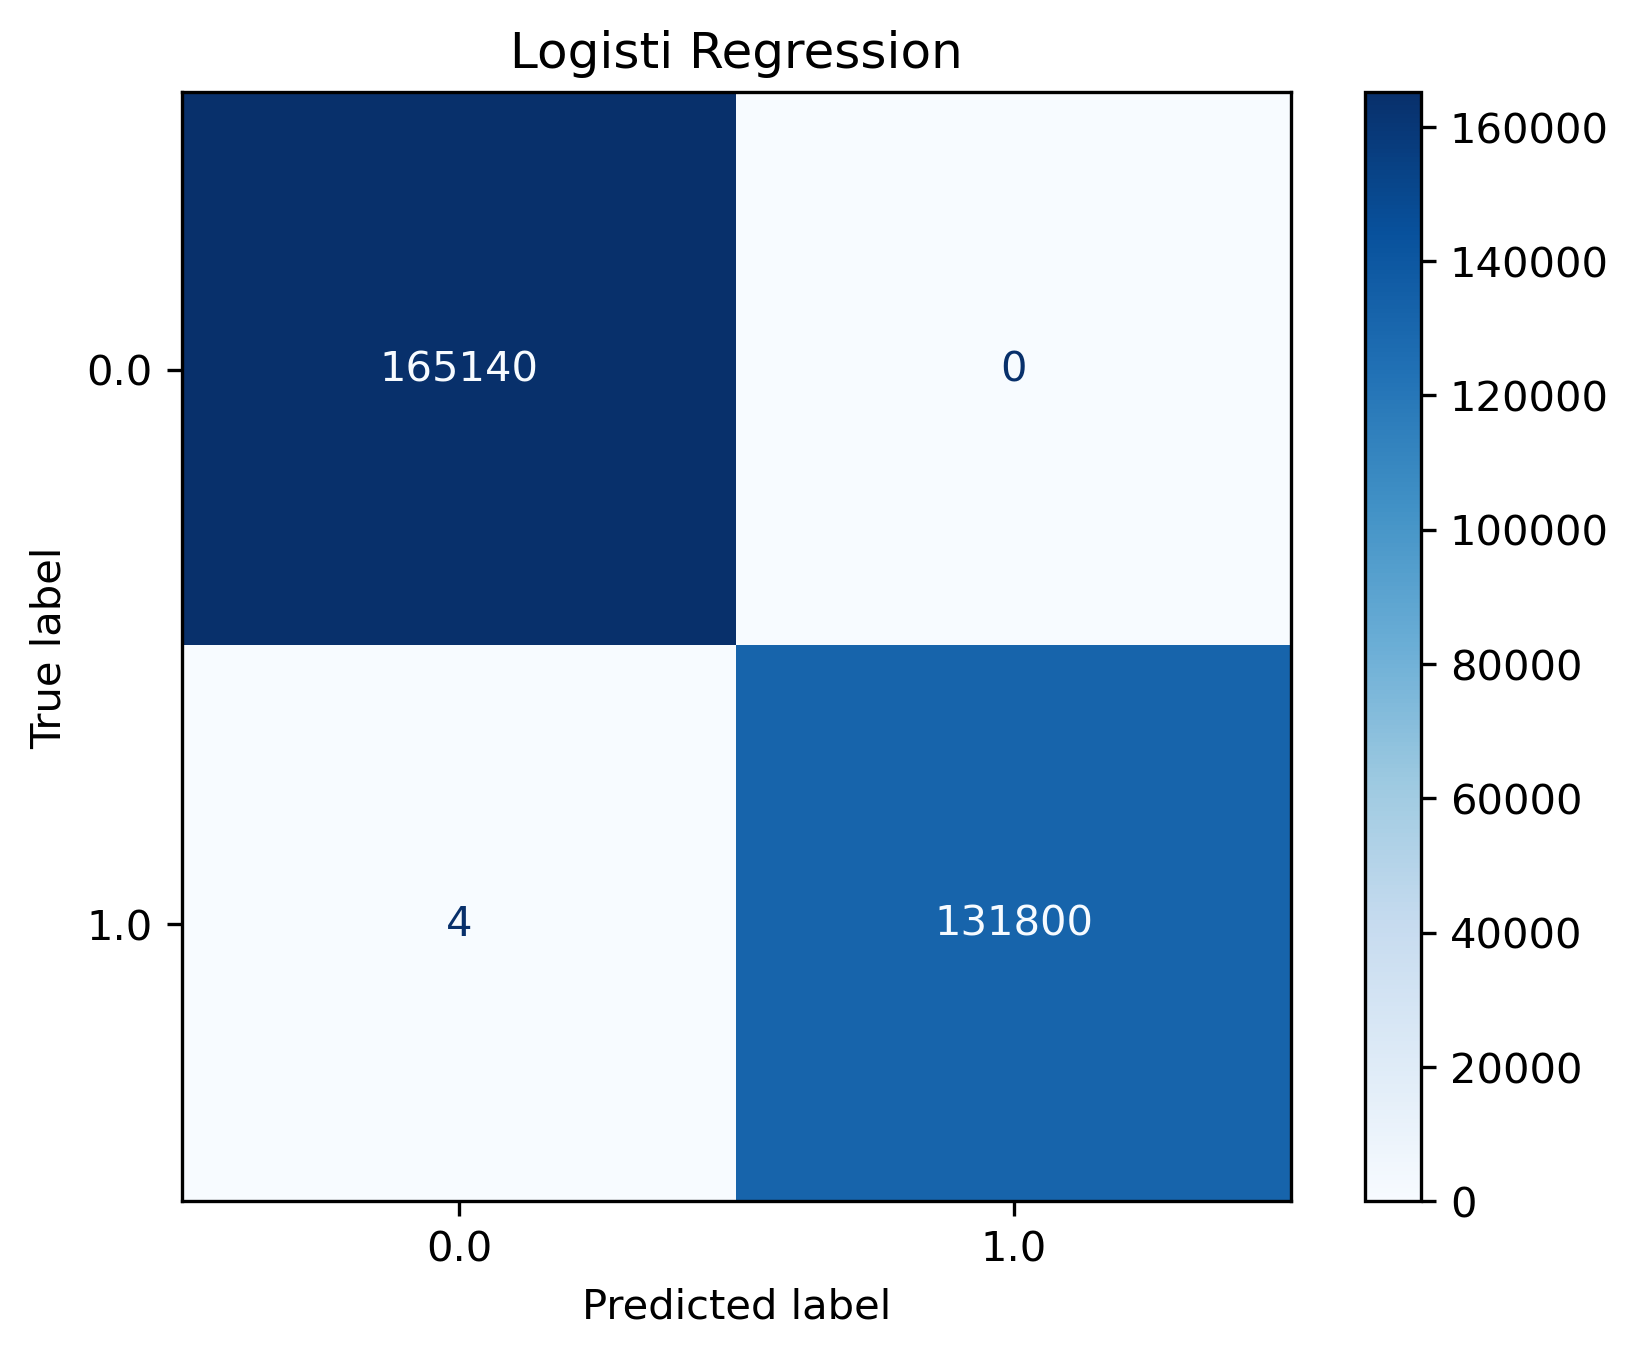

In [68]:
from sklearn.metrics import confusion_matrix

lr_clf = LogisticRegression(max_iter=3000, random_state=0, solver='lbfgs')
lr_clf.fit(X_train,y_train)
y_pred9 = lr_clf.predict(X_test)
acc_lr = lr_clf.score(X_test,y_test)*100
acc_lr

print(confusion_matrix(y_test.values.reshape(-1), y_pred9.reshape(-1)))
print("\nClassification Report")
print("=========================================================================")
from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred9.reshape(-1), target_names=['0.0', '1.0']))

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred9, y_test)
print('Logistic Regression Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred9)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred9)))
print('Precision Score : ' + str(precision_score(y_test,y_pred9)))
print('Recall Score : ' + str(recall_score(y_test,y_pred9)))
print('F1 Score : ' + str(f1_score(y_test,y_pred9)))
print('LOGLOSS Value is',log_loss(y_test, y_pred9))
print('AUC-ROC:',roc_auc_score(y_test, y_pred9))                       

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))


from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    lr_clf, X_test, y_test, name="Logistic Regression"
)
_ = display.ax_.set_title(" Precision-Recall curve")


confusion_matrix = metrics.plot_confusion_matrix(lr_clf, X_test, y_test, cmap = "Blues")
plt.title("Logistic Regression")
print(confusion_matrix)

Stochastic Gradient Descent

In [69]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
from sklearn.calibration import CalibratedClassifierCV

# Plotting the classification results
#from mlxtend.plotting import plot_decision_regions

# Fitting SGD Classifier to the Training set
sgd = SGDClassifier(loss='hinge',alpha=0.01,class_weight='balanced', max_iter=200)
sgd.fit(X_train.values, y_train.values)
acc_sgd = sgd.score(X_test,y_test)*100
acc_sgd

calibrator = CalibratedClassifierCV(sgd, cv='prefit')
model=calibrator.fit(X_train.values, y_train.values)

# Predicting the results
y_pred8 = sgd.predict(X_test.values)

from sklearn.metrics import confusion_matrix
y_pred8 = sgd.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred8))
print("\nClassification Report")
print("=========================================================================")

from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred8, target_names=['0.0', '1.0']))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred8)))
print('Precision Score : ' + str(precision_score(y_test,y_pred8)))
print('Recall Score : ' + str(recall_score(y_test,y_pred8)))
print('F1 Score : ' + str(f1_score(y_test,y_pred8)))
print('LOGLOSS Value is',log_loss(y_test, y_pred8))
print('AUC-ROC:',roc_auc_score(y_test, y_pred8))                       

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred8, y_test.values)
print('SGDClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred8)))

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    sgd, X_test.values, y_test.values, name="SGDClassifier"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(sgd, X_test, y_test, cmap = "Blues")
plt.title("Stochastic Gradient Descent")
print(confusion_matrix)

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


[[165140      0]
 [   101 131703]]

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    131804

    accuracy                           1.00    296944
   macro avg       1.00      1.00      1.00    296944
weighted avg       1.00      1.00      1.00    296944

Accuracy Score : 0.9996598685273991
Precision Score : 1.0
Recall Score : 0.999233710661285
F1 Score : 0.9996167084745377
LOGLOSS Value is 0.011747724877034979
AUC-ROC: 0.9996168553306425
SGDClassifier Model accuracy score: 0.9997
1 2
1
Elapsed time: 5683.5967199 5682.2047489
Train time: 1.39197 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


Passive Aggressive

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PassiveAggressiveClassifier was fitted without feature names
  warnings.warn(


[[163461   1679]
 [     0 131804]]
Classification Report : 

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

Passive Agressive Model accuracy score: 0.9943
Accuracy Score : 0.994345735222803
Precision Score : 0.9874216192324116
Recall Score : 1.0
F1 Score : 0.993671005364002
LOGLOSS Value is 0.19529590795281473
AUC-ROC: 0.9949164345403899
1 2
1
Elapsed time: 6595.7625401 6595.0696112
Train time: 0.69293 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PassiveAggressiveClassifier was fitted without feature names
  warnings.warn(


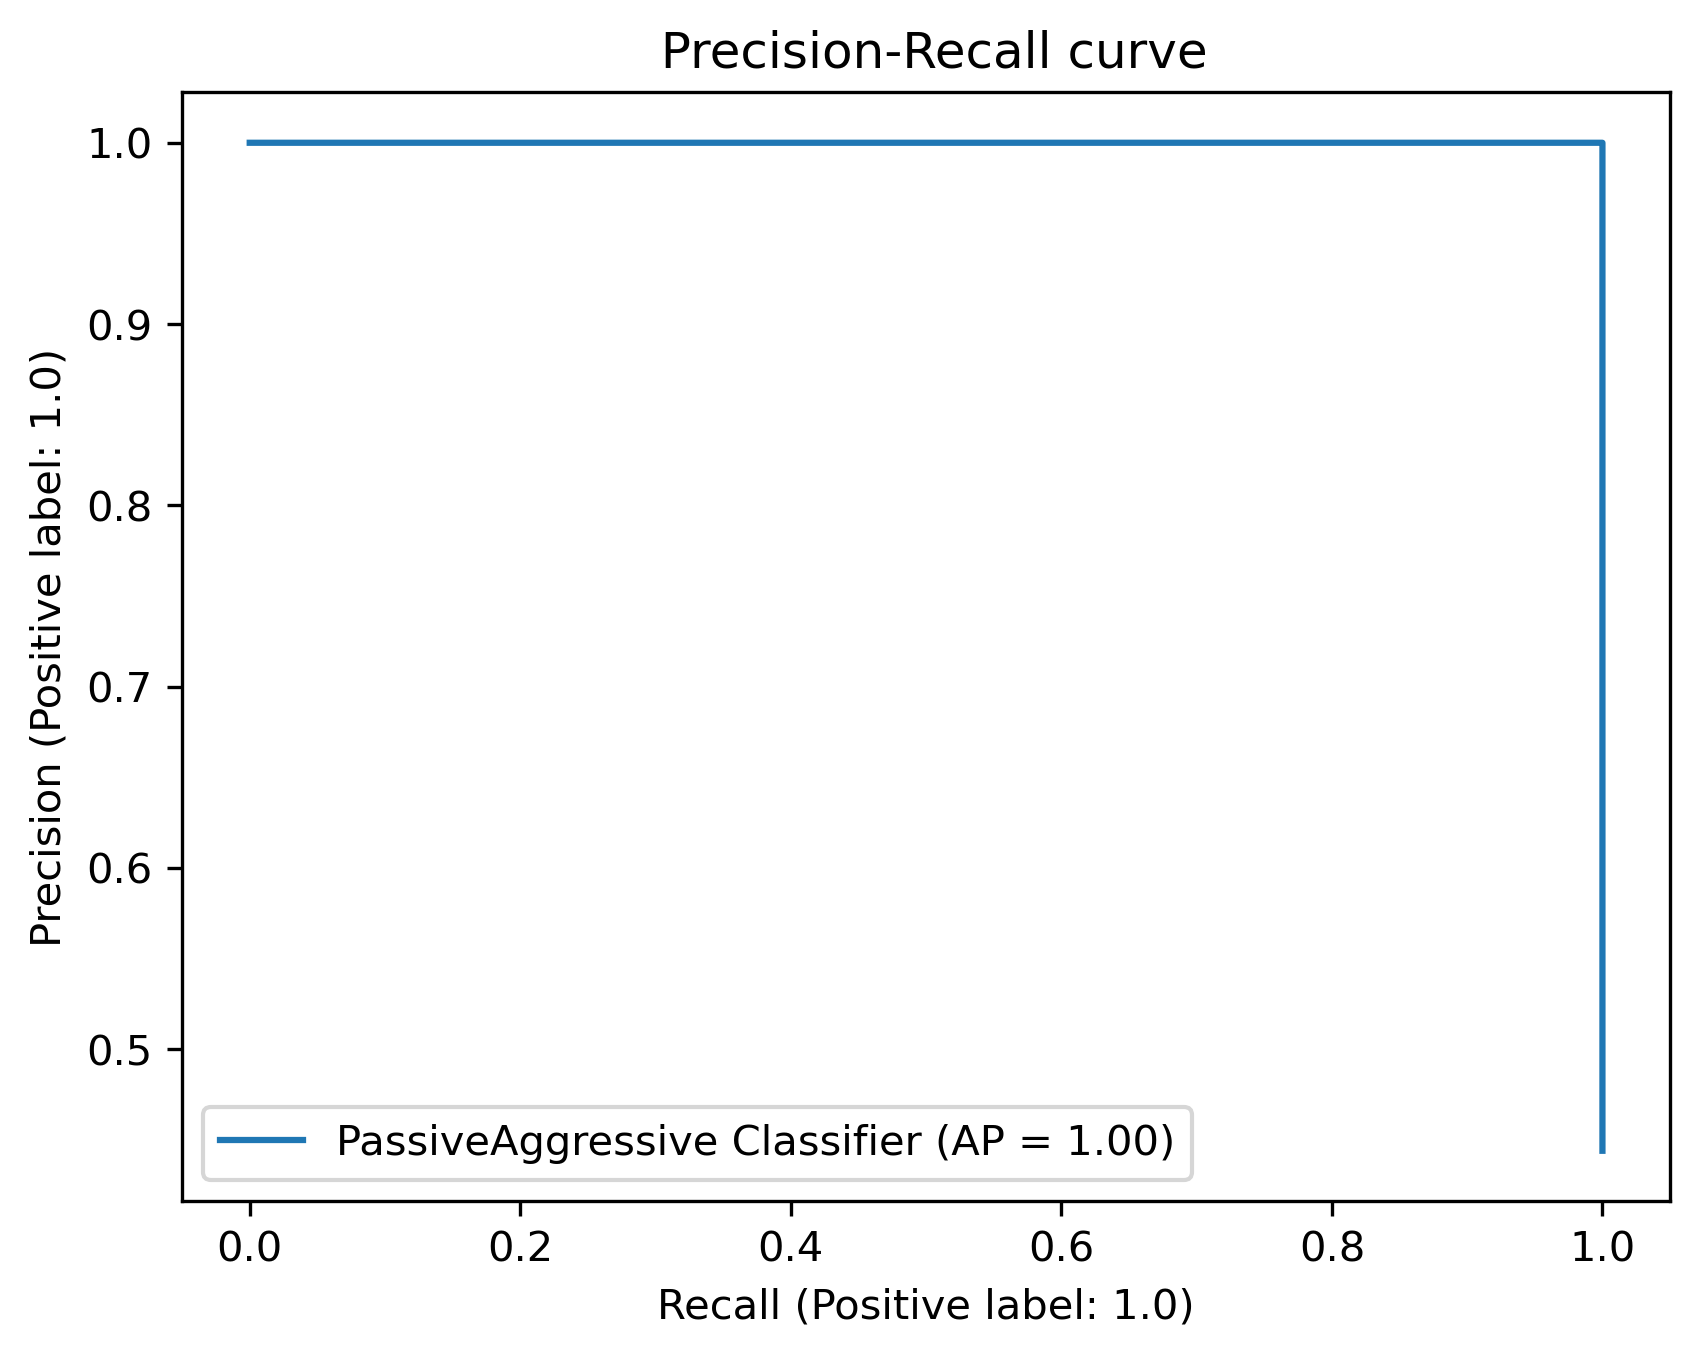

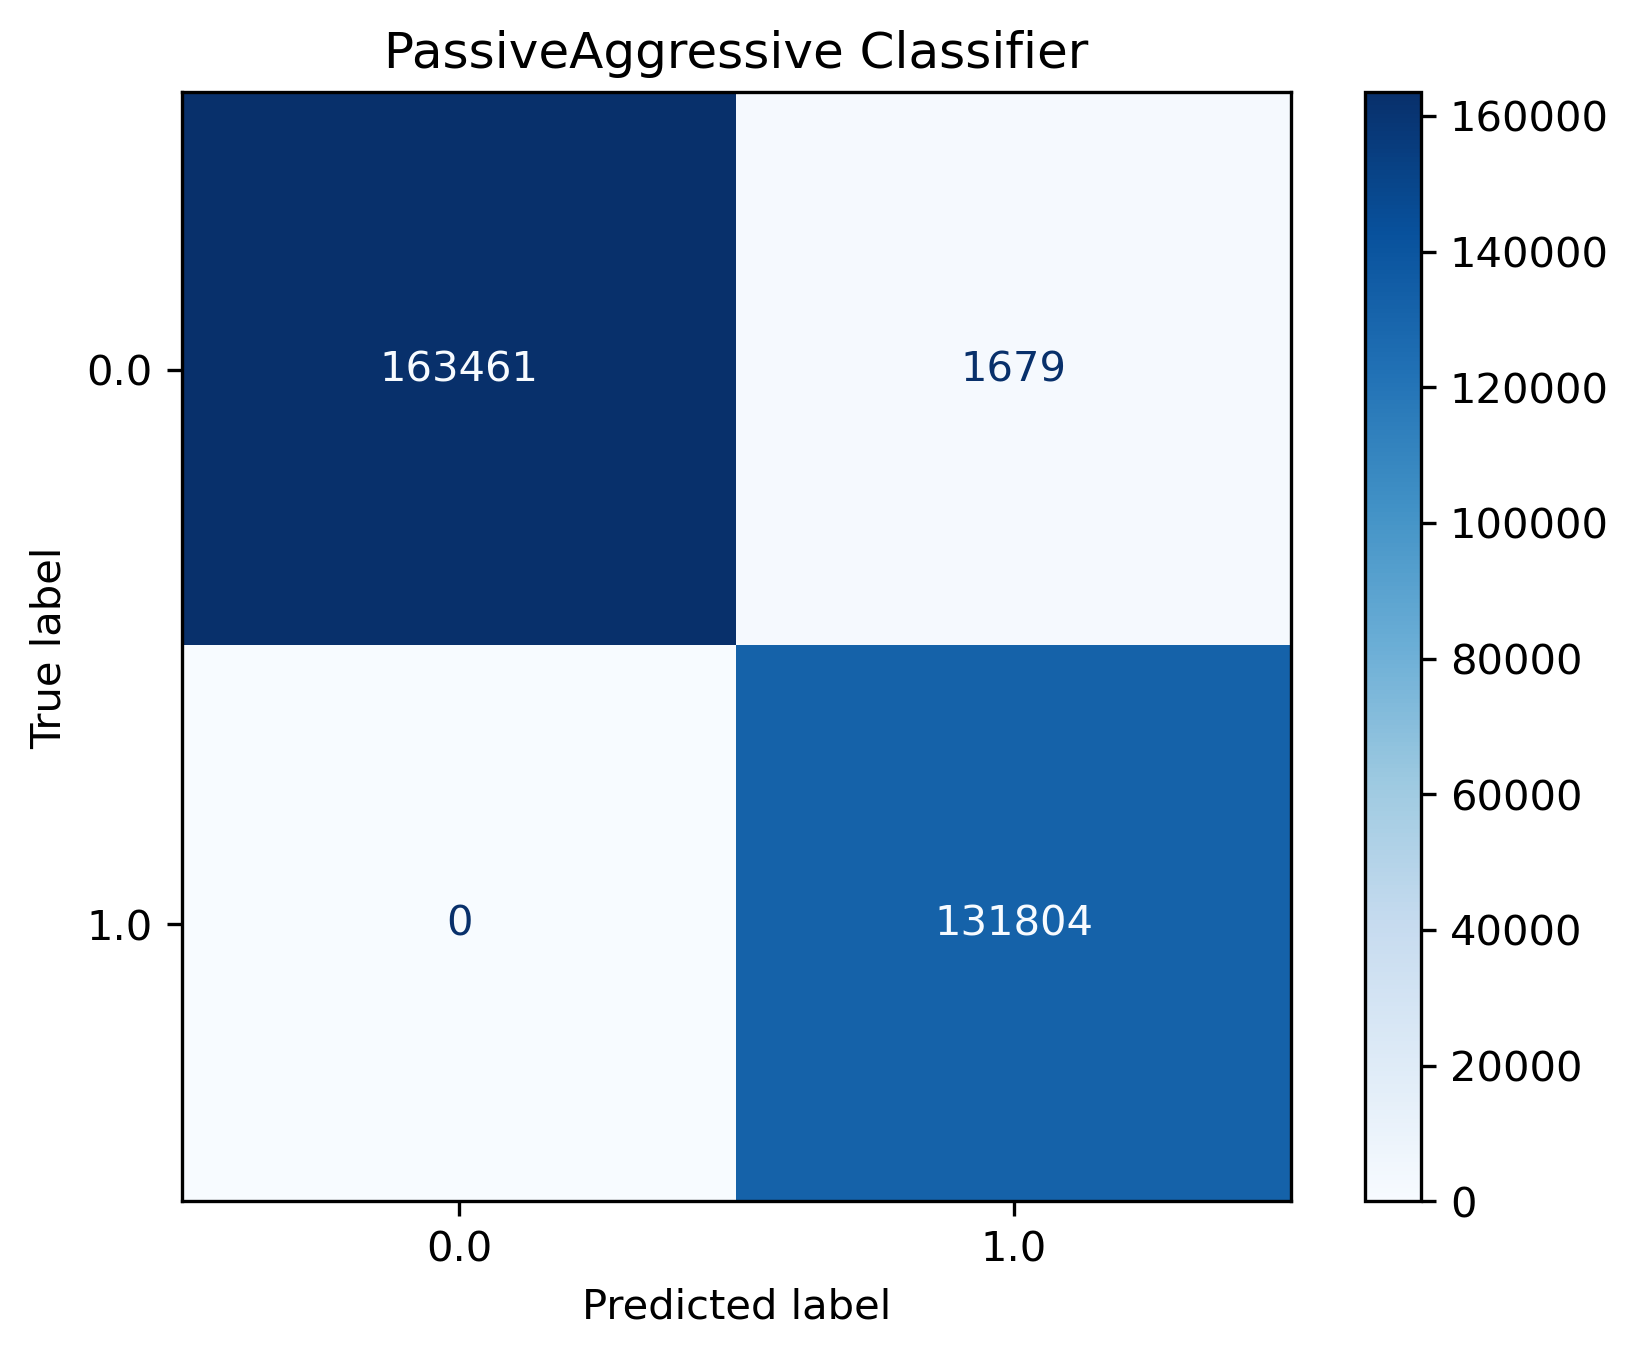

In [74]:
import time
import warnings
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import log_loss

# Creating model
pac = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
  
# Fitting model 
pac.fit(X_train.values, y_train.values)
  
# Making prediction on test set
y_pred16 = pac.predict(X_test.values)
acc_pa = pac.score(X_test,y_test)*100
acc_pa

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.values.reshape(-1), y_pred16))  
print(f"Classification Report : \n\n{classification_report(y_test.values, y_pred16)}")

# print the scores on training and test set
print('Passive Agressive Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test.values, y_pred16)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred16)))
print('Precision Score : ' + str(precision_score(y_test,y_pred16)))
print('Recall Score : ' + str(recall_score(y_test,y_pred16)))
print('F1 Score : ' + str(f1_score(y_test,y_pred16)))
print('LOGLOSS Value is',log_loss(y_test, y_pred16))
print('AUC-ROC:',roc_auc_score(y_test, y_pred16))

print("=========================================================================")

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    pac, X_test.values, y_test.values, name="PassiveAggressive Classifier"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(pac, X_test, y_test, cmap = "Blues")
plt.title("PassiveAggressive Classifier")
print(confusion_matrix)

Decision Tree

In [77]:
import time
from sklearn.tree import DecisionTreeClassifier
import warnings

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train.values,y_train.values)
y_pred10 = dt.predict(X_test.values)
acc_dt = dt.score(X_test,y_test)*100
acc_dt
#clf.fit(X_train.values, y_train.values.reshape(-1))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.values.reshape(-1), y_pred10))
print("\nClassification Report")
print("===============================================================")

from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred10, target_names=['0.0', '1.0']))
print("===============================================================")

# print the scores on training and test set
print('DT Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test.values, y_pred10)))
#print('Training set score: {:.4f}'.format(dt.score(X_train.values, y_train.values)))
#print('Test set score: {:.4f}'.format(dt.score(X_test.values, y_test.values)))

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred10)))
print('Precision Score : ' + str(precision_score(y_test,y_pred10)))
print('Recall Score : ' + str(recall_score(y_test,y_pred10)))
print('F1 Score : ' + str(f1_score(y_test,y_pred10)))
print('LOGLOSS Value is',log_loss(y_test, y_pred10))
print('AUC-ROC:',roc_auc_score(y_test, y_pred10))                       

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))


from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    dt, X_test.values, y_test.values, name="DecisionTree"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(dt, X_test, y_test, cmap = "Blues")
plt.title("Decision Tree")
print(confusion_matrix)

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


[[163461   1679]
 [     0 131804]]

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

DT Model accuracy score: 0.9943
Accuracy Score : 0.994345735222803
Precision Score : 0.9874216192324116
Recall Score : 1.0
F1 Score : 0.993671005364002
LOGLOSS Value is 0.19529590795281473
AUC-ROC: 0.9949164345403899
1 2
1
Elapsed time: 7760.624362 7760.2562705
Train time: 0.36809 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Support Vector Machine

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


[[165140      0]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    131804

    accuracy                           1.00    296944
   macro avg       1.00      1.00      1.00    296944
weighted avg       1.00      1.00      1.00    296944

SVC's prediction accuracy is:  100.0
Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
1 2
1
Elapsed time: 8296.1973102 8295.4878895
Train time: 0.70942 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


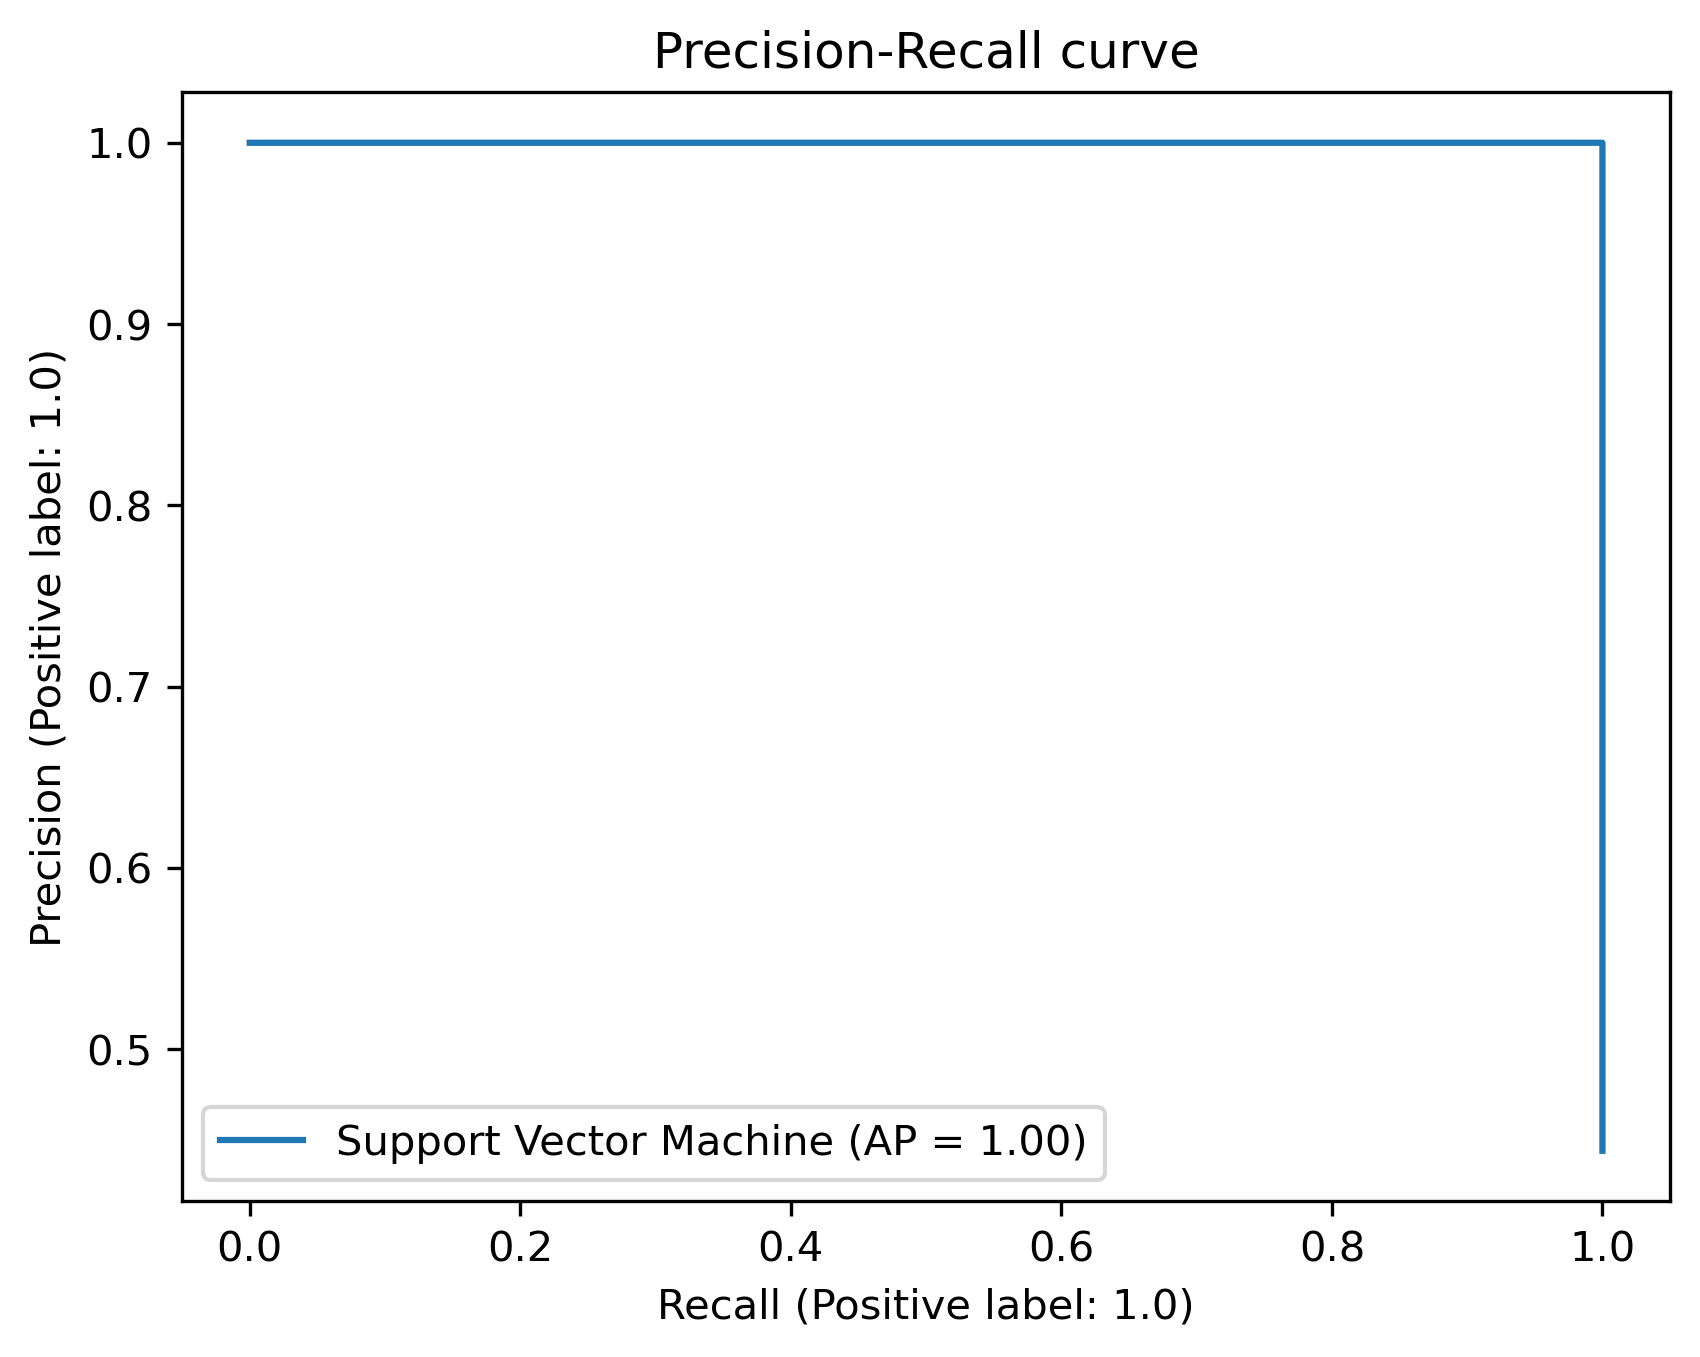

In [80]:
import time
import warnings
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report

svc = SVC(probability=True, kernel='linear')
svc.fit(X_train.values, y_train.values)
y_pred19 = svc.predict(X_test.values)
acc_svc = svc.score(X_test,y_test)*100
acc_svc
print(confusion_matrix(y_test.values.reshape(-1), y_pred19.reshape(-1)))

print(classification_report(y_test.values.reshape(-1), y_pred19.reshape(-1), target_names=['0.0', '1.0']))

print("SVC's prediction accuracy is: ", accuracy_score(y_test.values, y_pred19)*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred19)))
print('Precision Score : ' + str(precision_score(y_test,y_pred19)))
print('Recall Score : ' + str(recall_score(y_test,y_pred19)))
print('F1 Score : ' + str(f1_score(y_test,y_pred19)))

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()
print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    svc, X_test.values, y_test.values, name="Support Vector Machine"
)
_ = display.ax_.set_title("Precision-Recall curve")


confusion_matrix = metrics.plot_confusion_matrix(svc, X_test, y_test, cmap = "Blues")
plt.title("Support Vector Classifier")
print(confusion_matrix)

K-Nearest Neighbor

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[[165140      0]
 [     1 131803]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    131804

    accuracy                           1.00    296944
   macro avg       1.00      1.00      1.00    296944
weighted avg       1.00      1.00      1.00    296944

KNN Model accuracy score: 1.0000
Accuracy Score : 0.9999966323616574
Precision Score : 1.0
Recall Score : 0.9999924129768444
F1 Score : 0.9999962064740313
LOGLOSS Value is 0.00011631410769440499
AUC-ROC: 0.9999962064884222
1 2
1
Elapsed time: 39605.789231 39604.1538634
Train time: 1.63537 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


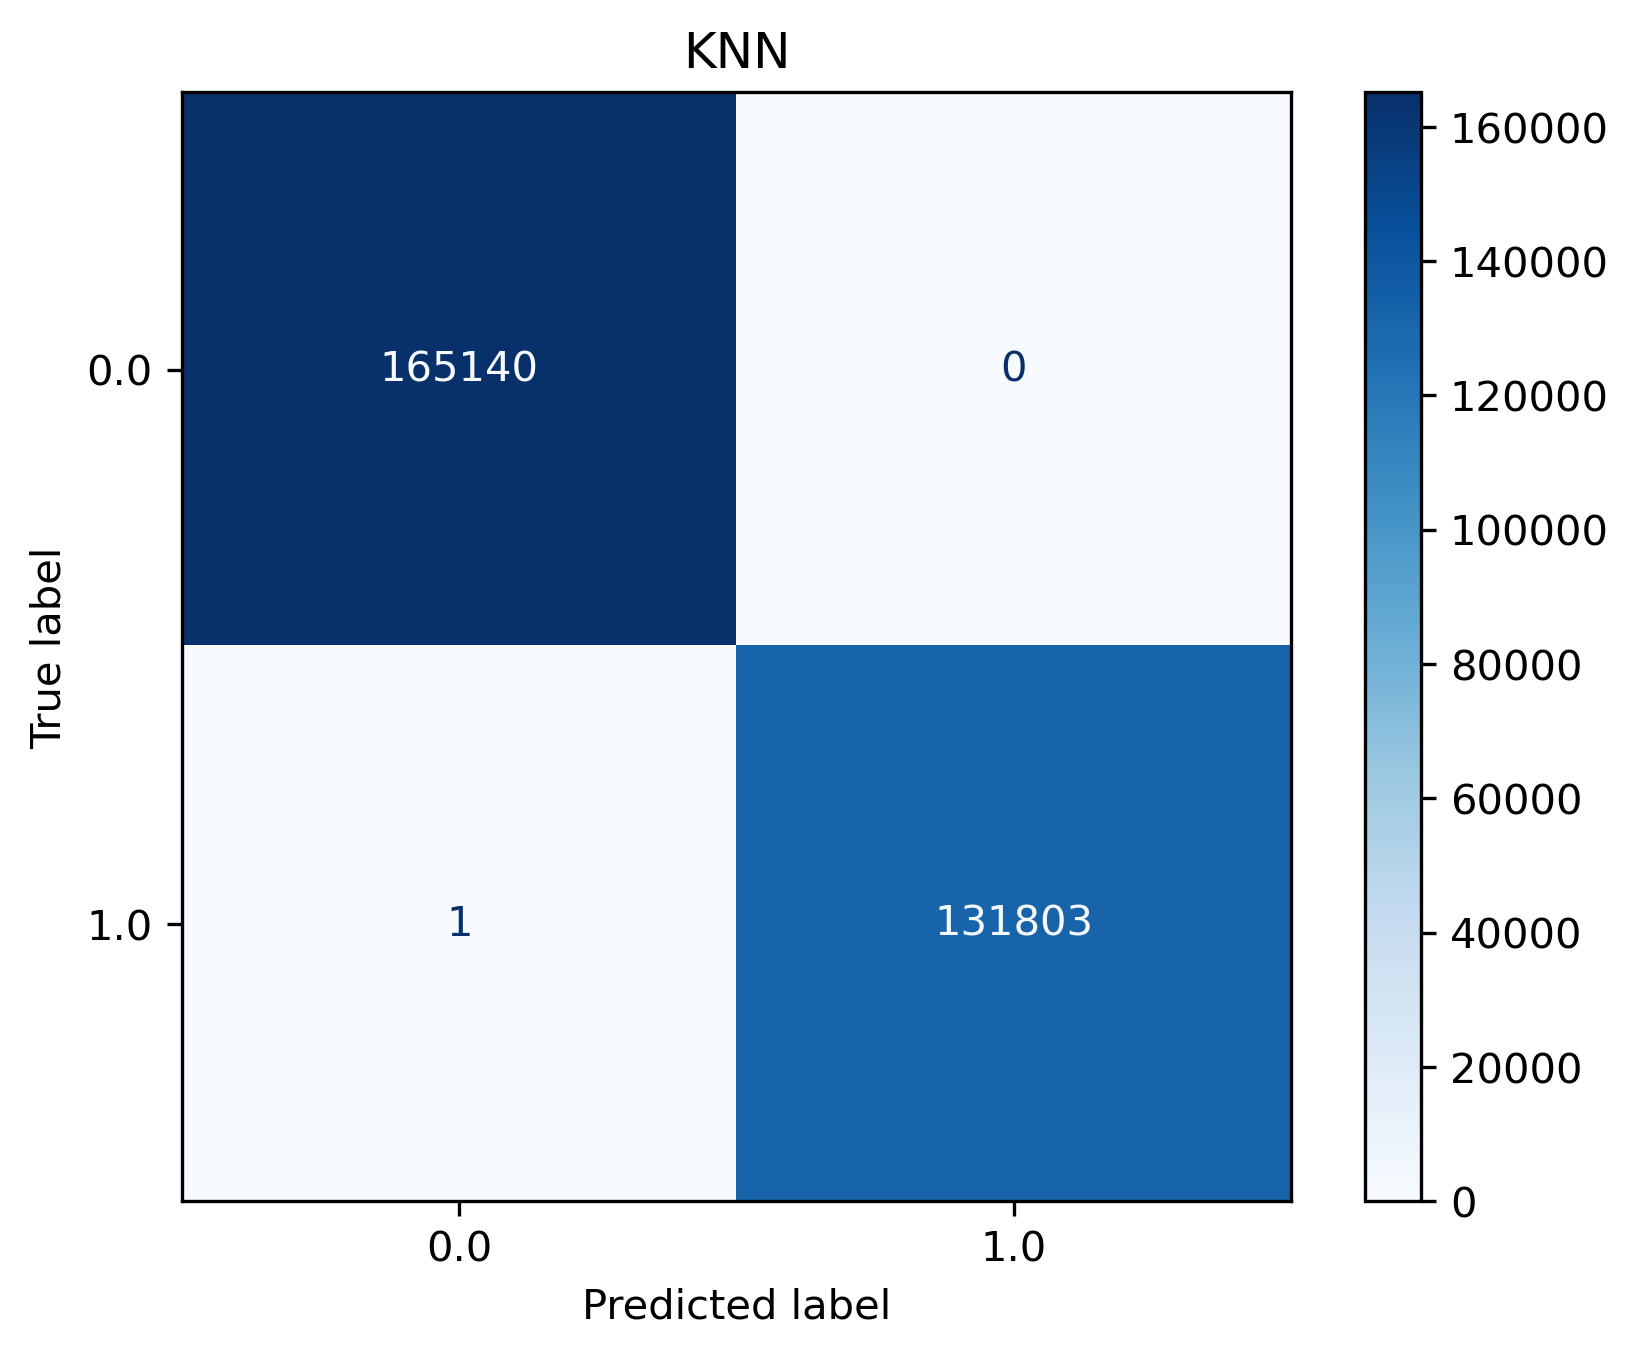

In [85]:
import time
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


knn = KNeighborsClassifier(n_neighbors=15, weights='uniform', algorithm='auto', leaf_size=30, 
                           metric='minkowski', p=2, n_jobs=1, metric_params=None)
knn.fit(X_train.values, y_train.values)
y_pred13 = knn.predict(X_test.values)
acc_knn = knn.score(X_test,y_test)*100
acc_knn

from sklearn.metrics import confusion_matrix
#predictions = knn.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred13.reshape(-1)))
from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred13.reshape(-1), target_names=['0.0', '1.0']))

# print the scores on training and test set
print('KNN Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred13)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred13)))
print('Precision Score : ' + str(precision_score(y_test,y_pred13)))
print('Recall Score : ' + str(recall_score(y_test,y_pred13)))
print('F1 Score : ' + str(f1_score(y_test,y_pred13)))
print('LOGLOSS Value is',log_loss(y_test, y_pred13))
print('AUC-ROC:',roc_auc_score(y_test, y_pred13))


#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()
print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    knn, X_test.values, y_test.values, name="K-Nearest Neighbour (KNN)"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(knn, X_test, y_test, cmap = "Blues")
plt.title("KNN")
print(confusion_matrix)

Gaussian Naive Bayes

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


[[163421   1719]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

LOGLOSS Value is 0.19994857997074952
AUC-ROC: 0.9947953251786363
NB Model accuracy score: 0.9942
Precision Score : 0.9871258135302532
Recall Score : 1.0
1 2
1
Elapsed time: 46913.3030781 46912.9240024
Train time: 0.37908 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


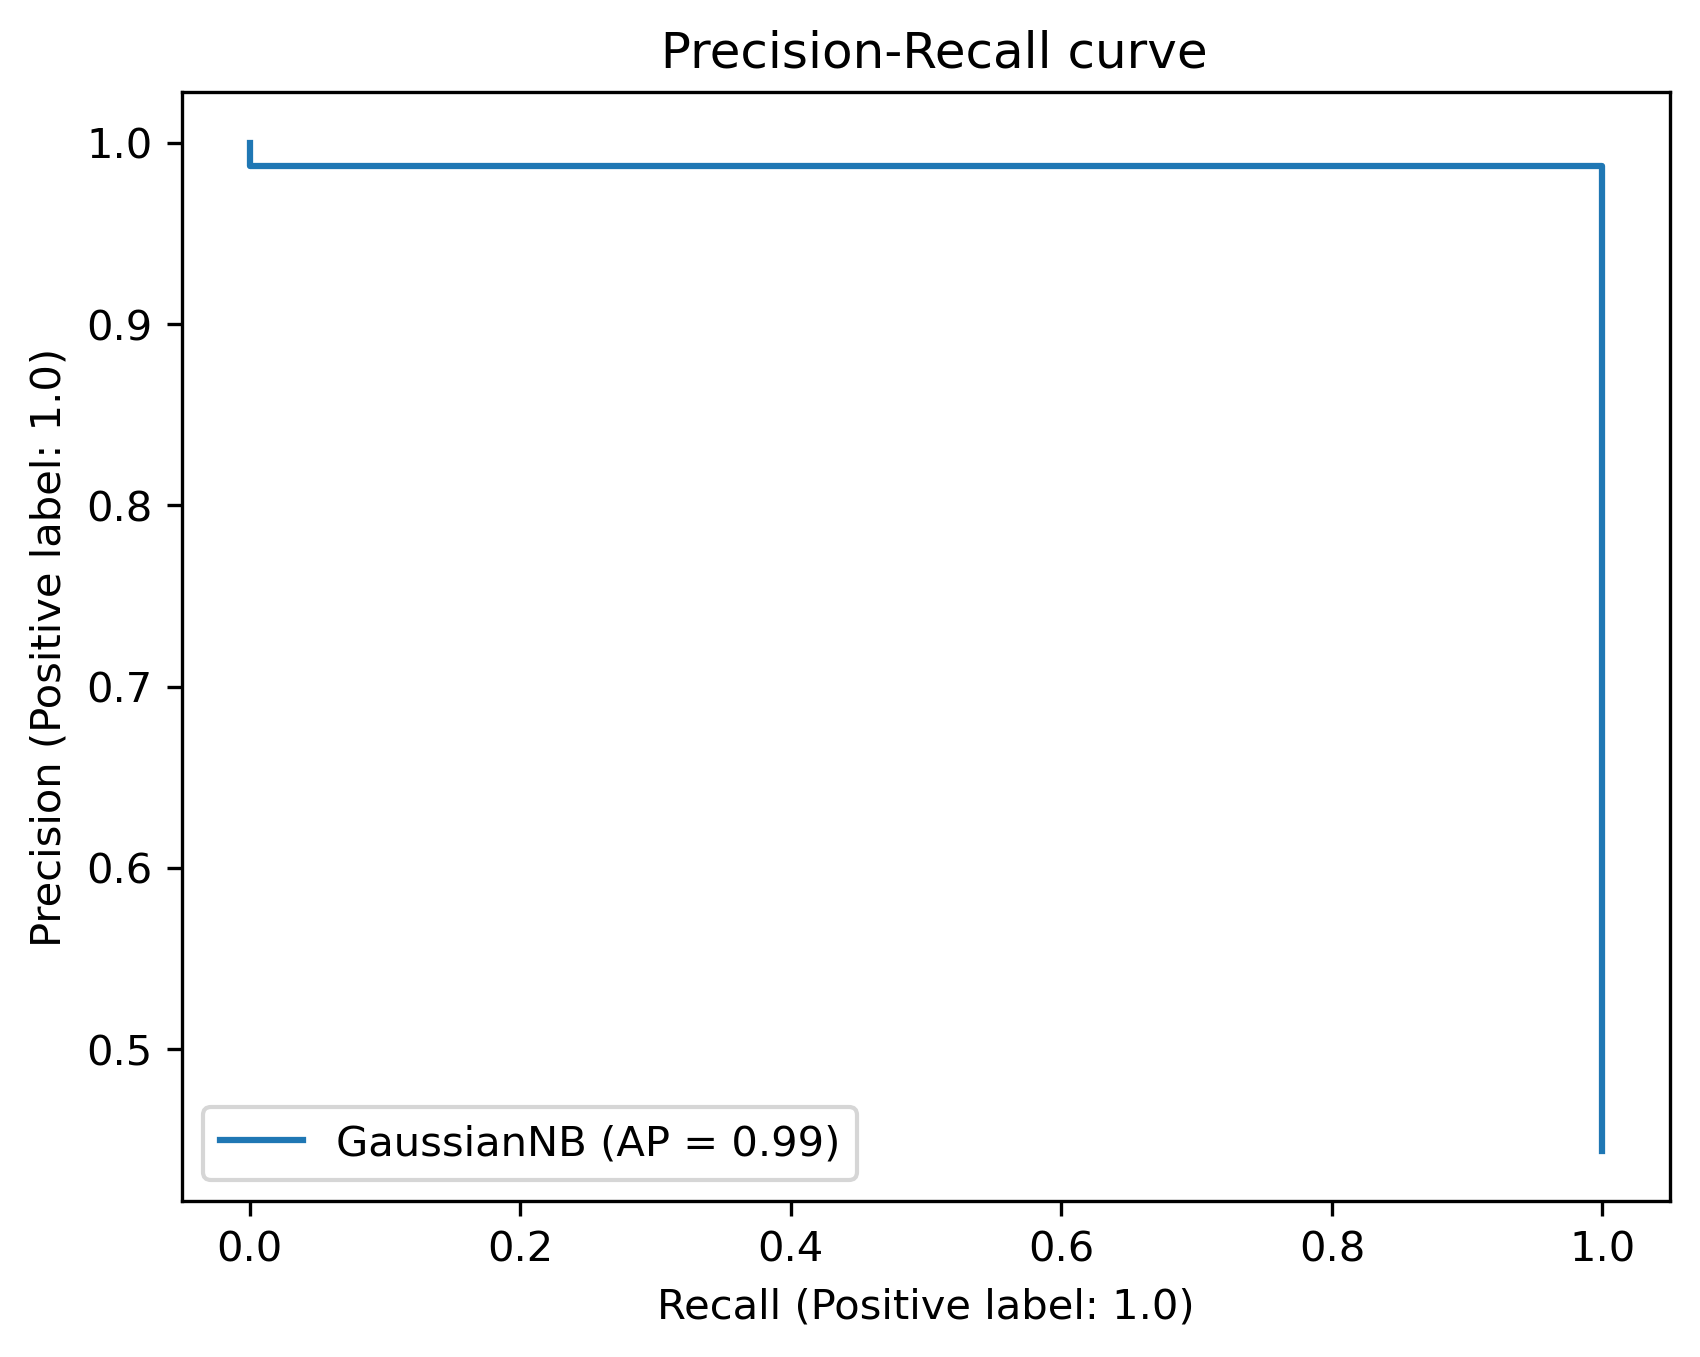

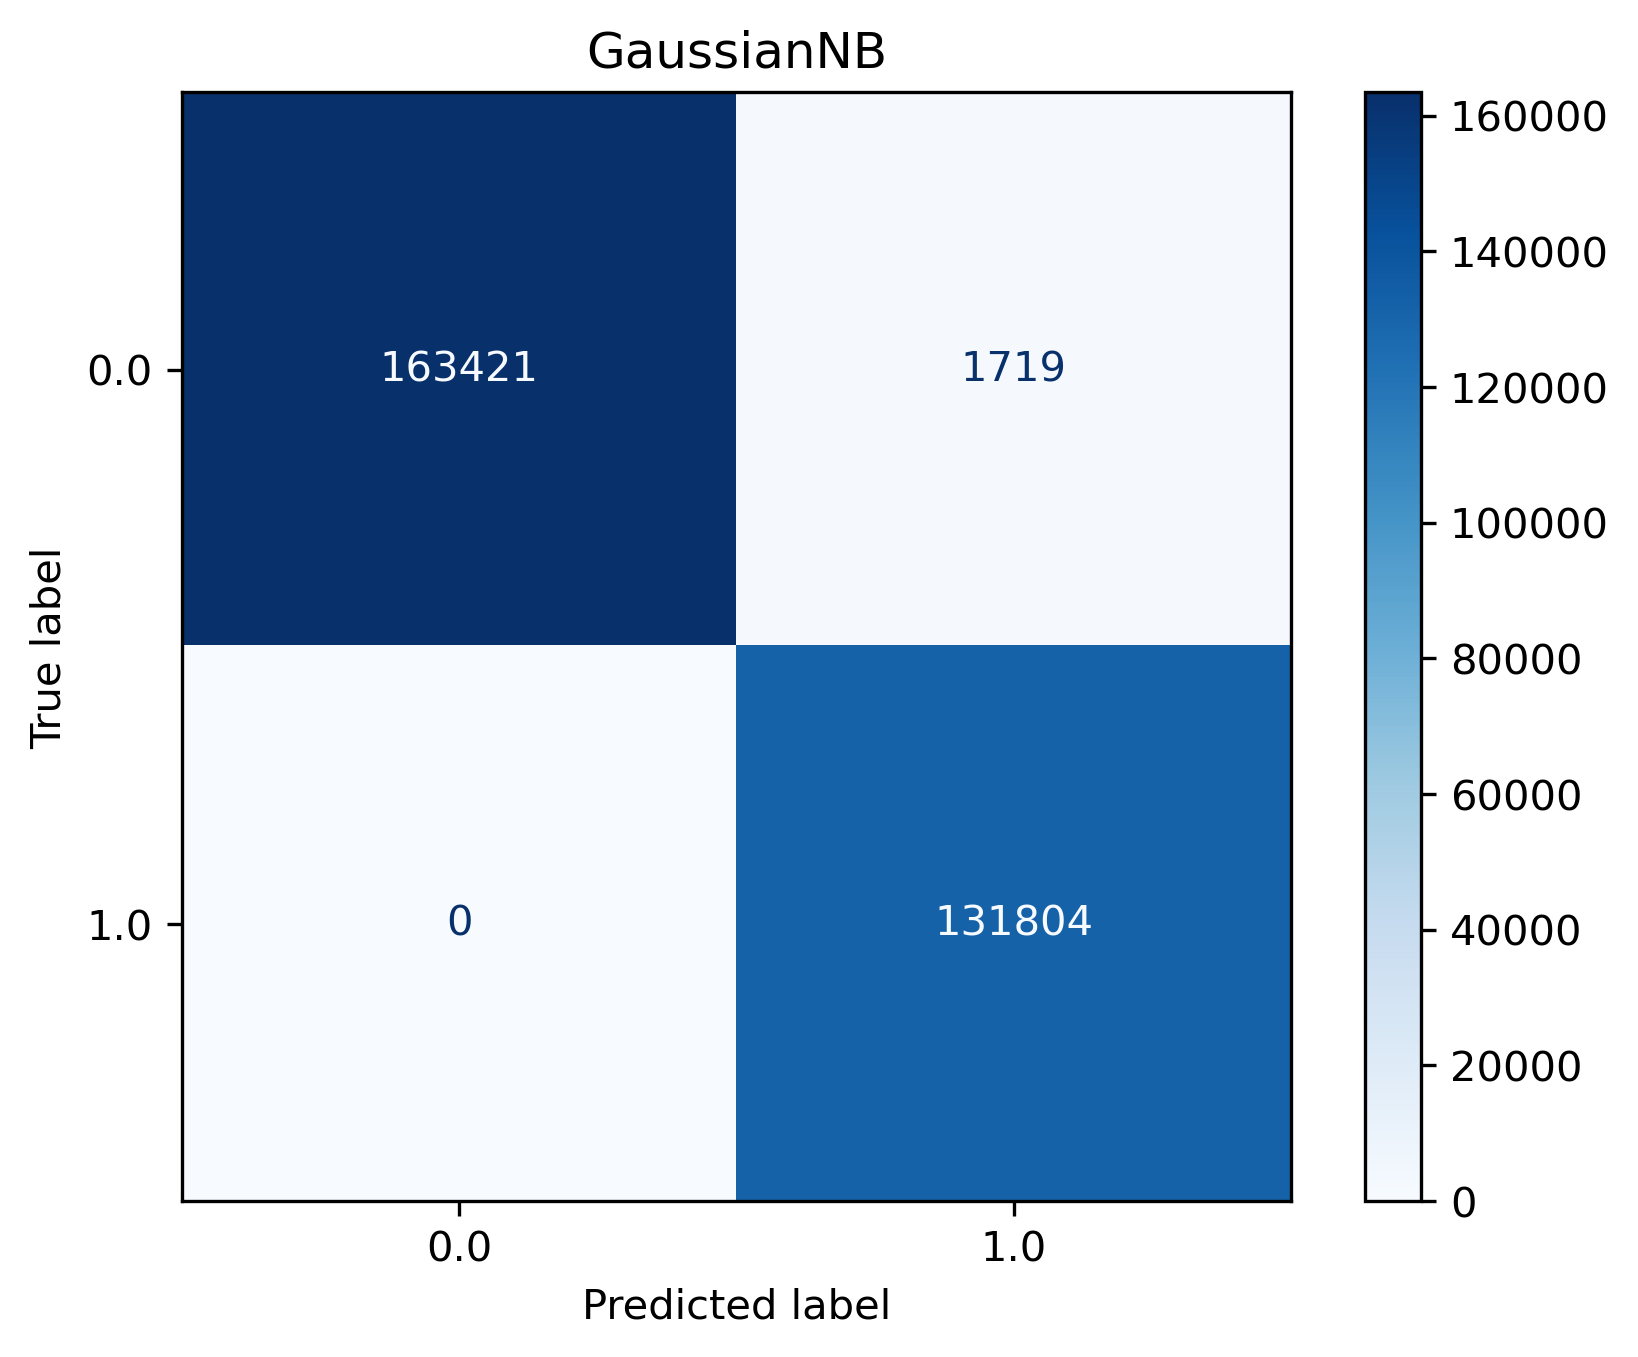

In [86]:
from sklearn.naive_bayes import GaussianNB
import time
import warnings
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import log_loss

gnb = GaussianNB()
gnb.fit(X_train.values, y_train.values)
y_pred14 = gnb.predict(X_test.values)
acc_gnb = gnb.score(X_test,y_test)*100
acc_gnb

#predictions = gnb.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred14.reshape(-1)))
print("===============================================================")
from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred14.reshape(-1), target_names=['0.0', '1.0']))


from time import perf_counter
#acc_LR,pre_LR,rec_LR = get_classification_report(y_test,predictions_LR)
print("===============================================================")
print('LOGLOSS Value is',log_loss(y_test, y_pred14))
print('AUC-ROC:',roc_auc_score(y_test, y_pred14))
print('NB Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred14)))
print('Precision Score : ' + str(precision_score(y_test,y_pred14)))
print('Recall Score : ' + str(recall_score(y_test,y_pred14)))


from time import perf_counter
n, m = map(int, input().split())
t1_start = perf_counter()
for i in range(n):
    t = int(input())
if t % m == 0:
    print(t)
t1_stop = perf_counter()
print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    gnb, X_test.values, y_test.values, name="GaussianNB"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(gnb, X_test, y_test, cmap = "Blues")
plt.title("GaussianNB")
print(confusion_matrix)

Bernoulli Naive Bayes

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Actual: 0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
Name: attack, dtype: float64
Confusion Matrix
[[156331   8809]
 [   782 131022]]
Classification Report : 

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    165140
         1.0       0.94      0.99      0.96    131804

    accuracy                           0.97    296944
   macro avg       0.97      0.97      0.97    296944
weighted avg       0.97      0.97      0.97    296944

BernoulliNB's prediction accuracy is:  96.77009806562855
Accuracy Score : 0.9677009806562854
Precision Score : 0.9370025244759745
Recall Score : 0.994066947892325
F1 Score : 0.9646915898172179
LOGLOSS Value is 1.1155923273659383
AUC-ROC: 0.970362164753962
1 2
1
Elapsed time: 1600.23

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


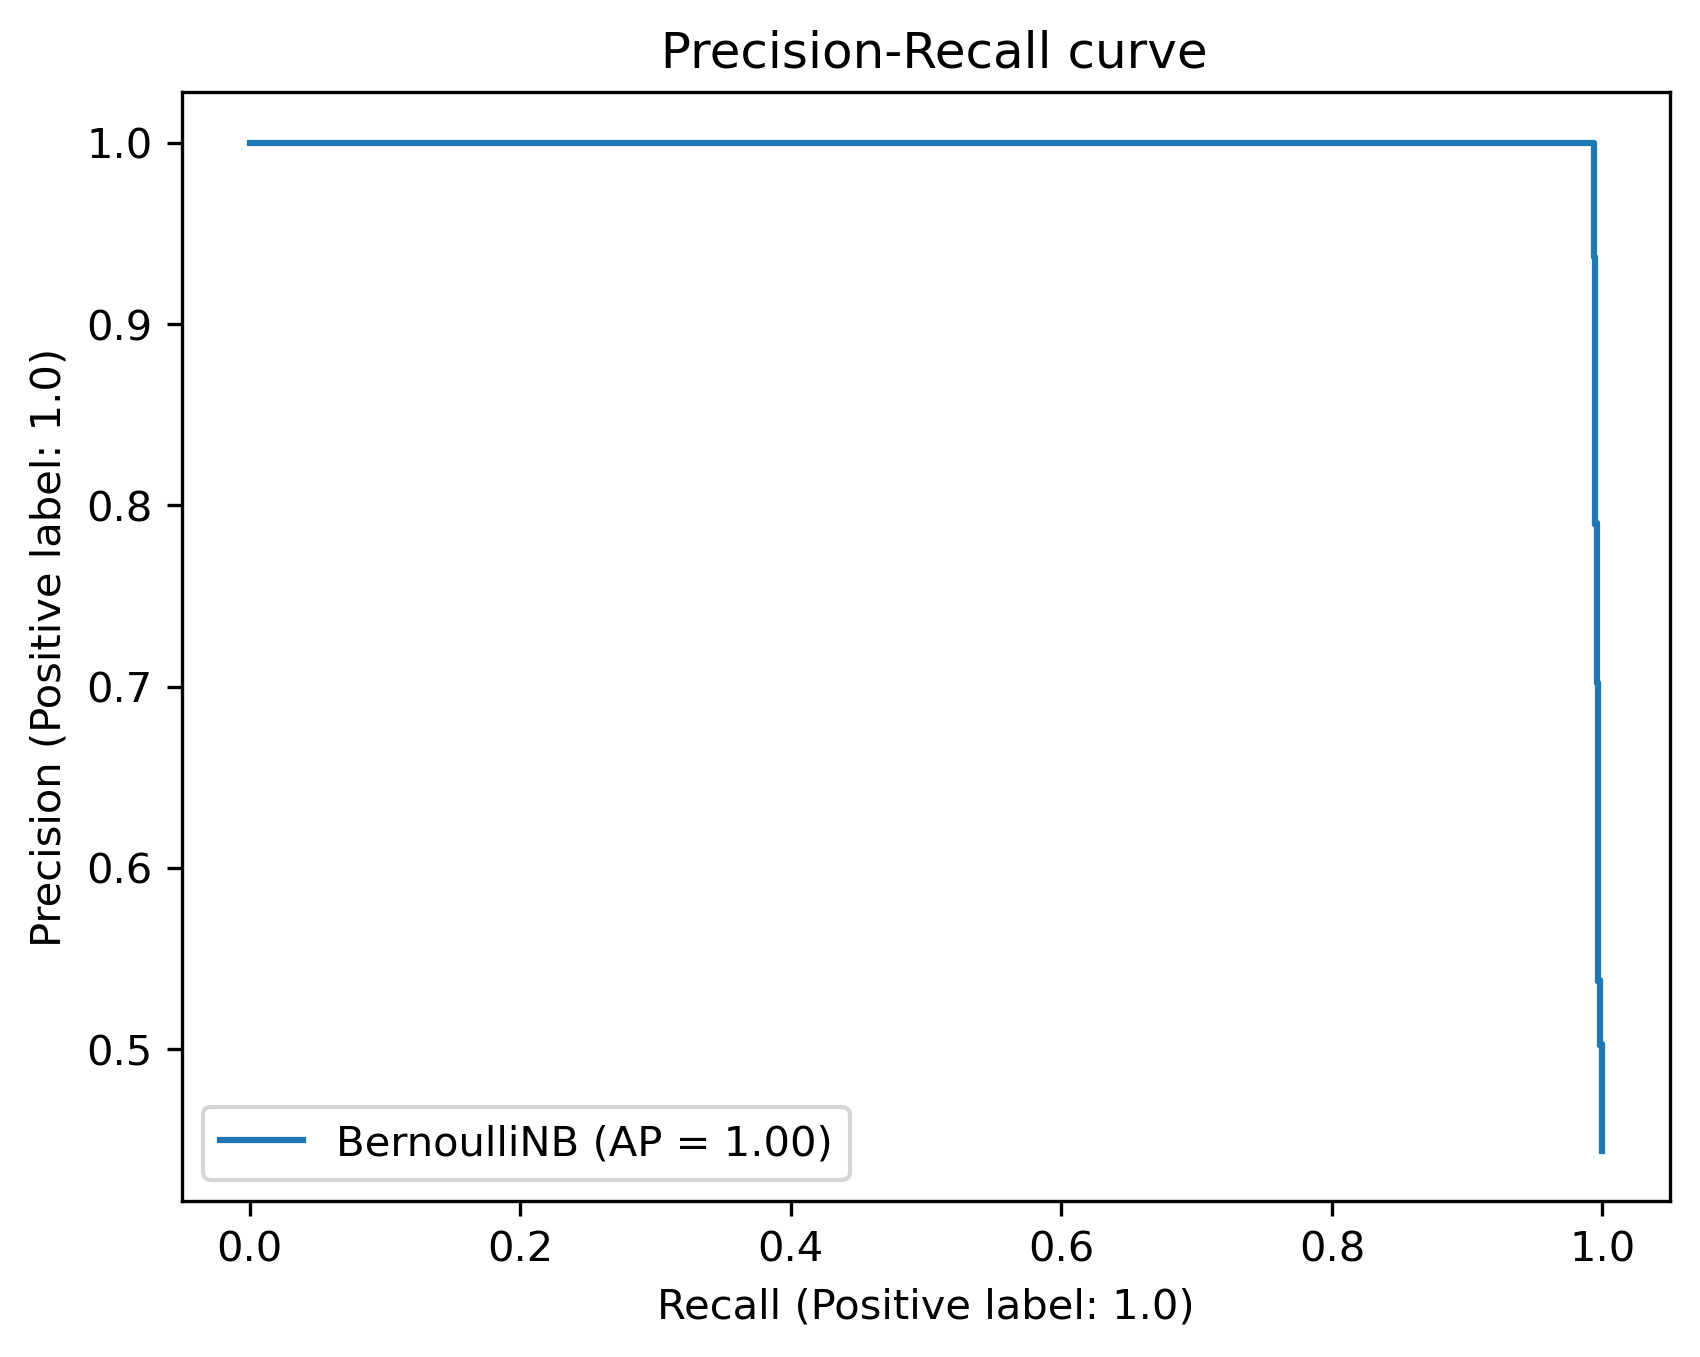

In [49]:
import warnings
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

bnb = BernoulliNB()
bnb.fit(X_train.values, y_train.values)
y_pred17 = bnb.predict(X_test.values)
acc_bnb = bnb.score(X_test,y_test)*100
acc_bnb

print("Predictions:",y_pred17[:20])
print("Actual:",y_test[:20])

#get_probabilty_output(X_test=X_test, model_fitted=bnb)
print("Confusion Matrix")
#y_pred = bnb.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred17))

print(f"Classification Report : \n\n{classification_report(y_test.values, y_pred17)}")

# printing the accuracy score
print("BernoulliNB's prediction accuracy is: ", accuracy_score(y_test.values, y_pred17)*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred17)))
print('Precision Score : ' + str(precision_score(y_test,y_pred17)))
print('Recall Score : ' + str(recall_score(y_test,y_pred17)))
print('F1 Score : ' + str(f1_score(y_test,y_pred17)))
print('LOGLOSS Value is',log_loss(y_test, y_pred17))
print('AUC-ROC:',roc_auc_score(y_test, y_pred17))                       

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    bnb, X_test.values, y_test.values, name="BernoulliNB"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(bnb, X_test, y_test, cmap = "Blues")
plt.title("BernoulliNB")
print(confusion_matrix)

Multilayer Perceptron

Iteration 1, loss = 0.03379454
Iteration 2, loss = 0.00140356
Iteration 3, loss = 0.00098815
Iteration 4, loss = 0.00077578
Iteration 5, loss = 0.00063158
Iteration 6, loss = 0.00052268
Iteration 7, loss = 0.00043934
Iteration 8, loss = 0.00037563
Iteration 9, loss = 0.00032644
Iteration 10, loss = 0.00028887
Iteration 11, loss = 0.00025981
Iteration 12, loss = 0.00023705
Iteration 13, loss = 0.00021924
Iteration 14, loss = 0.00020480
Iteration 15, loss = 0.00019299
Iteration 16, loss = 0.00018324
Iteration 17, loss = 0.00017500
Iteration 18, loss = 0.00016817
Iteration 19, loss = 0.00016234
Iteration 20, loss = 0.00015722
Iteration 21, loss = 0.00015276
Iteration 22, loss = 0.00014889
Iteration 23, loss = 0.00014537
Iteration 24, loss = 0.00014234
Iteration 25, loss = 0.00013958
Iteration 26, loss = 0.00013709
Iteration 27, loss = 0.00013484
Iteration 28, loss = 0.00013278
Iteration 29, loss = 0.00013092
Iteration 30, loss = 0.00012920
Iteration 31, loss = 0.00012760
Iteration 32, los

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Confusion Matrix
[[163461   1679]
 [     4 131800]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

Accuracy Score : 0.9943322646694326
Precision Score : 0.9874212422927952
Recall Score : 0.9999696519073776
F1 Score : 0.9936558316967165
LOGLOSS Value is 0.19576116438358834
AUC-ROC: 0.9949012604940788
1 2
1
Elapsed time: 47995.4460329 47994.8952513
Train time: 0.55078 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


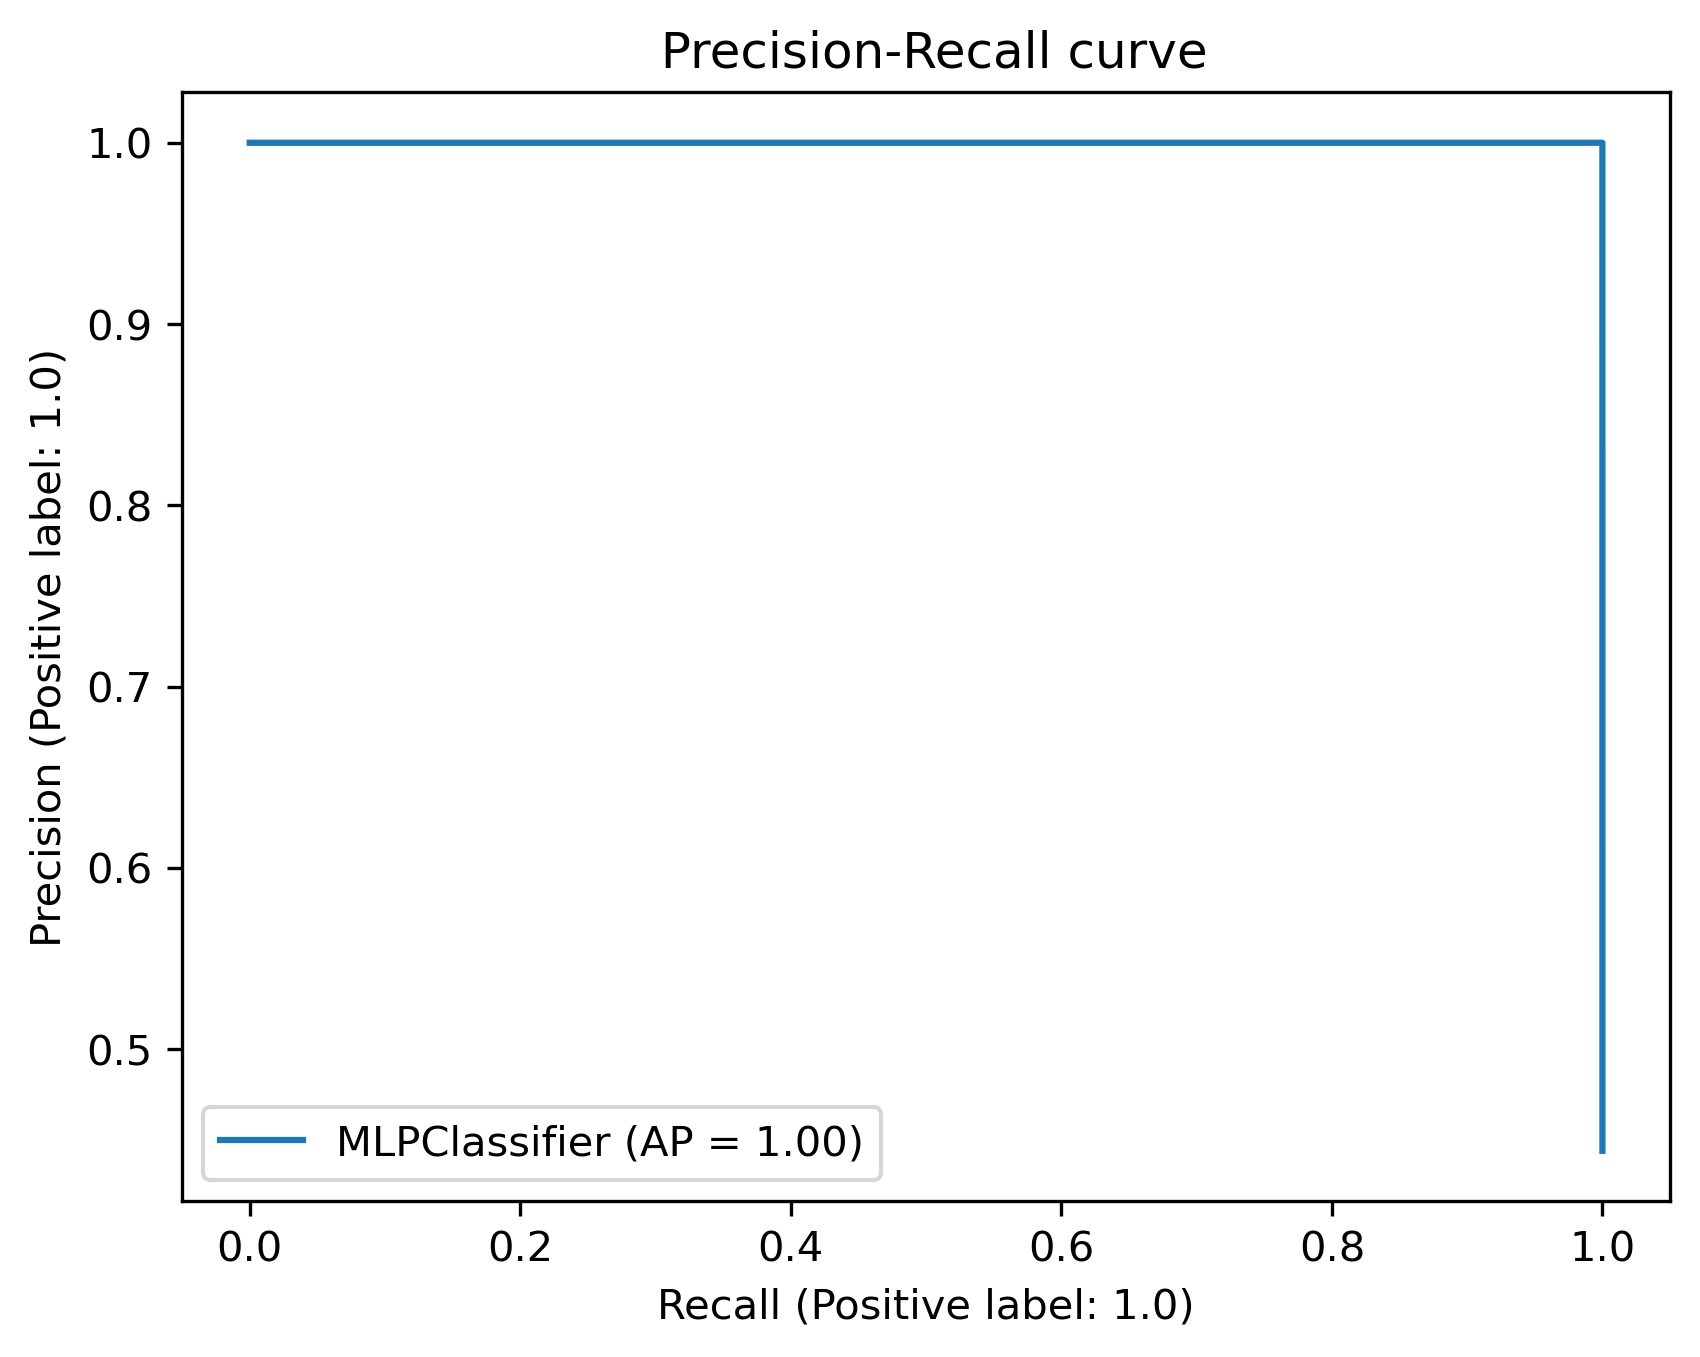

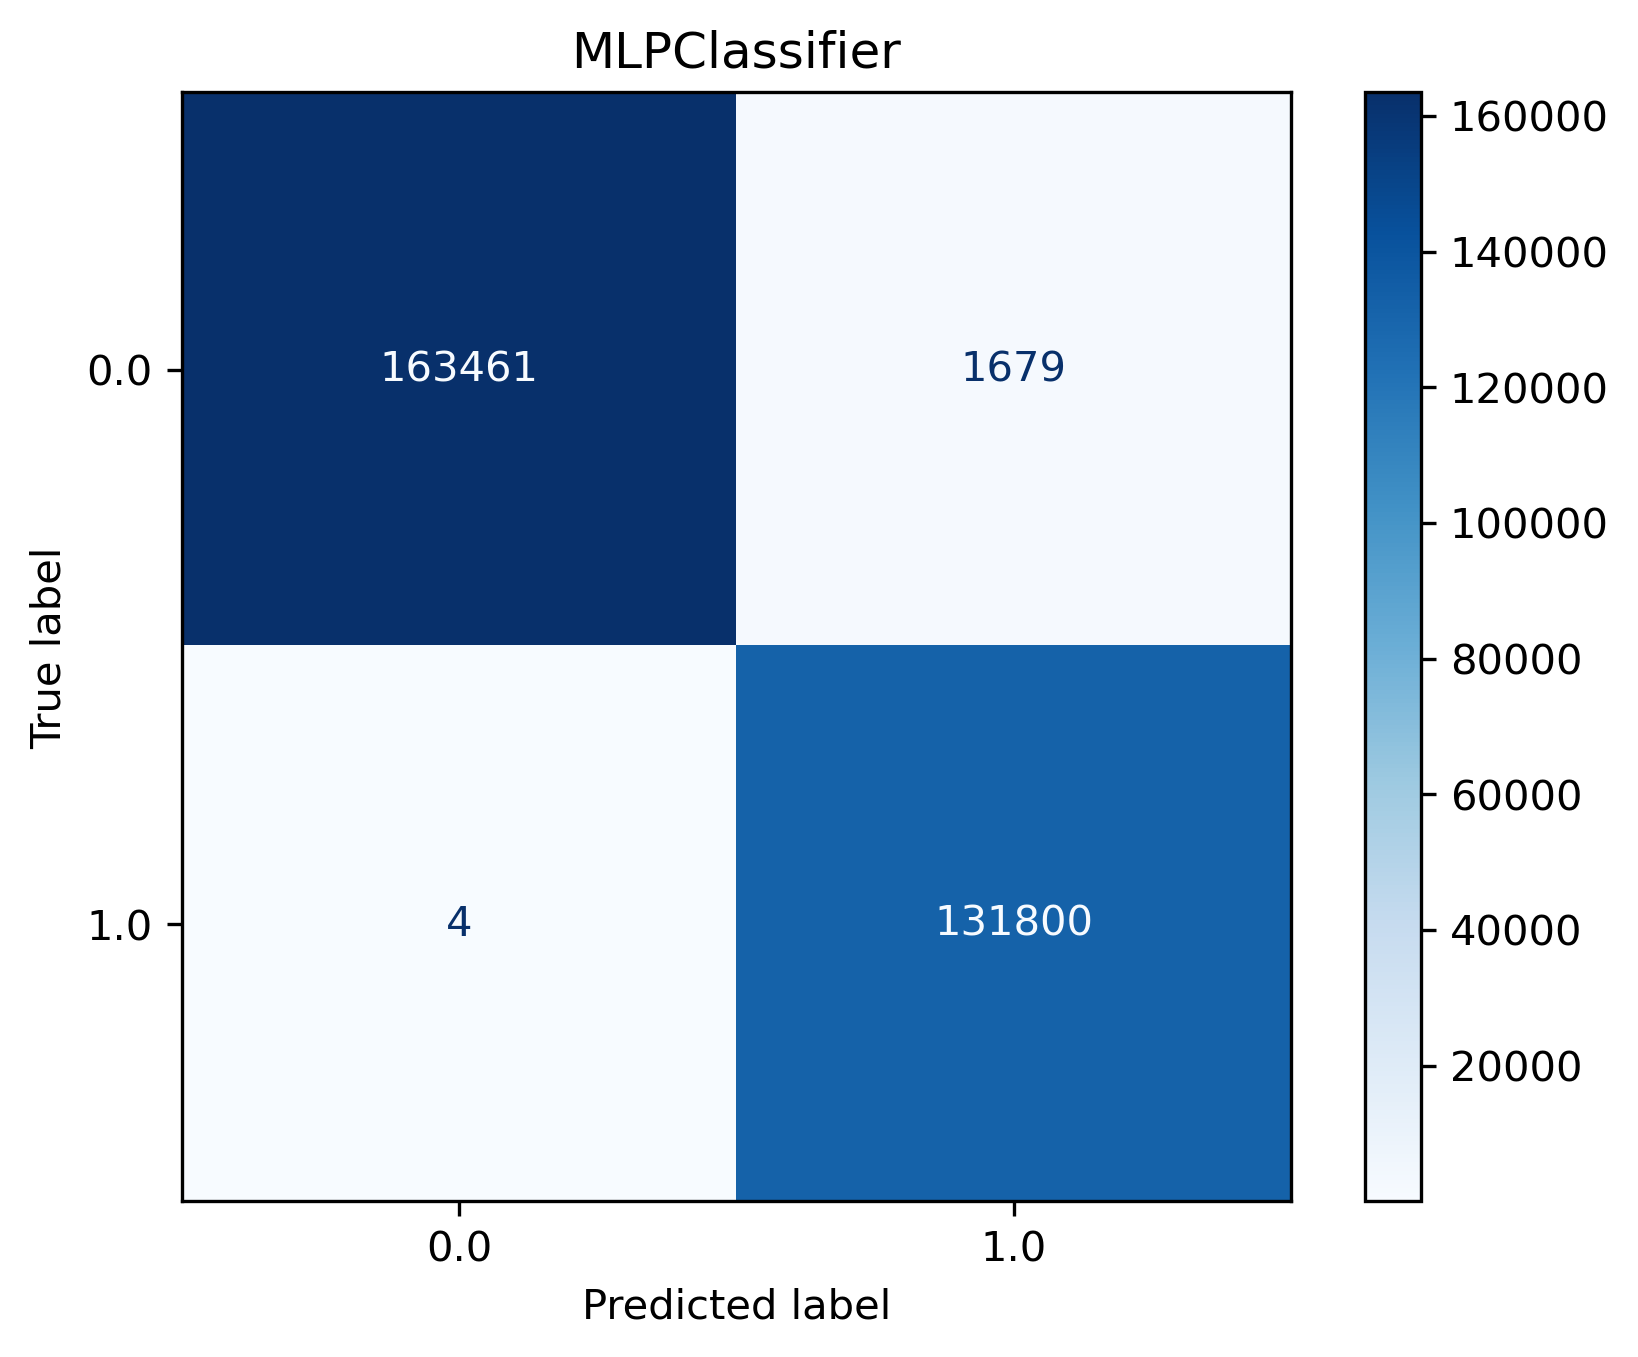

In [88]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
import time

mlp_clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=50, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp_clf.fit(X_train.values, y_train.values)
y_pred15 = mlp_clf.predict(X_test.values)
acc_mlp = mlp_clf.score(X_test,y_test)*100
acc_mlp

print("Confusion Matrix")
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test.values.reshape(-1), y_pred15))
print("=========================================================================")
from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred15.reshape(-1), target_names=['0.0', '1.0']))

print("=========================================================================")

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred15)))
print('Precision Score : ' + str(precision_score(y_test,y_pred15)))
print('Recall Score : ' + str(recall_score(y_test,y_pred15)))
print('F1 Score : ' + str(f1_score(y_test,y_pred15)))
print('LOGLOSS Value is',log_loss(y_test, y_pred15))
print('AUC-ROC:',roc_auc_score(y_test, y_pred15))

print("=========================================================================")

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    mlp_clf, X_test.values, y_test.values, name="MLPClassifier"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(mlp_clf, X_test, y_test, cmap = "Blues")
plt.title("MLPClassifier")
print(confusion_matrix)

In [69]:
def cal_score(name,model,folds):
    scores = ['accuracy']
    avg_result=[]
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = folds, scoring = sc)
        avg_result.append(np.average(scores))
    df_avg_score=pd.DataFrame(avg_result)
    df_avg_score= df_avg_score.rename(index={0: 'Accuracy'})
    avg_accuracies[name]=np.round(df_avg_score.loc['Accuracy']*100,3)
    values=[np.round(df_avg_score.loc['Accuracy']*100,3)]
    plt.figure(figsize=(15,8))
    sns.set_palette('mako')
    ax=sns.barplot(x=['Accuracy'],y=values)
    plt.yticks(np.arange(0,100,10))
    plt.ylabel('Percentage %',labelpad=10)
    plt.xlabel('Scoring Parameters',labelpad=10)
    plt.title('Cross Validation '+str(folds)+'-Folds Average Scores',pad=20)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),xytext=(p.get_x()+0.3,p.get_height()+1.02))
    plt.show()

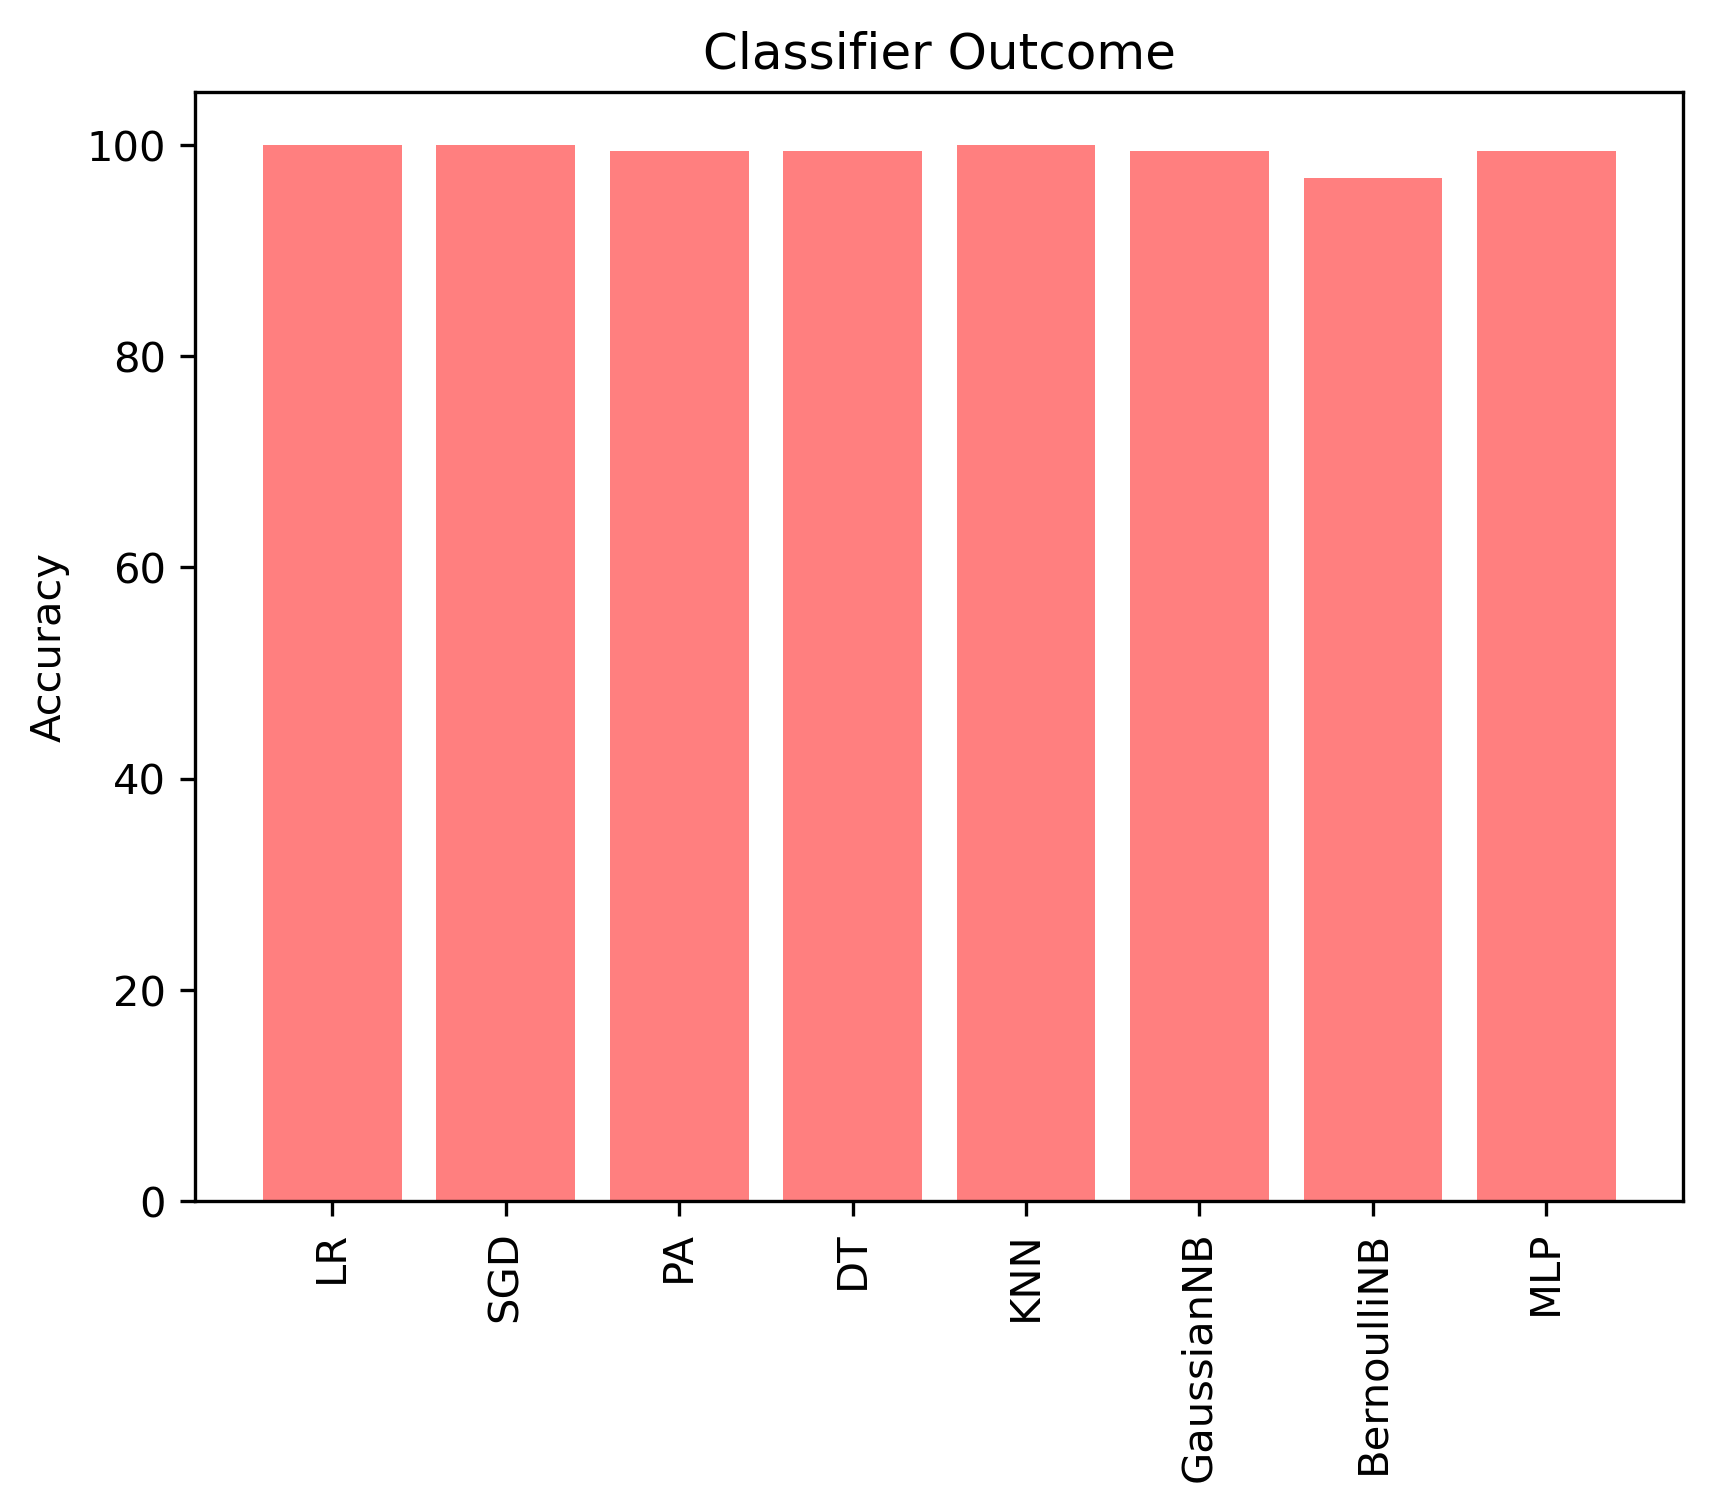

In [89]:
objects = ('LR', 'SGD', 'PA', 'DT', 'KNN', 'GaussianNB', 'BernoulliNB', 'MLP')
x_pos = np.arange(len(objects))
accuracies = [acc_lr, acc_sgd, acc_pa, acc_dt,  acc_knn, acc_gnb, acc_bnb, acc_mlp]
    
plt.bar(x_pos, accuracies, align='center', alpha=0.5, color='r')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()

#acc_svc,  'SVC',

AdaBoost with DT

Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Actual: 0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: attack, dtype: float64
Confusion Matrix


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[[163348   1792]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

Accuracy Score : 99.3965192090091
Precision Score : 0.9865864247432558
Recall Score : 1.0
F1 Score : 0.9932479276563678
LOGLOSS Value is 0.20843970640348058
AUC-ROC: 0.9945743005934359
1 2
1
Elapsed time: 22016.1353946 22015.795321
Train time: 0.34007 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


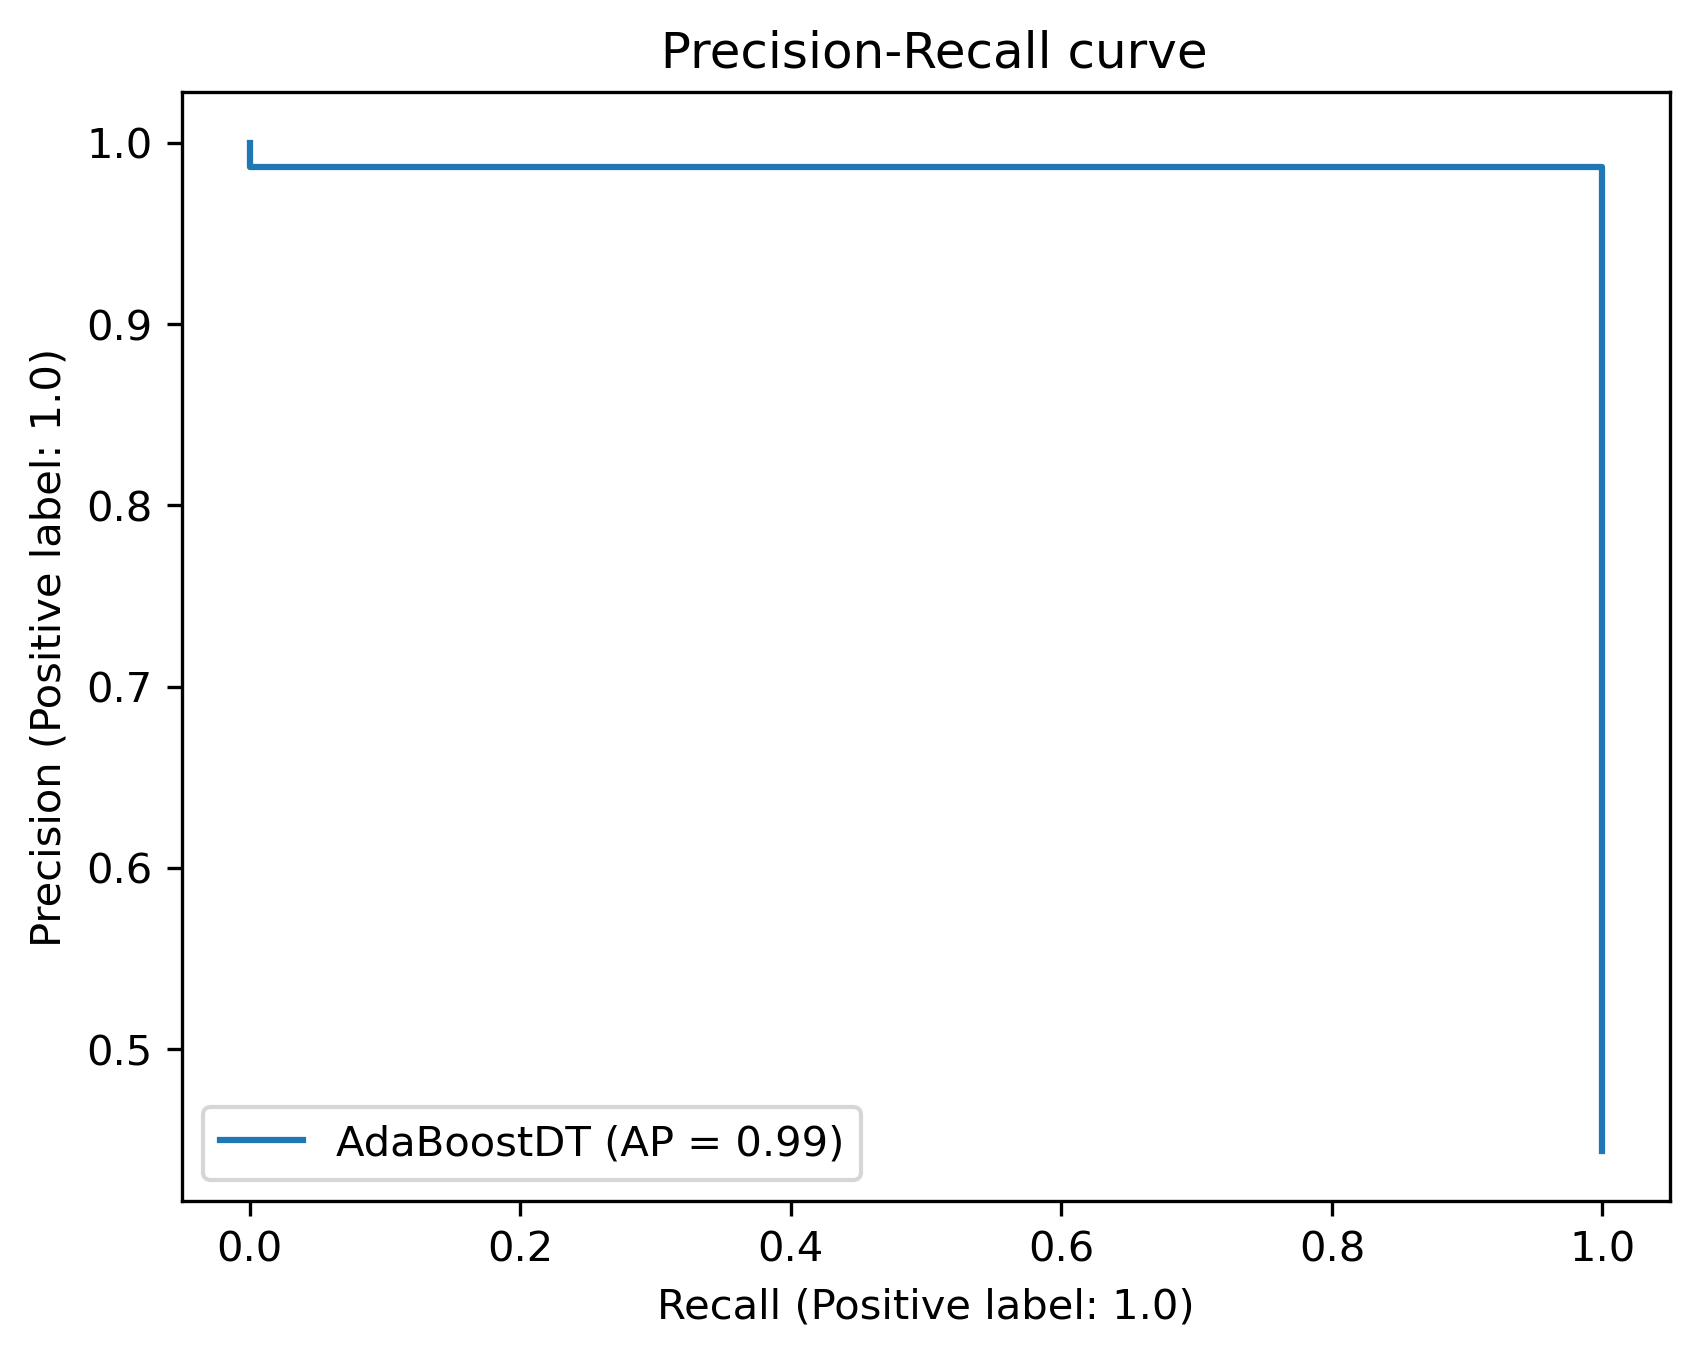

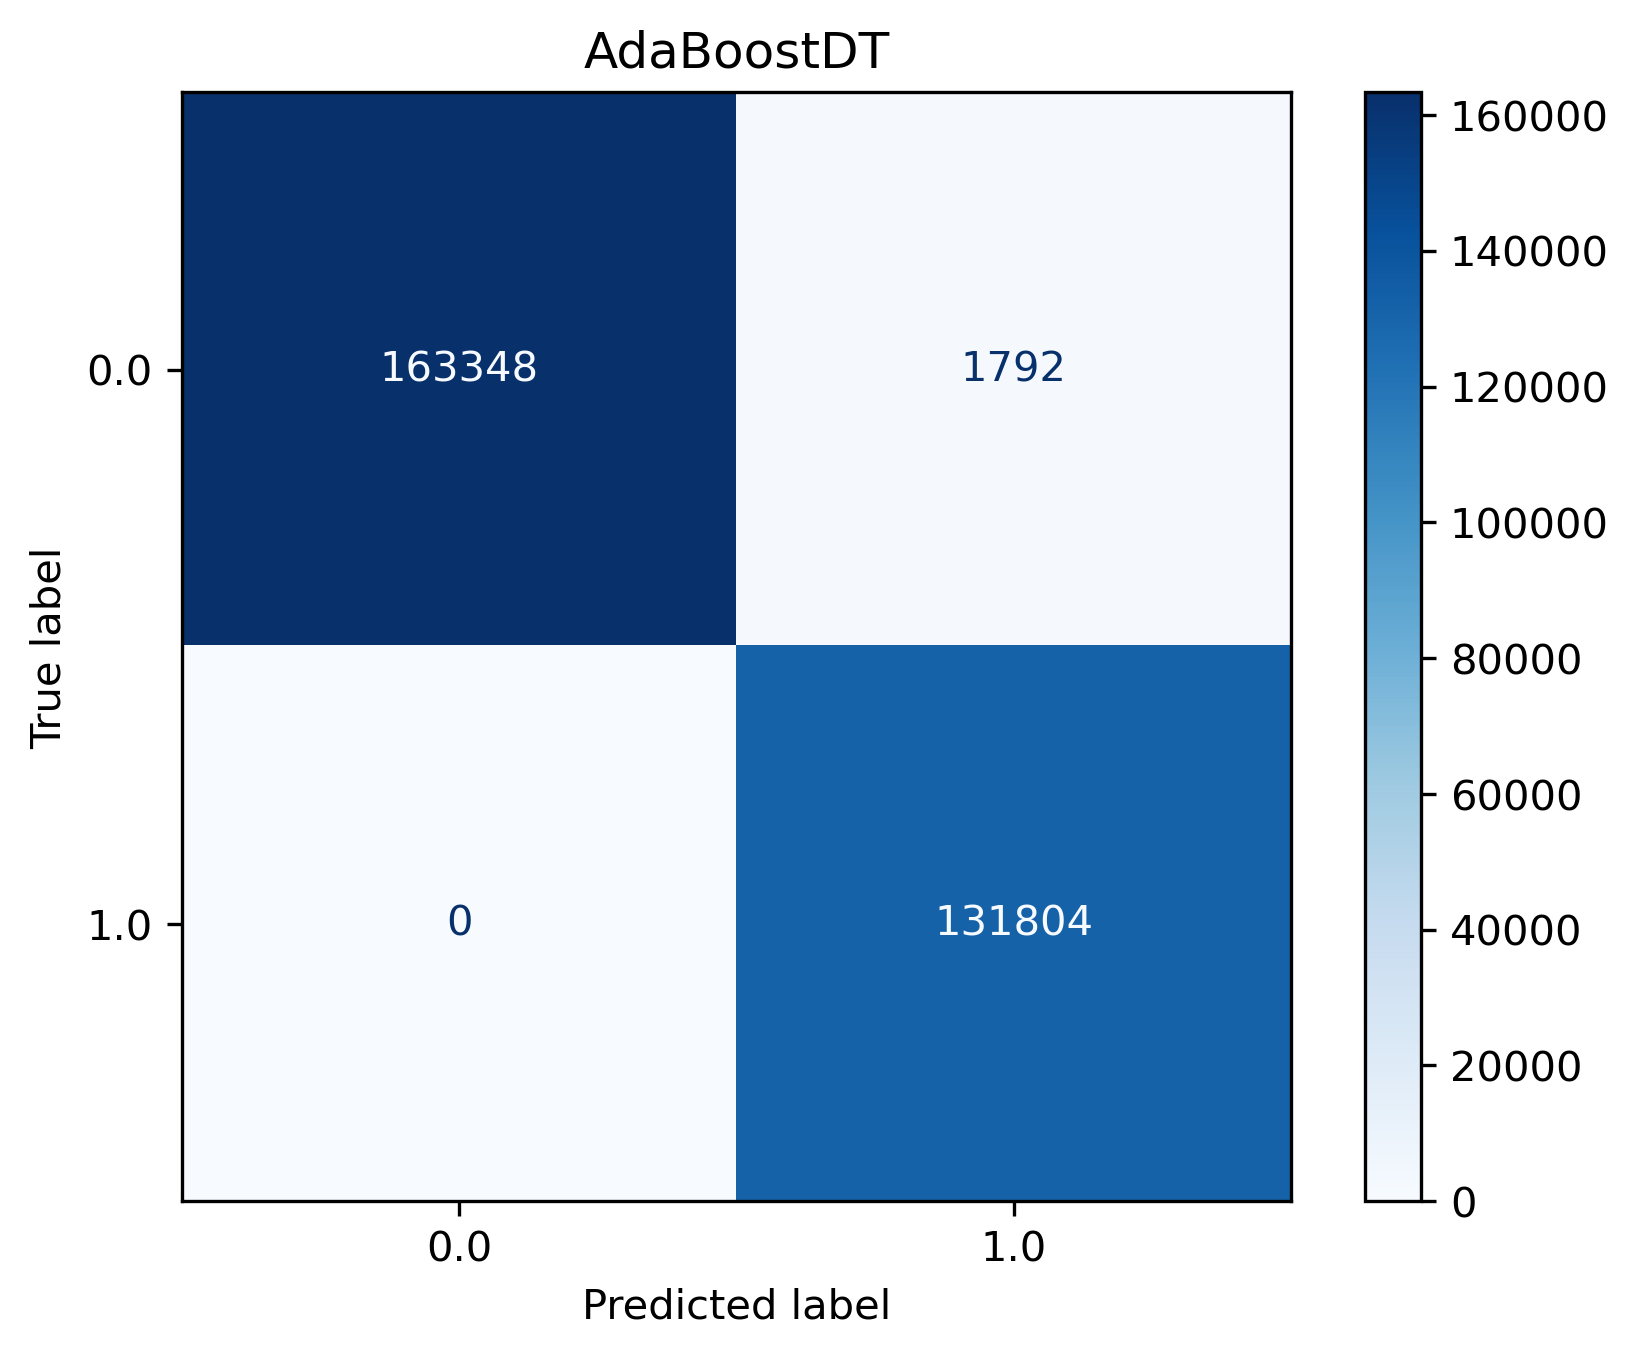

In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

abdt = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=1000)
abdt.fit(X_train, y_train)
y_pred = abdt.predict(X_test)
acc_abdt = abdt.score(X_test,y_test)*100
acc_abdt

print("Predictions:",y_pred[:10])
print("Actual:",y_test[:10])

get_probabilty_output(X_test=X_test, model_fitted=abdt)

#print('AdaBoost Accuracy with Decision Tree = ',(abdt.score(X_test,y_test)*100))

print("Confusion Matrix")
from sklearn.metrics import confusion_matrix
y_pred = abdt.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred))
print("=========================================================================")

from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred, target_names=['0.0', '1.0']))
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)*100))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('LOGLOSS Value is',log_loss(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
                       
print("=========================================================================")

# Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    abdt, X_test, y_test, name="AdaBoostDT"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(abdt, X_test, y_test, cmap = "Blues")
plt.title("AdaBoostDT")
print(confusion_matrix)

In [53]:
get_probabilty_output(X_test=X_test, model_fitted=abdt)

AdaBoostRF

Confusion Matrix


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[[163348   1792]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

Accuracy Score : 0.993965192090091
Precision Score : 0.9865864247432558
Recall Score : 1.0
F1 Score : 0.9932479276563678
LOGLOSS Value is 0.20843970640348058
AUC-ROC: 0.9945743005934359
1 2
1
Elapsed time: 24103.2868522 24102.6471804
Train time: 0.63967 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


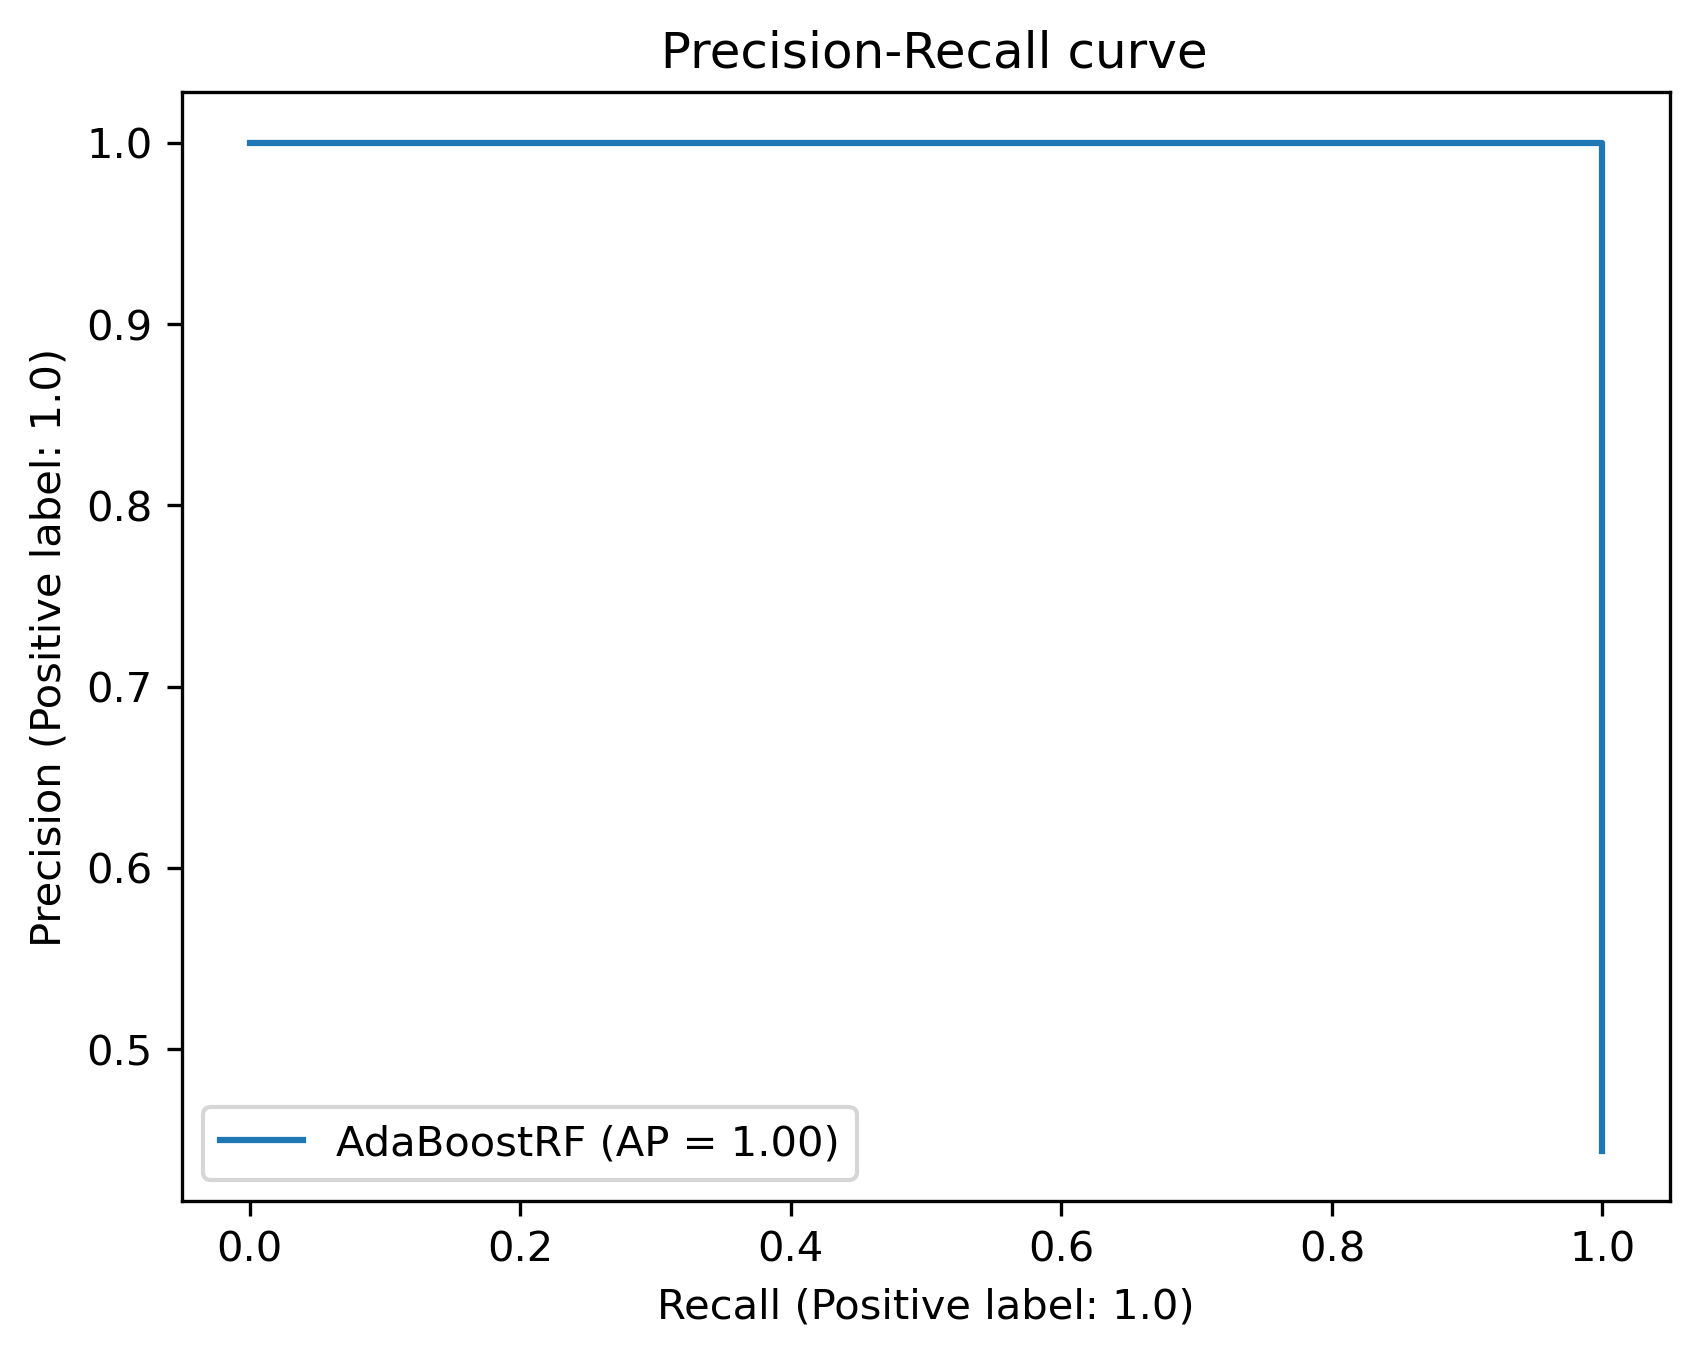

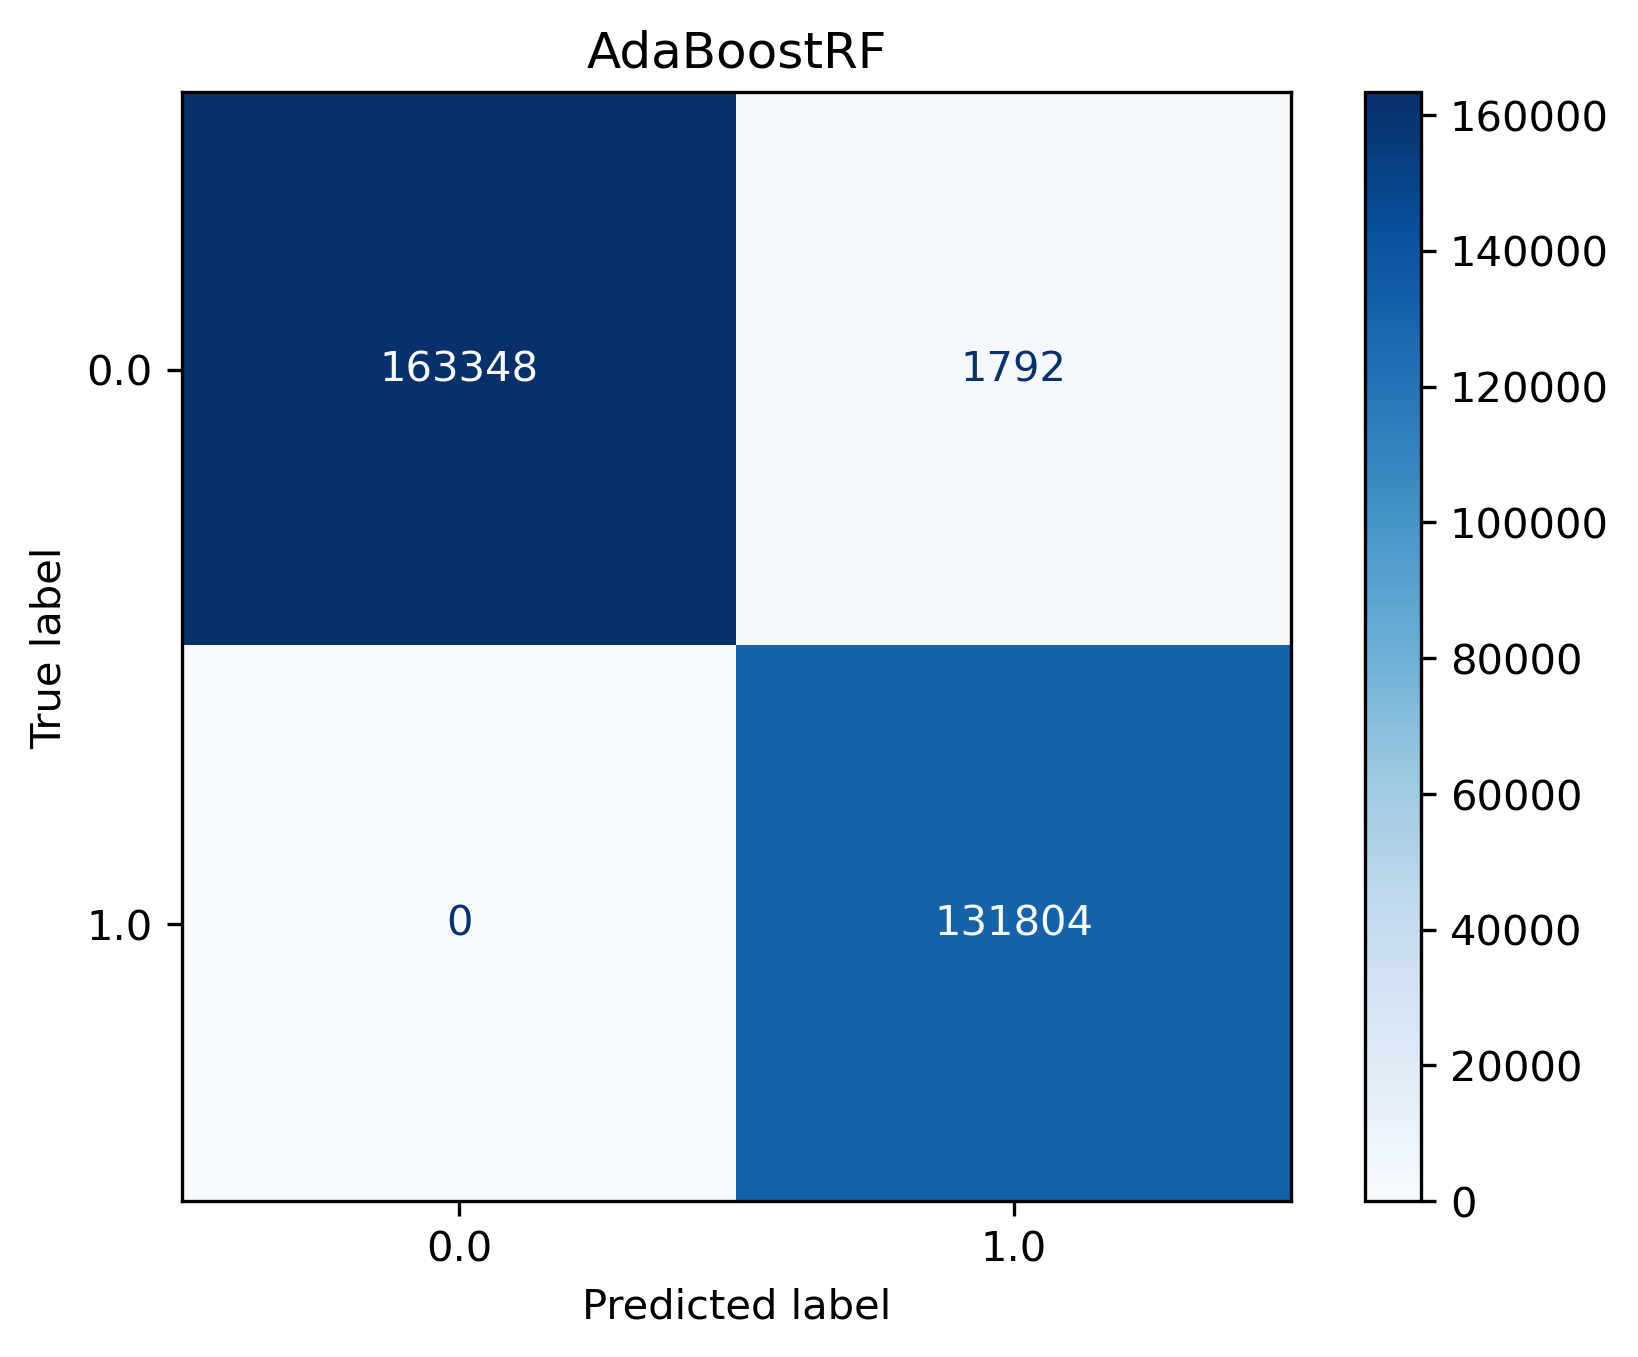

In [54]:
from sklearn.ensemble import RandomForestClassifier
abrf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,random_state=10),n_estimators=1000)
abrf.fit(X_train,y_train)
acc_abrf = abrf.score(X_test,y_test)*100
acc_abrf
print("Confusion Matrix")
from sklearn.metrics import confusion_matrix
y_pred2 = abrf.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred2))
print("=========================================================================")

from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred2, target_names=['0.0', '1.0']))
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred2)))
print('Precision Score : ' + str(precision_score(y_test,y_pred2)))
print('Recall Score : ' + str(recall_score(y_test,y_pred2)))
print('F1 Score : ' + str(f1_score(y_test,y_pred2)))
print('LOGLOSS Value is',log_loss(y_test, y_pred2))
print('AUC-ROC:',roc_auc_score(y_test, y_pred2))
                       
print("=========================================================================")


# Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))



from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    abrf, X_test, y_test, name="AdaBoostRF"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(abrf, X_test, y_test, cmap = "Blues")
plt.title("AdaBoostRF")
print(confusion_matrix)

AdaBoost with LR

AdaBoost Accuracy with Logistic Reg =  99.98888679346948
Confusion Matrix


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[[165140      0]
 [    33 131771]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    131804

    accuracy                           1.00    296944
   macro avg       1.00      1.00      1.00    296944
weighted avg       1.00      1.00      1.00    296944

Accuracy Score : 0.9998888679346948
Precision Score : 1.0
Recall Score : 0.9997496282358653
F1 Score : 0.9998747984444655
LOGLOSS Value is 0.003838365553883388
AUC-ROC: 0.9998748141179327
1 2
1
Elapsed time: 24780.2010949 24778.7288882
Train time: 1.47221 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


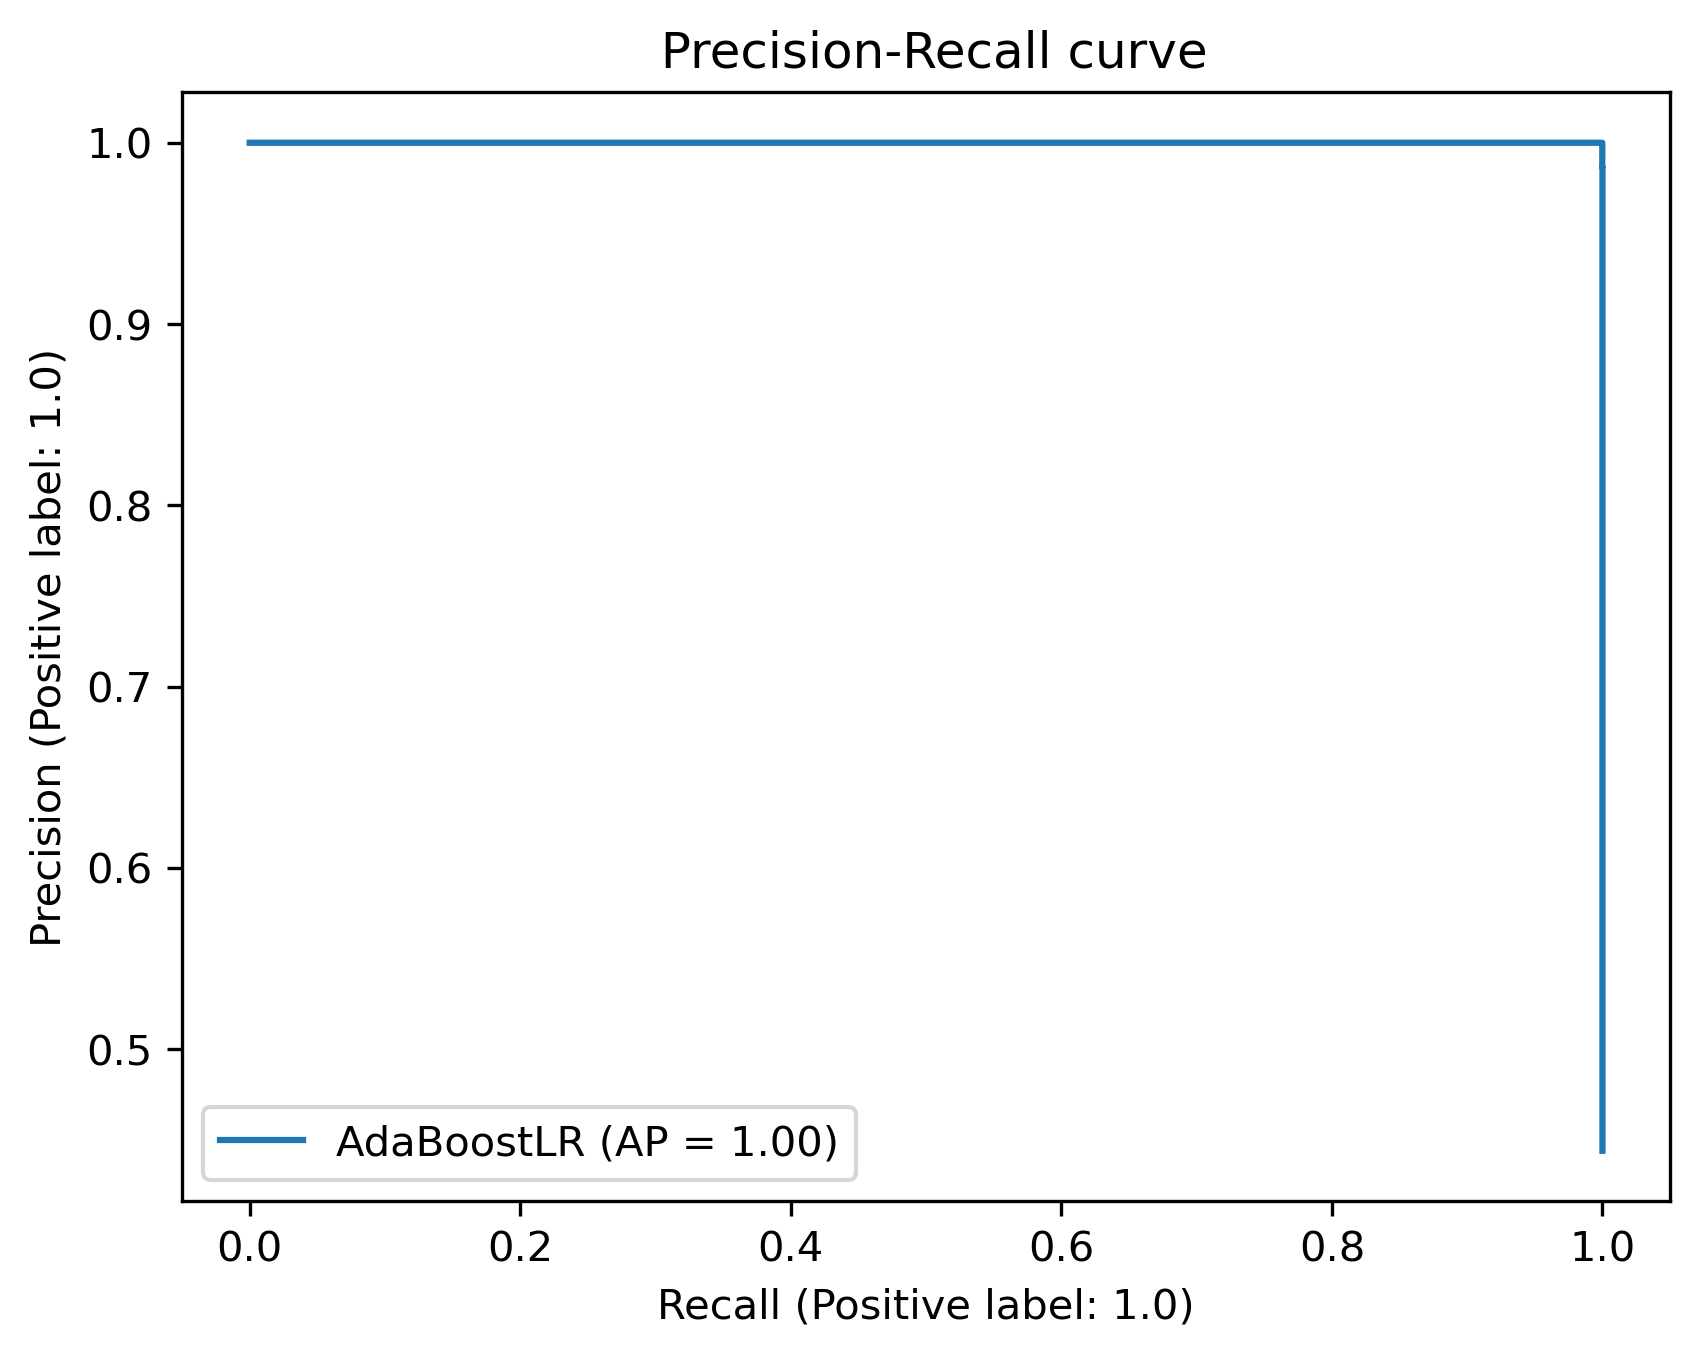

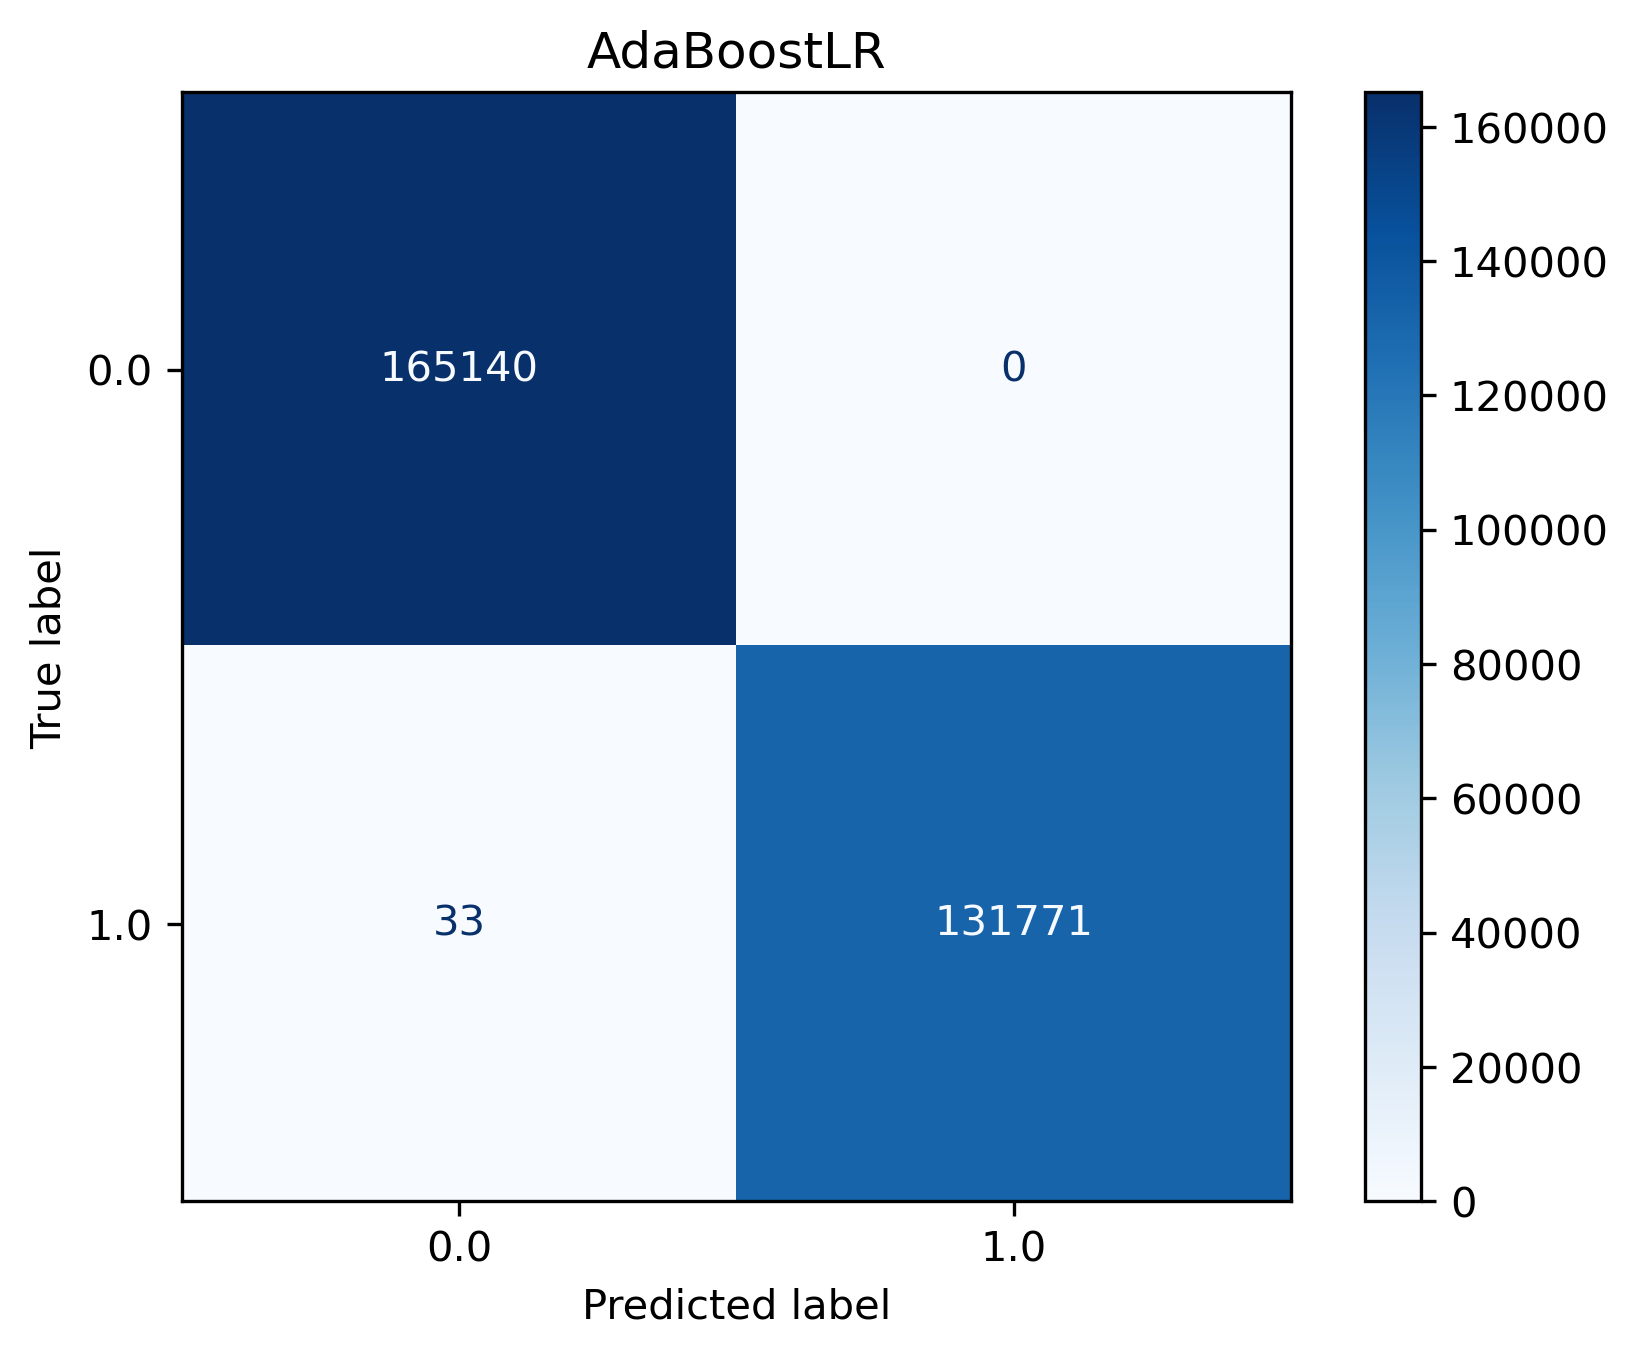

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

ablr = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000,solver = 'lbfgs'),n_estimators=1000)
ablr.fit(X_train, y_train)
print('AdaBoost Accuracy with Logistic Reg = ',(ablr.score(X_test, y_test)*100))

print("Confusion Matrix")
from sklearn.metrics import confusion_matrix
y_pred3 = ablr.predict(X_test.values)
acc_ablr = ablr.score(X_test,y_test)*100
acc_ablr
print(confusion_matrix(y_test.values.reshape(-1), y_pred3))
print("=========================================================================")

from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred3, target_names=['0.0', '1.0']))
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred3)))
print('Precision Score : ' + str(precision_score(y_test,y_pred3)))
print('Recall Score : ' + str(recall_score(y_test,y_pred3)))
print('F1 Score : ' + str(f1_score(y_test,y_pred3)))
print('LOGLOSS Value is',log_loss(y_test, y_pred3))
print('AUC-ROC:',roc_auc_score(y_test, y_pred3))                       
print("=========================================================================")

# Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))



from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    ablr, X_test, y_test, name="AdaBoostLR"
)
_ = display.ax_.set_title(" Precision-Recall curve")
confusion_matrix = metrics.plot_confusion_matrix(ablr, X_test, y_test, cmap = "Blues")
plt.title("AdaBoostLR")
print(confusion_matrix)

XGBoost Classifier

Confusion Matrix
[[163348   1792]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

Accuracy Score : 0.993965192090091
Precision Score : 0.9865864247432558
Recall Score : 1.0
F1 Score : 0.9932479276563678
LOGLOSS Value is 0.20843970640348058
AUC-ROC: 0.9945743005934359
Accuracy is  0.993965192090091
1 2
1
Elapsed time: 24943.6177201 24942.5635107
Train time: 1.05421 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


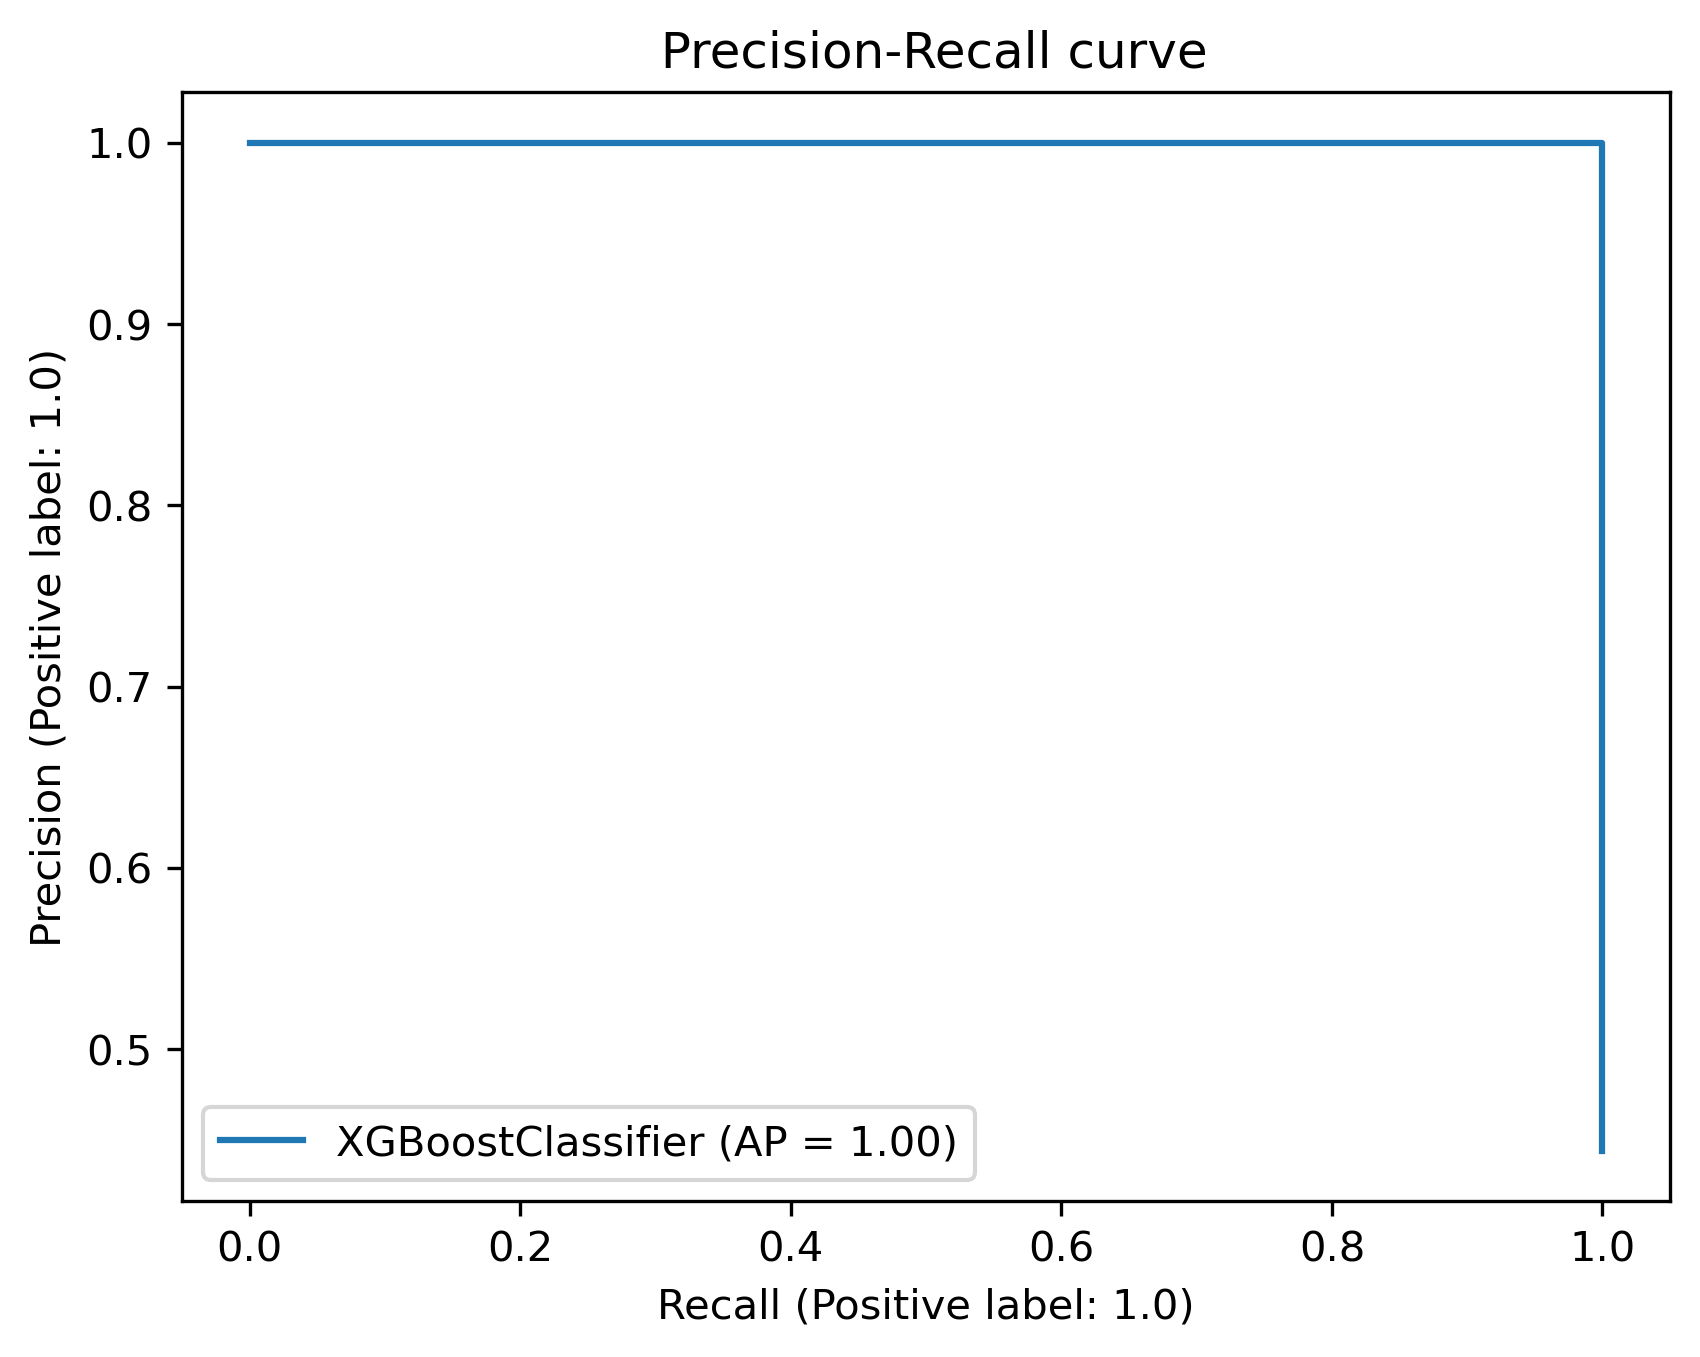

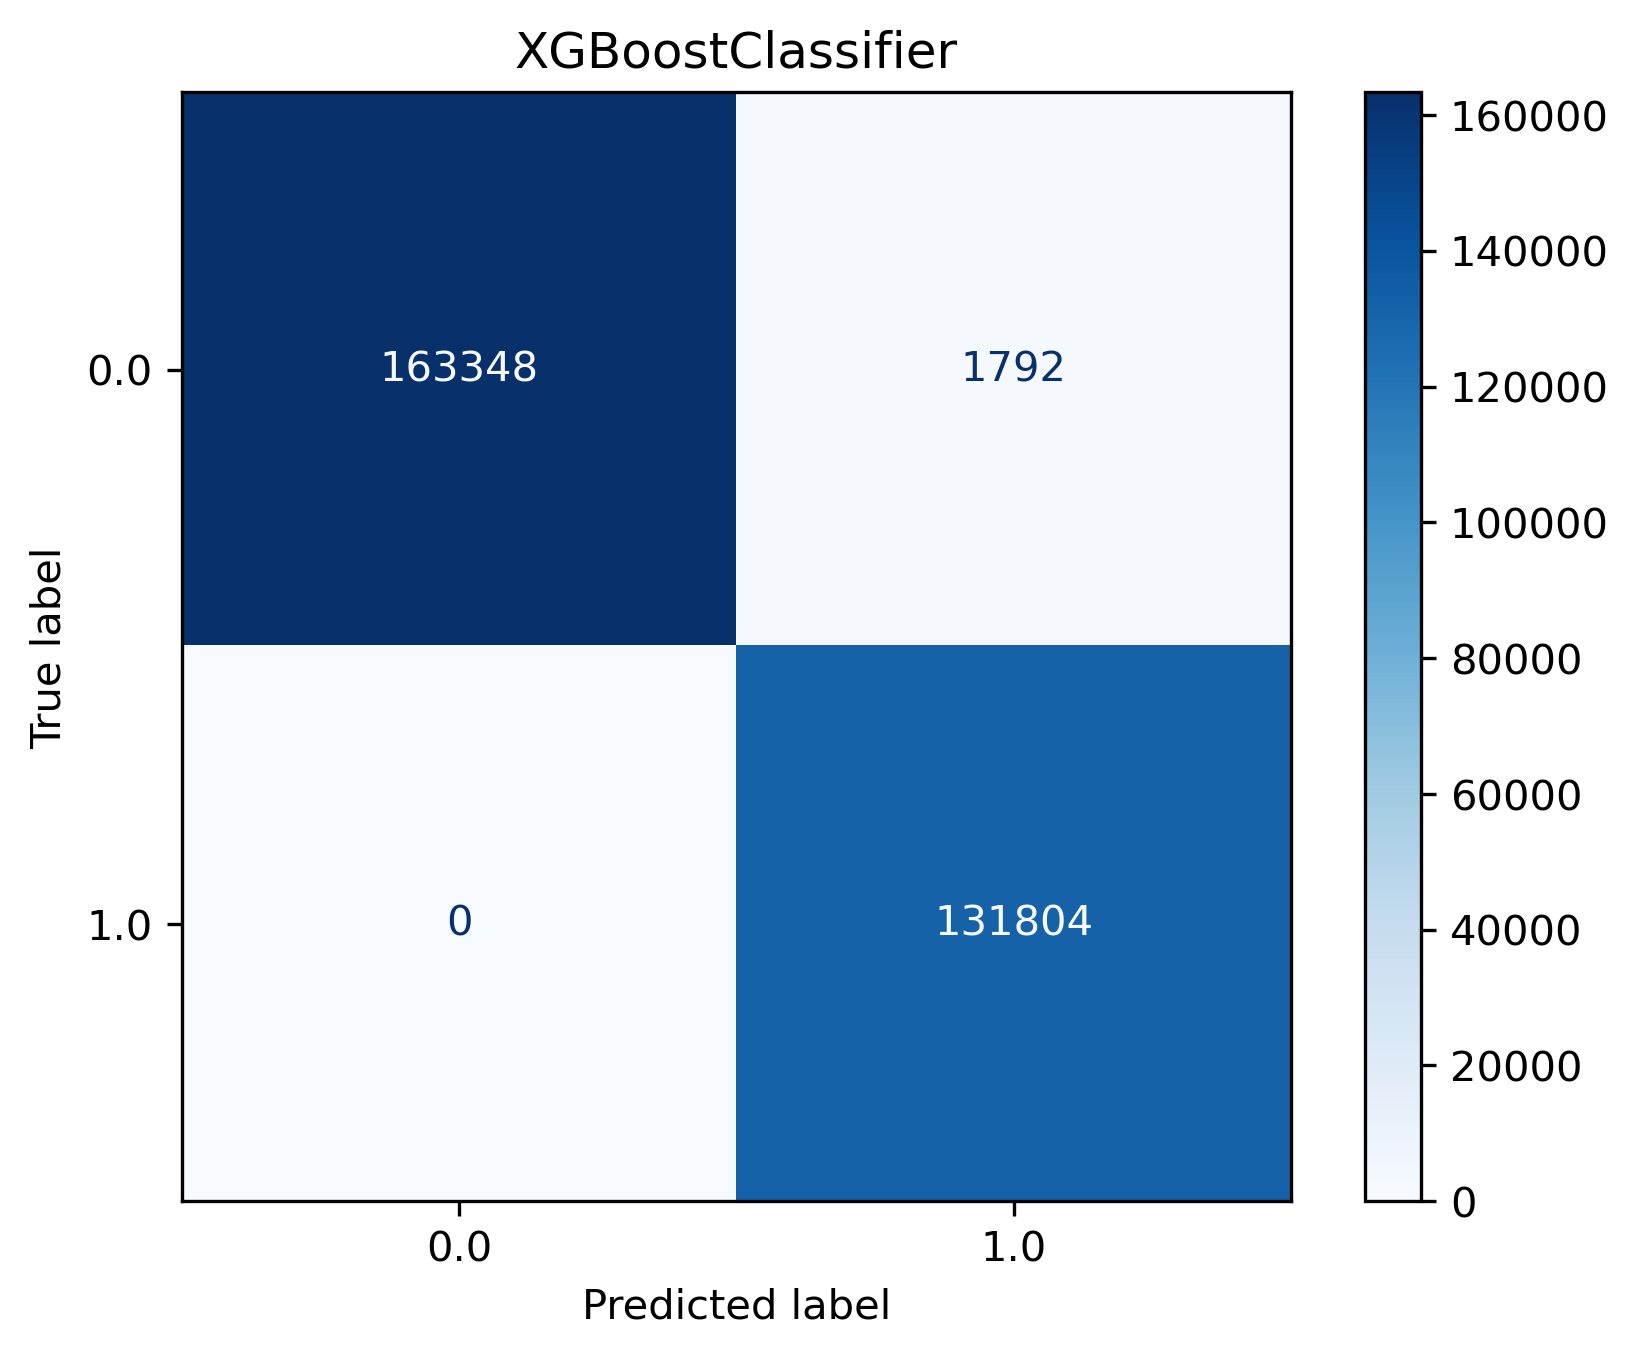

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_pred4 = xgb.predict(X_test)
acc_xgb = xgb.score(X_test,y_test)*100
acc_xgb

print("Confusion Matrix")
from sklearn.metrics import confusion_matrix
y_pred4 = xgb.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred4))
print("=========================================================================")

from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred4, target_names=['0.0', '1.0']))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred4)))
print('Precision Score : ' + str(precision_score(y_test,y_pred4)))
print('Recall Score : ' + str(recall_score(y_test,y_pred4)))
print('F1 Score : ' + str(f1_score(y_test,y_pred4)))
print('LOGLOSS Value is',log_loss(y_test, y_pred4))
print('AUC-ROC:',roc_auc_score(y_test, y_pred4))                       
                       
print("=========================================================================")

print("Accuracy is ", accuracy_score(y_test, y_pred4))

# print the scores on training and test set
#print('Training set score: {:.4f}'.format(xgb.score(X_train, y_train)))
#print('Test set score: {:.4f}'.format(xgb.score(X_test, y_test)))

# Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))



from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    xgb, X_test, y_test, name="XGBoostClassifier"
)
_ = display.ax_.set_title(" Precision-Recall curve")
confusion_matrix = metrics.plot_confusion_matrix(xgb, X_test, y_test, cmap = "Blues")
plt.title("XGBoostClassifier")
print(confusion_matrix)

LightGBM Classifier

Confusion Matrix
[[163348   1792]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

Accuracy Score : 0.993965192090091
Precision Score : 0.9865864247432558
Recall Score : 1.0
F1 Score : 0.9932479276563678
LOGLOSS Value is 0.20843970640348058
AUC-ROC: 0.9945743005934359
1 2
1
Elapsed time: 25080.4897243 25079.2229358
Train time: 1.26679 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


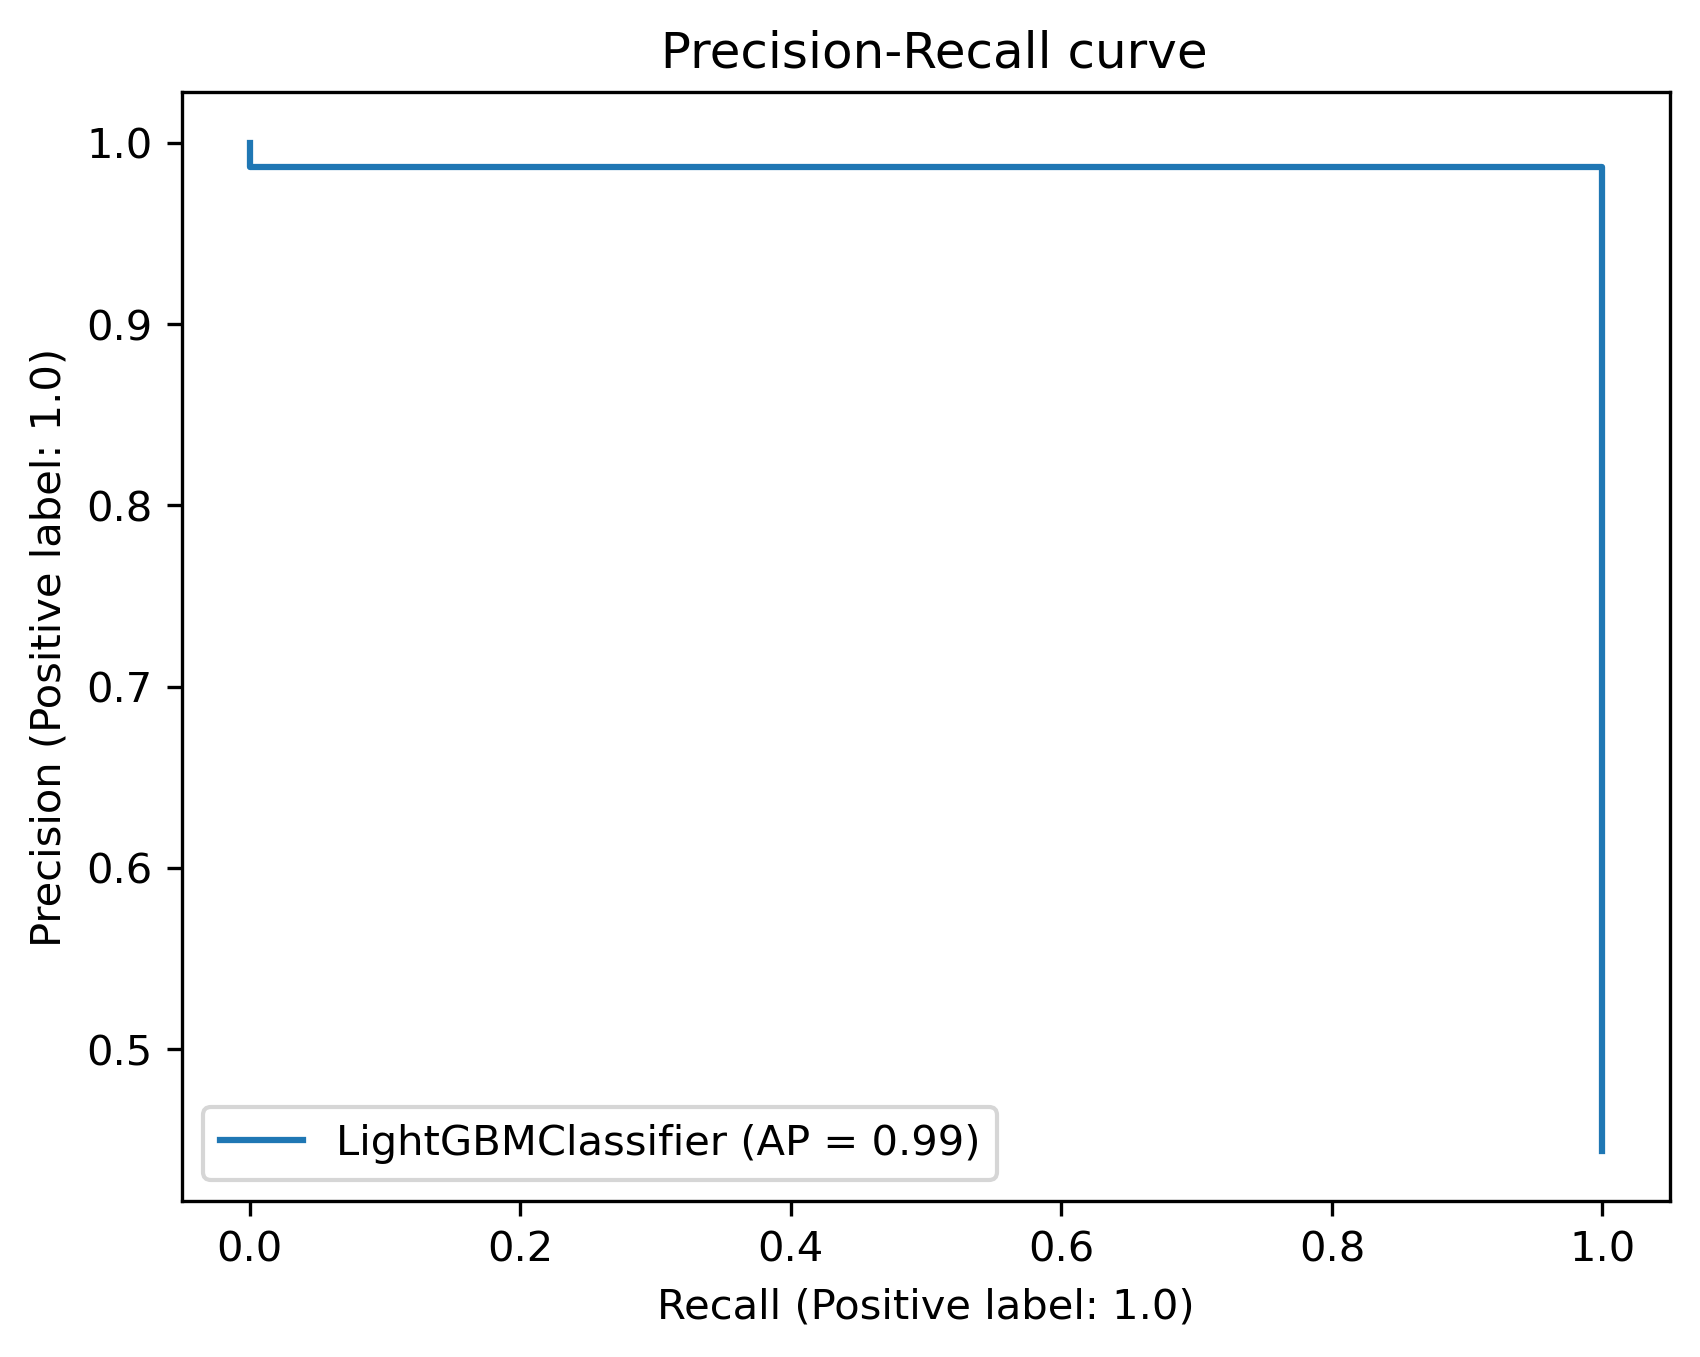

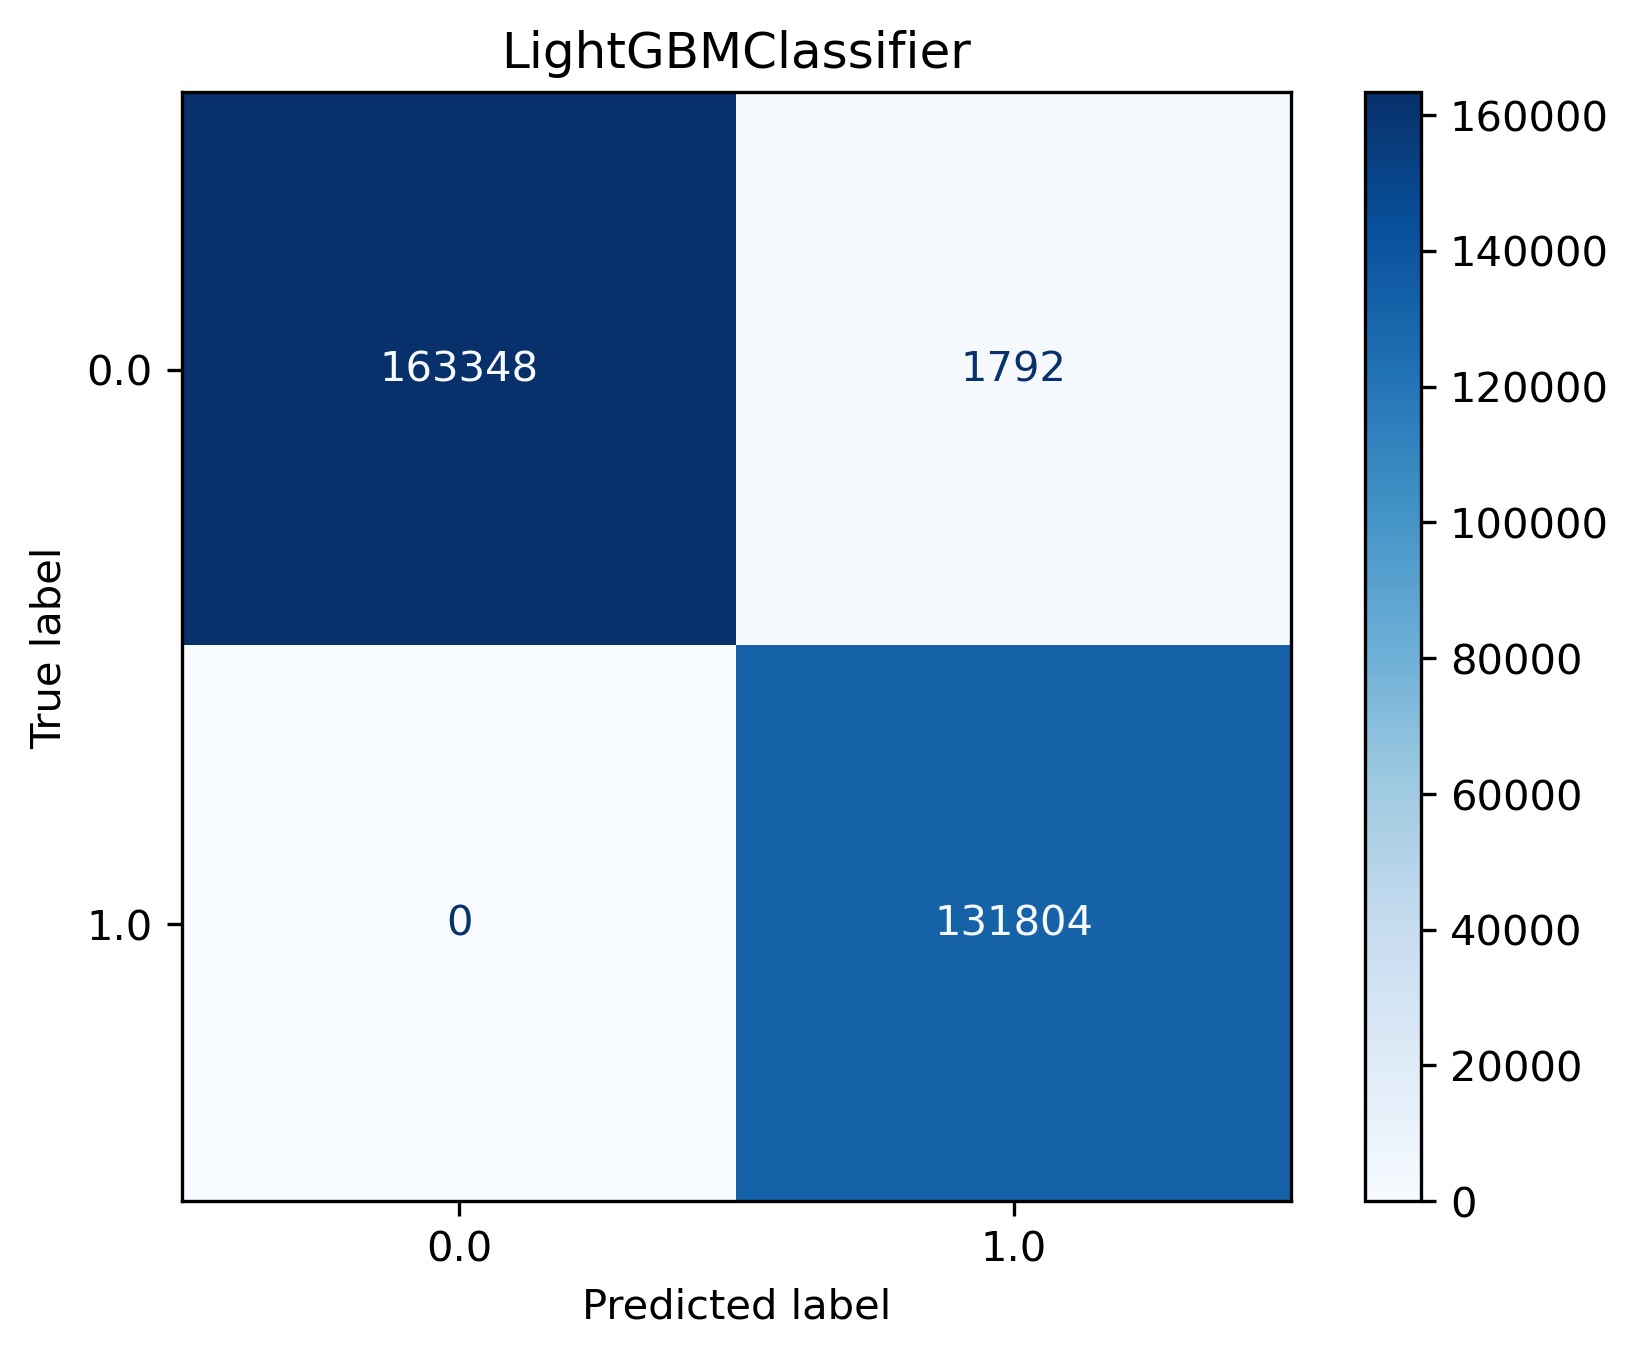

In [57]:
# build the lightgbm model
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import lightgbm as lgb
import warnings

lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train)
y_pred5 =lgb_clf.predict(X_test.values)
acc_lgb = lgb_clf.score(X_test,y_test)*100
acc_lgb

print("Confusion Matrix")
from sklearn.metrics import confusion_matrix
#y_pred5 = lgb_clf.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred5))

print("=========================================================================")
from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred5, target_names=['0.0', '1.0']))
print("=========================================================================")
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred5)))
print('Precision Score : ' + str(precision_score(y_test,y_pred5)))
print('Recall Score : ' + str(recall_score(y_test,y_pred5)))
print('F1 Score : ' + str(f1_score(y_test,y_pred5)))
print('LOGLOSS Value is',log_loss(y_test, y_pred5))
print('AUC-ROC:',roc_auc_score(y_test, y_pred5))                       

#print("Accuracy is ", accuracy_score(y_test, y_pred))

# view accuracy
from sklearn.metrics import accuracy_score
#accuracy=accuracy_score(y_pred5, y_test)
#print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred5)))

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    lgb_clf, X_test, y_test, name="LightGBMClassifier"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(lgb_clf, X_test, y_test, cmap = "Blues")
plt.title("LightGBMClassifier")
print(confusion_matrix)

ExtraTree Classifier

Confusion Matrix


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[163348   1792]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

Accuracy Score : 0.993965192090091
Precision Score : 0.9865864247432558
Recall Score : 1.0
F1 Score : 0.9932479276563678
LOGLOSS Value is 0.20843970640348058
AUC-ROC: 0.9945743005934359
Extra Classifier Accuracy of the model: 99.40%
1 2
1
Elapsed time: 12741.6362234 12741.2921683
Train time: 0.34406 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


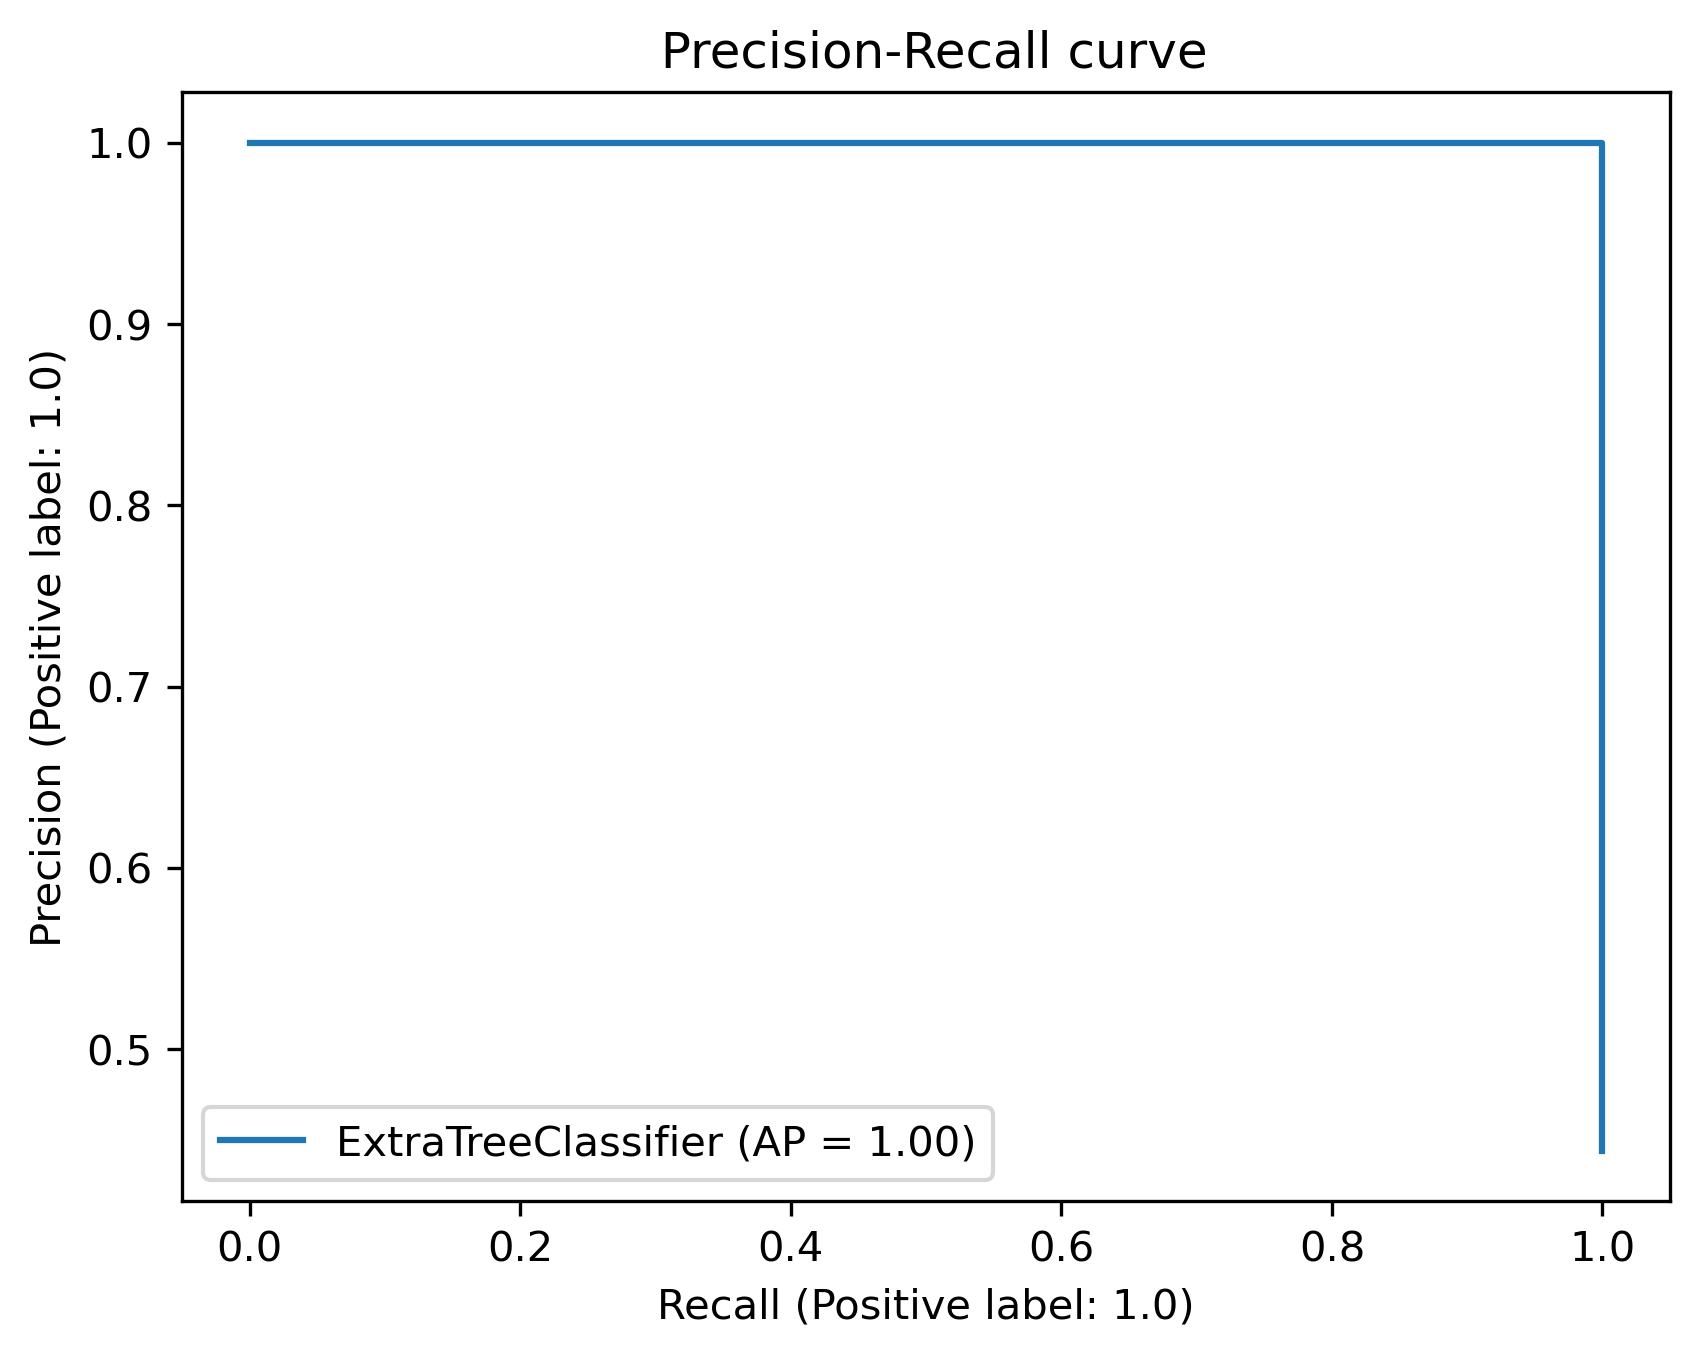

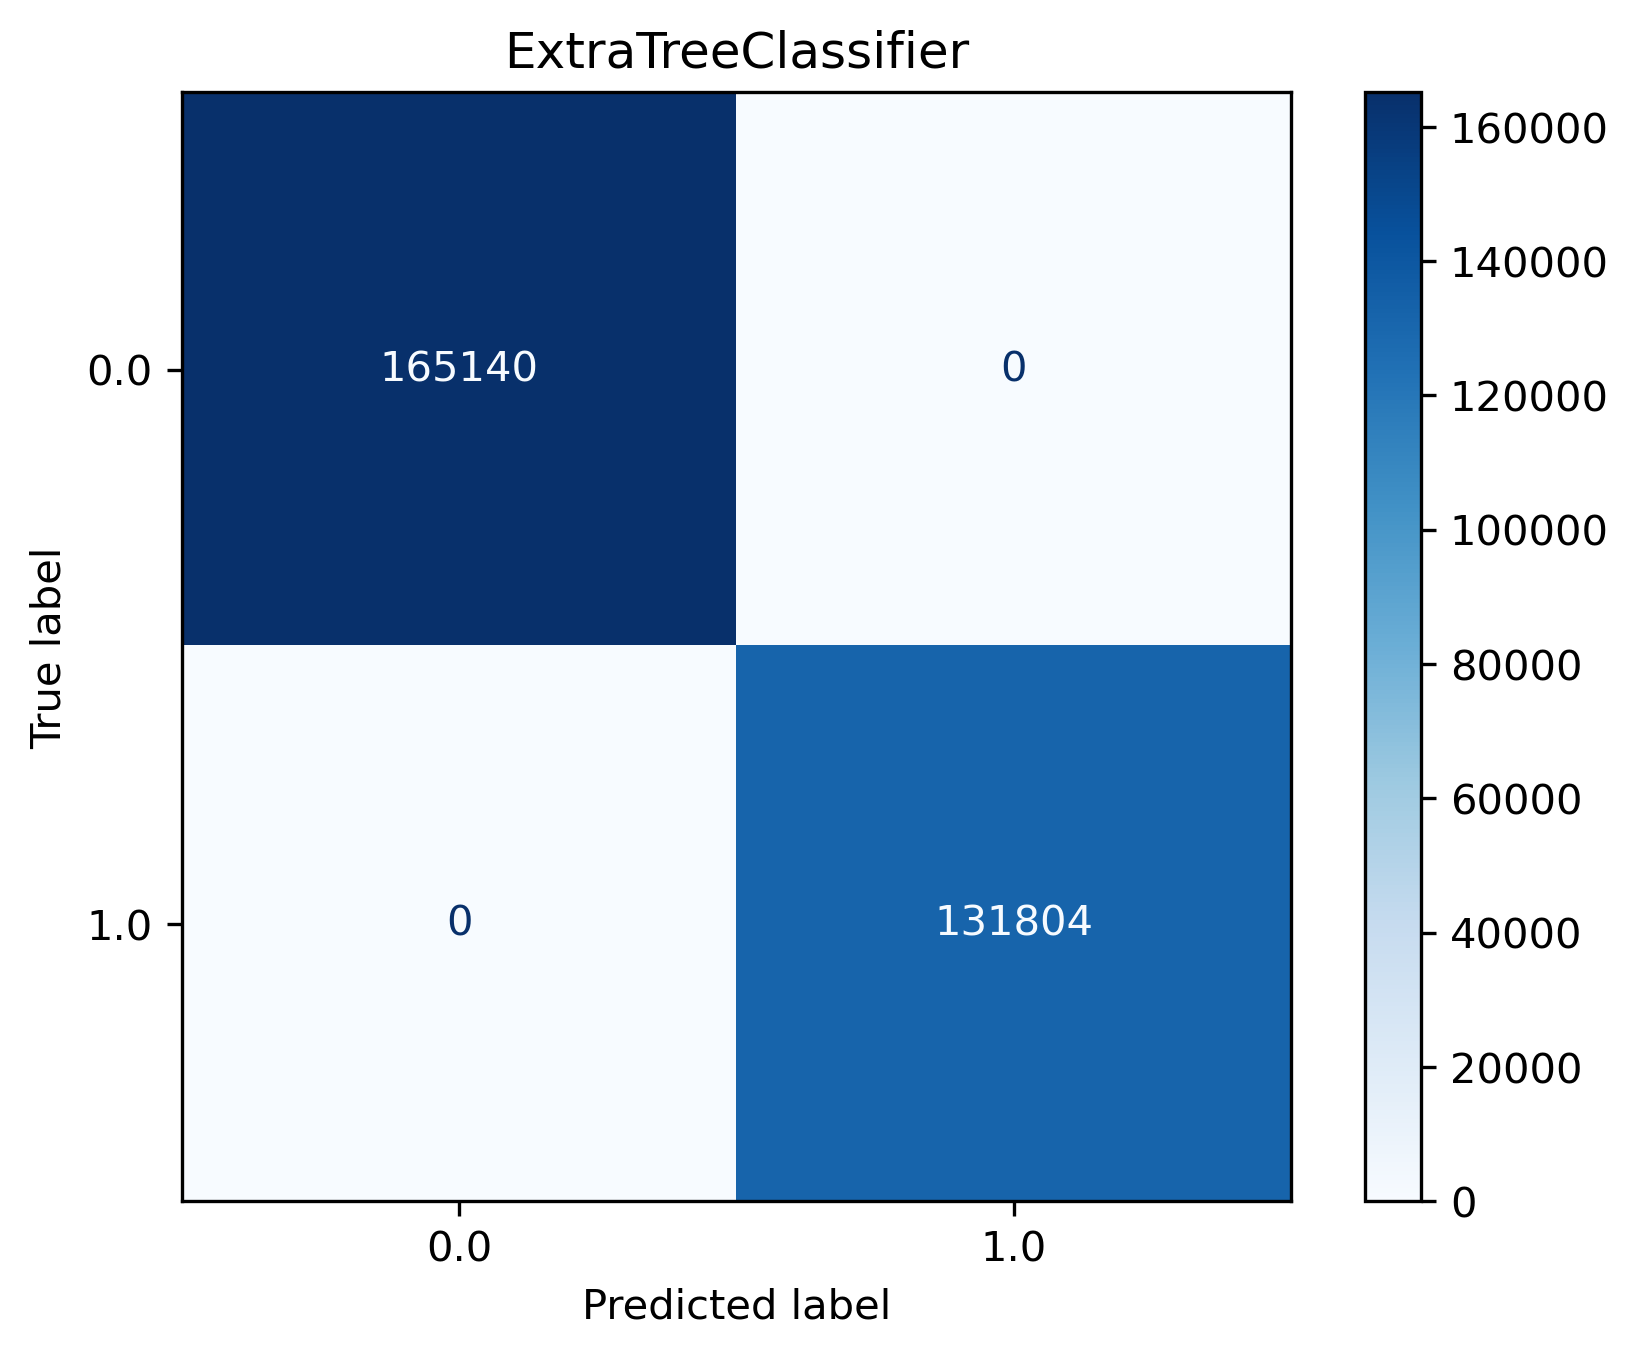

In [50]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import warnings

from sklearn.metrics import classification_report
print("Confusion Matrix")

extra_tree_forest = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', max_depth=None,
                                        min_samples_leaf=1)
extra_tree_forest.fit(X_train, y_train)
y_pred6 = extra_tree_forest.predict(X_test)
acc_xt = extra_tree_forest.score(X_test,y_test)*100
acc_xt

print("=========================================================================")
print(confusion_matrix(y_test.values.reshape(-1), y_pred6.reshape(-1)))
print(classification_report(y_test.values.reshape(-1), y_pred6.reshape(-1), target_names=['0.0', '1.0']))
print("=========================================================================")
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred6)))
print('Precision Score : ' + str(precision_score(y_test,y_pred6)))
print('Recall Score : ' + str(recall_score(y_test,y_pred6)))
print('F1 Score : ' + str(f1_score(y_test,y_pred6)))
print('LOGLOSS Value is',log_loss(y_test, y_pred6))
print('AUC-ROC:',roc_auc_score(y_test, y_pred6))                       

# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)
# Training the model
extra_tree_forest.fit(X, y)
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extra_tree_forest.estimators_], axis = 0)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred6)
print('Extra Classifier Accuracy of the model: {:.2f}%'.format(accuracy*100))

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    extra_tree_forest, X_test, y_test, name="ExtraTreeClassifier"
)
_ = display.ax_.set_title(" Precision-Recall curve")

confusion_matrix = metrics.plot_confusion_matrix(extra_tree_forest, X_test, y_test, cmap = "Blues")
plt.title("ExtraTreeClassifier")
print(confusion_matrix)

Gradient Boosting Classifier

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


[[163348   1792]
 [     0 131804]]

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

Accuracy Score : 0.993965192090091
Precision Score : 0.9865864247432558
Recall Score : 1.0
F1 Score : 0.9932479276563678
LOGLOSS Value is 0.20843970640348058
AUC-ROC: 0.9945743005934359
1 2
1
Elapsed time: 25661.2643068 25660.783603
Train time: 0.48070 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


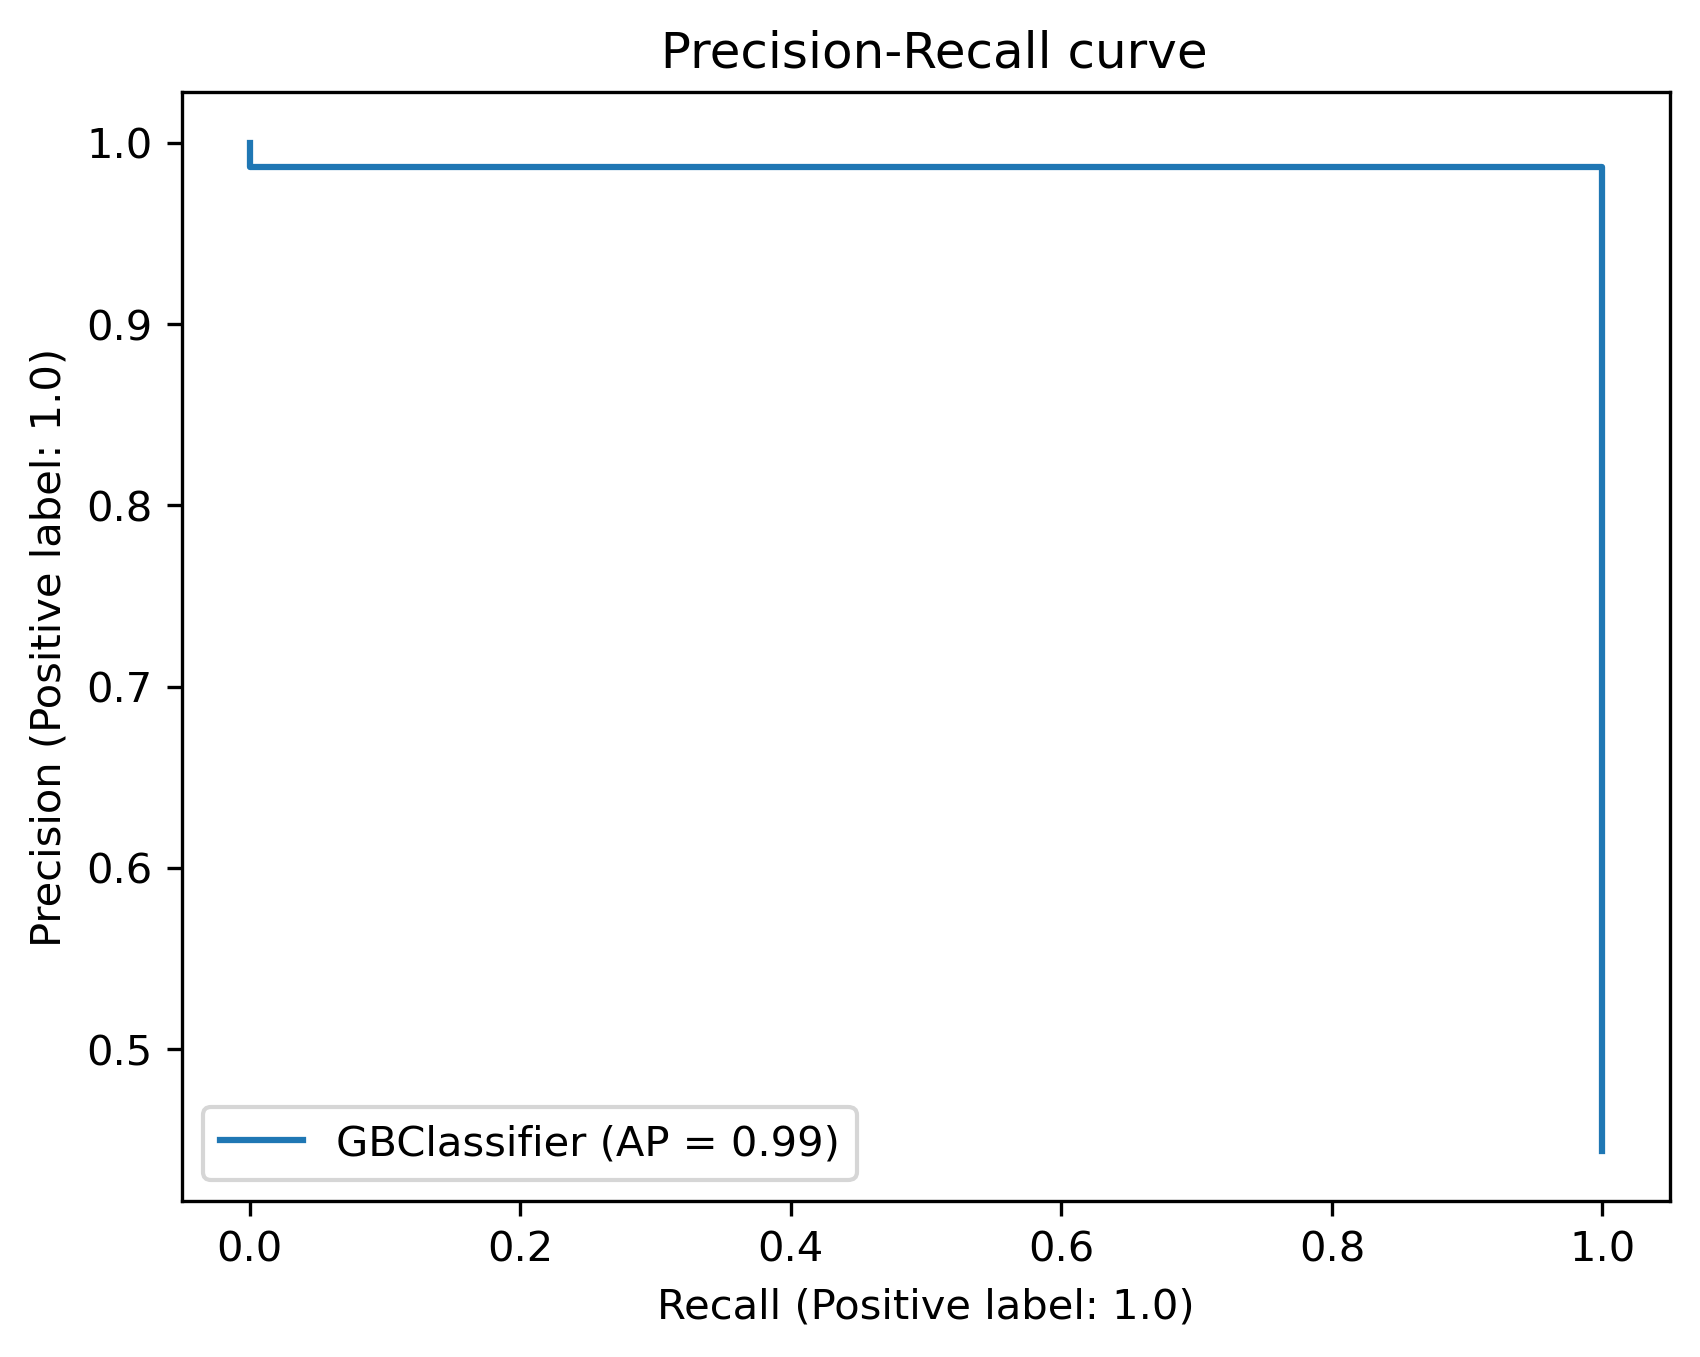

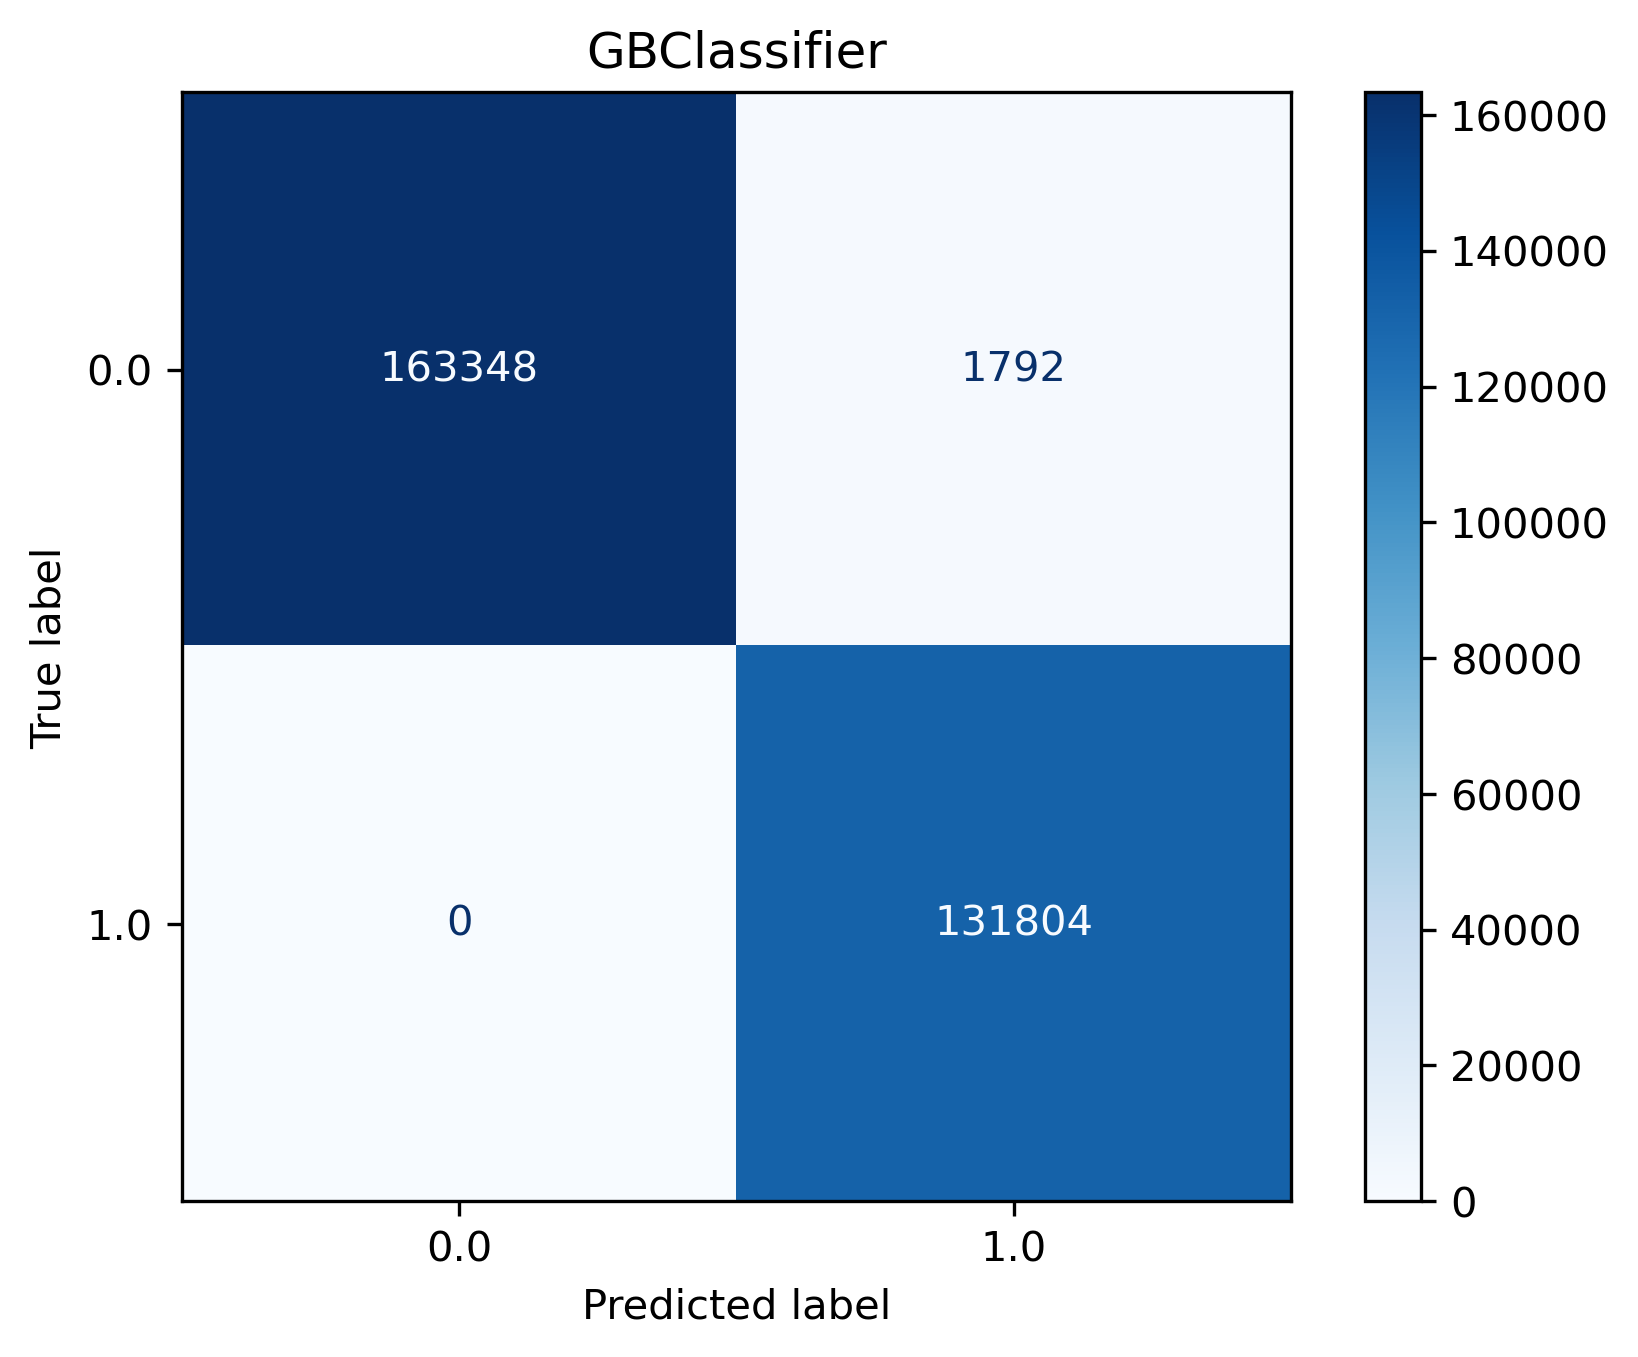

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings

gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train.values, y_train.values)
y_pred7 = gb_clf.predict(X_test.values)
y_pred7
acc_gb = gb_clf.score(X_test,y_test)*100
acc_gb
#accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
y_pred = gb_clf.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred7))
print("\nClassification Report")
print("=========================================================================")
from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred7, target_names=['0.0', '1.0']))

print("=========================================================================")
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred7)))
print('Precision Score : ' + str(precision_score(y_test,y_pred7)))
print('Recall Score : ' + str(recall_score(y_test,y_pred7)))
print('F1 Score : ' + str(f1_score(y_test,y_pred7)))
print('LOGLOSS Value is',log_loss(y_test, y_pred7))
print('AUC-ROC:',roc_auc_score(y_test, y_pred7))                       

# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred7, y_test)
#print('GBClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test.values, y_pred7)))

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    gb_clf, X_test.values, y_test.values, name="GBClassifier"
)
_ = display.ax_.set_title(" Precision-Recall curve")
confusion_matrix = metrics.plot_confusion_matrix(gb_clf, X_test, y_test, cmap = "Blues")
plt.title("GBClassifier")
print(confusion_matrix)

Bagging-Decision Tree Classifier

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


[[163348   1792]
 [     0 131804]]

Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

Bagging Classifier Model accuracy score: 0.9940
Accuracy Score : 0.993965192090091
Precision Score : 0.9865864247432558
Recall Score : 1.0
F1 Score : 0.9932479276563678
LOGLOSS Value is 0.20843970640348058
AUC-ROC: 0.9945743005934359
1 2
1
Elapsed time: 26245.2525379 26244.40052
Train time: 0.85202 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


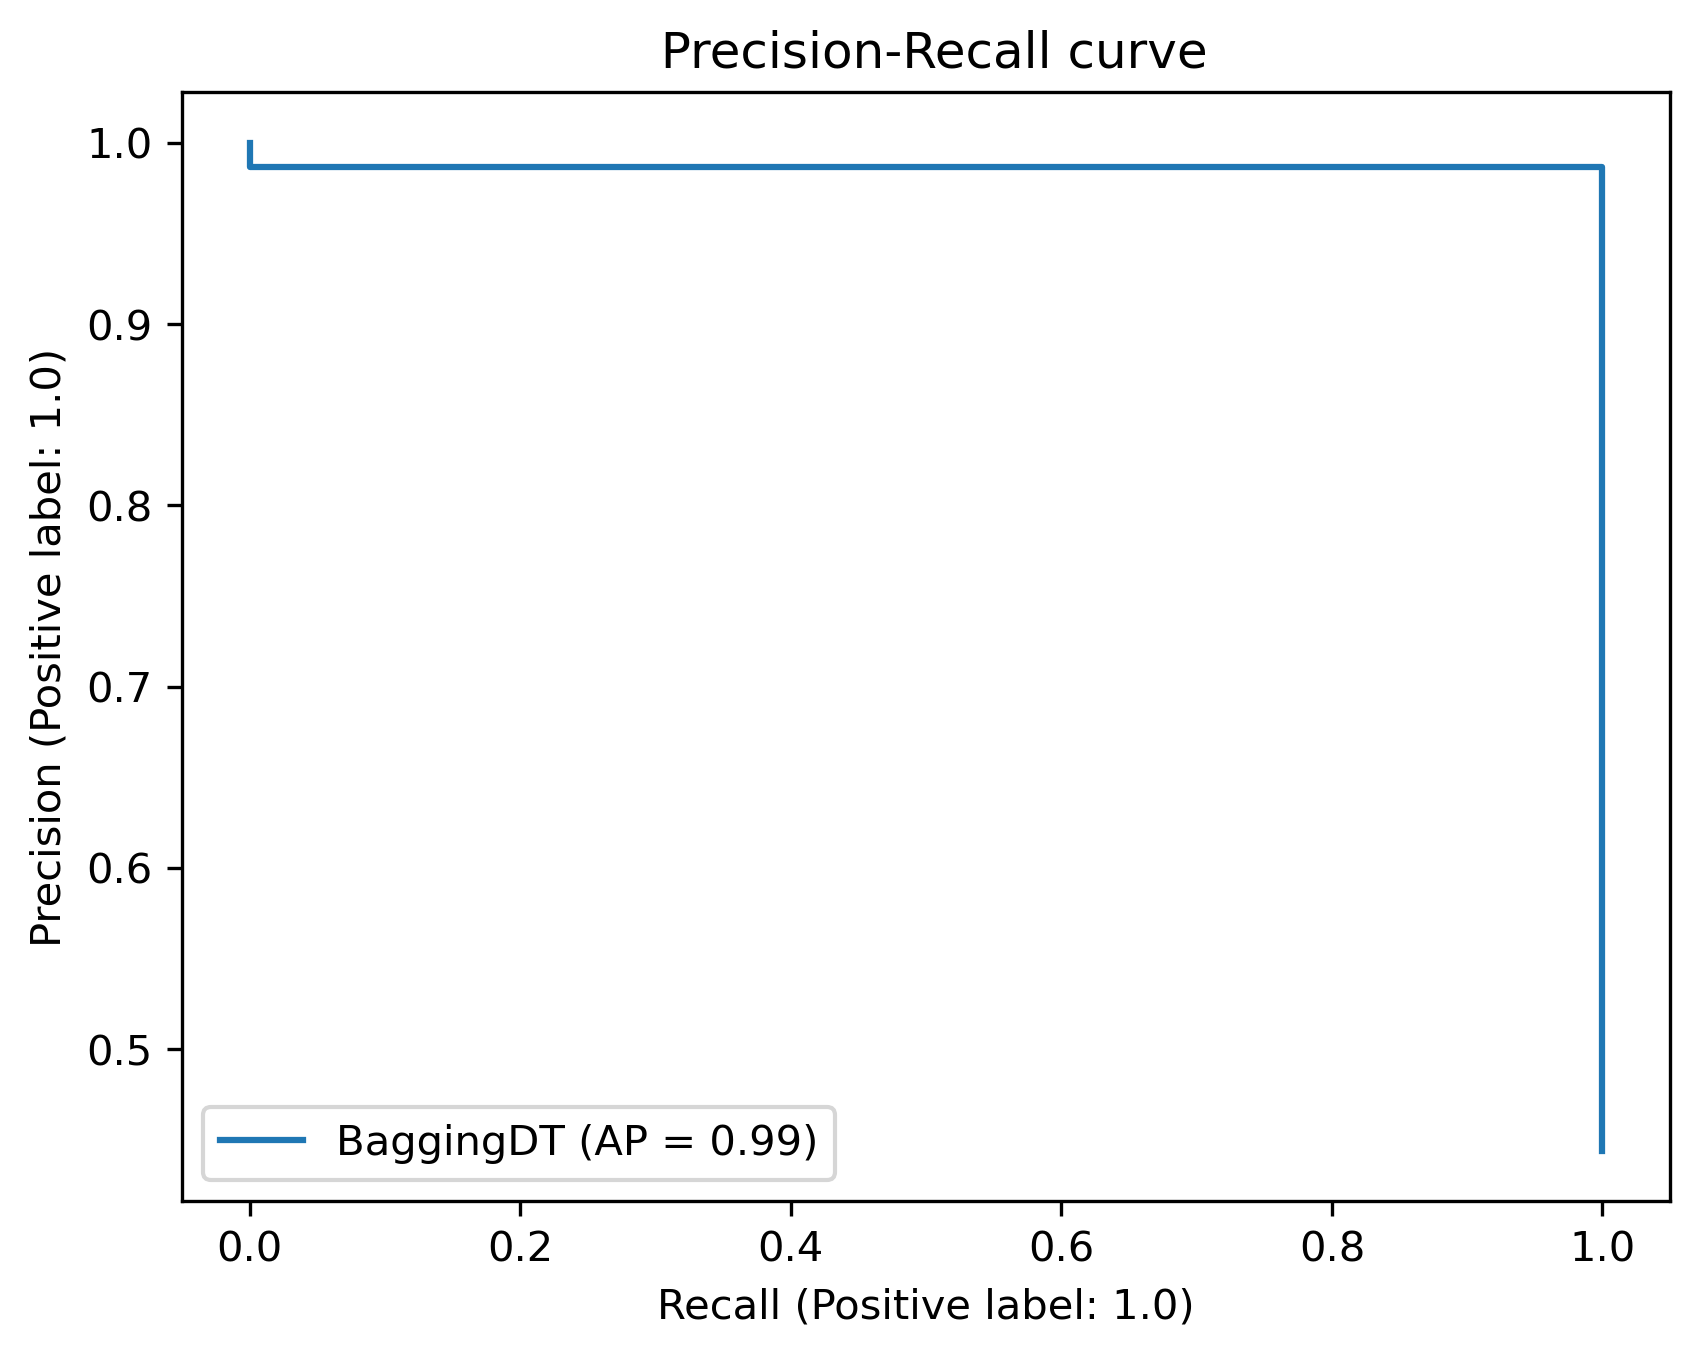

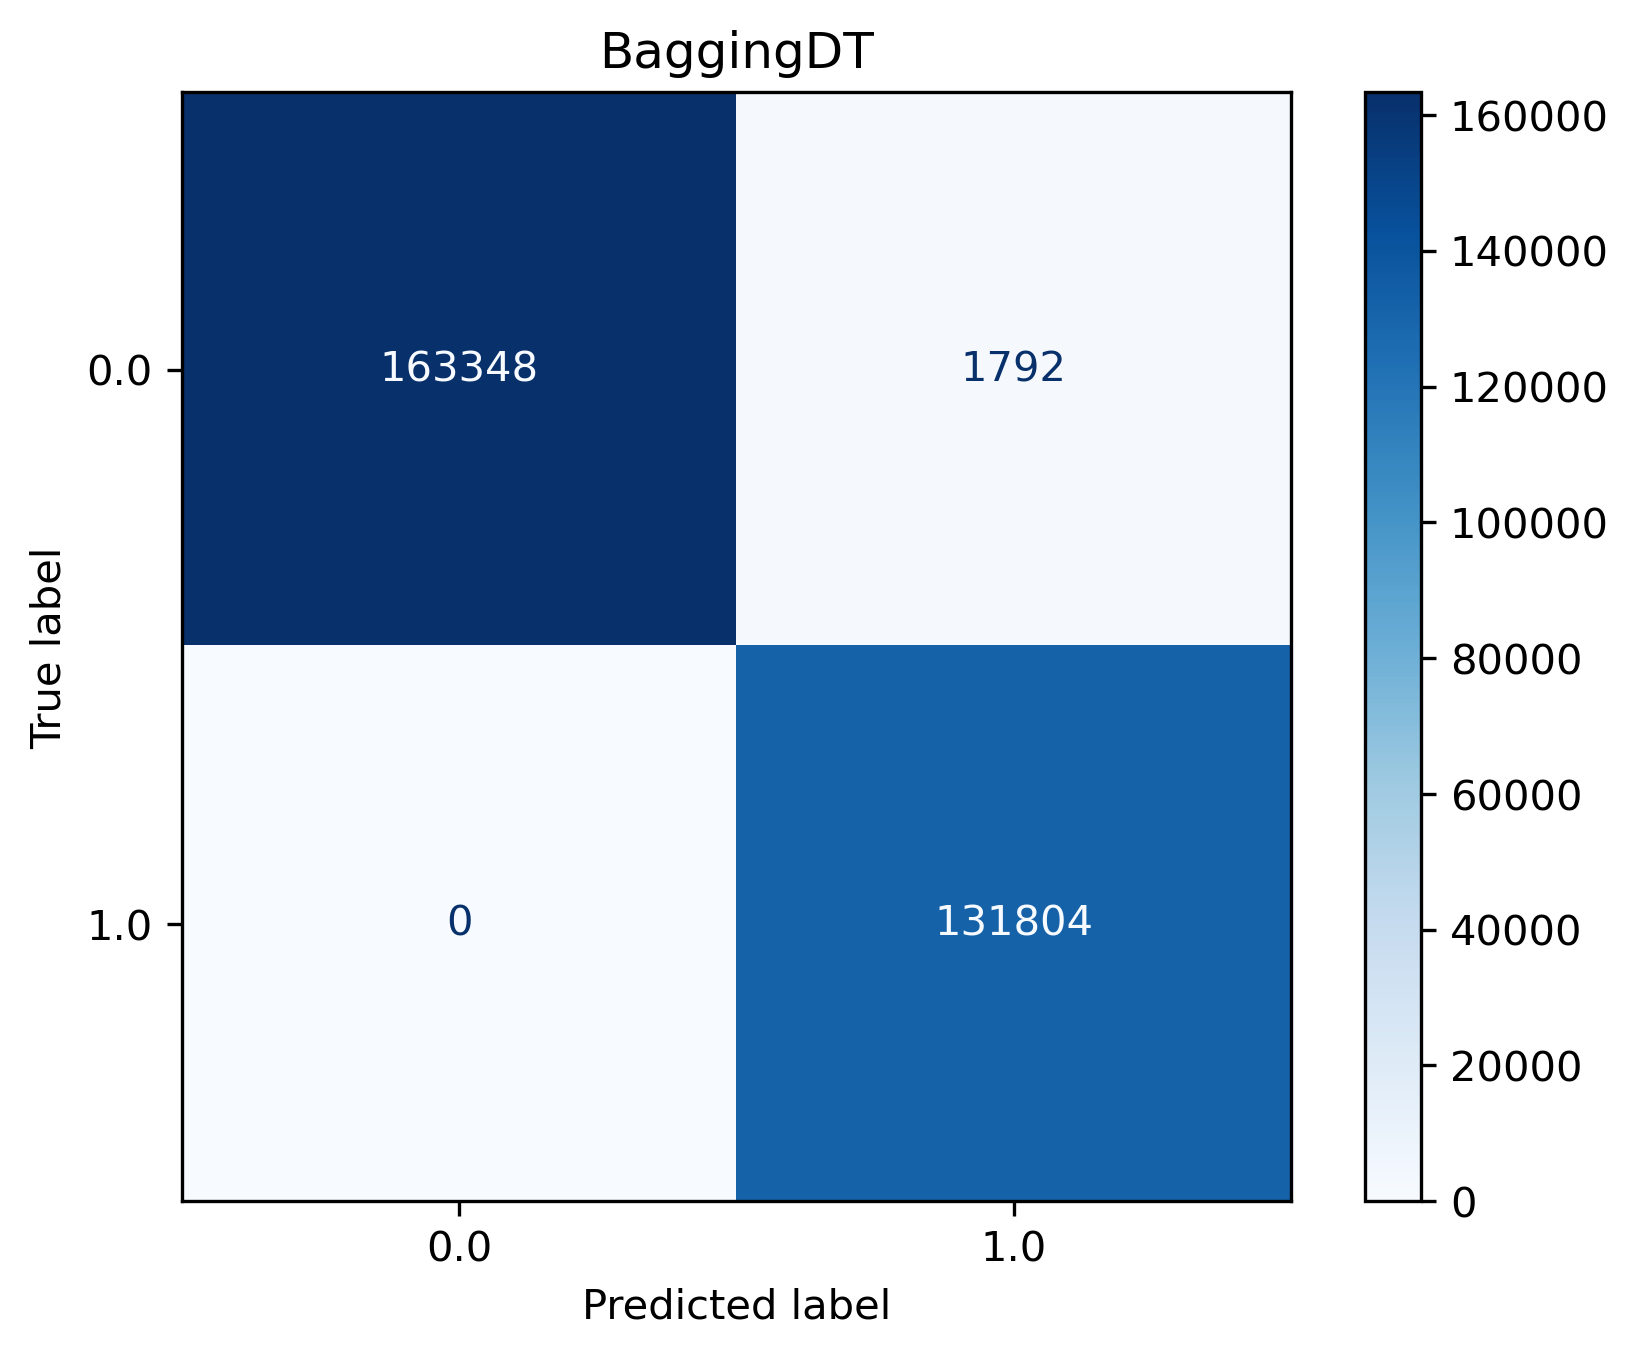

In [59]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X_train.values, y_train.values.reshape(-1))
y_pred11 = bag.predict(X_test.values)
acc_bagdt = bag.score(X_test,y_test)*100
acc_bagdt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test.values.reshape(-1), y_pred11))
print("\nClassification Report")
print("===============================================================")

from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1),  y_pred11, target_names=['0.0', '1.0']))
print("===============================================================")

# print the scores on training and test set
print('Bagging Classifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred11)))
#print('Training set score: {:.4f}'.format(bag.score(X_train, y_train)))
#print('Test set score: {:.4f}'.format(bag.score(X_test, y_test)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred11)))
print('Precision Score : ' + str(precision_score(y_test,y_pred11)))
print('Recall Score : ' + str(recall_score(y_test,y_pred11)))
print('F1 Score : ' + str(f1_score(y_test,y_pred11)))
print('LOGLOSS Value is',log_loss(y_test, y_pred11))
print('AUC-ROC:',roc_auc_score(y_test, y_pred11))                       

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    bag, X_test.values, y_test.values, name="BaggingDT"
)
_ = display.ax_.set_title(" Precision-Recall curve")
confusion_matrix = metrics.plot_confusion_matrix(bag, X_test, y_test, cmap = "Blues")
plt.title("BaggingDT")
print(confusion_matrix)

# Random Forest

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[[163471   1669]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

RF Model accuracy score: 0.9944
Accuracy Score : 0.9943794116062288
Precision Score : 0.9874955983607171
Recall Score : 1.0
F1 Score : 0.9937084632290022
LOGLOSS Value is 0.19413273994833102
AUC-ROC: 0.9949467118808284
1 2
1
Elapsed time: 18589.3854039 18588.696542
Train time: 0.68886 seconds


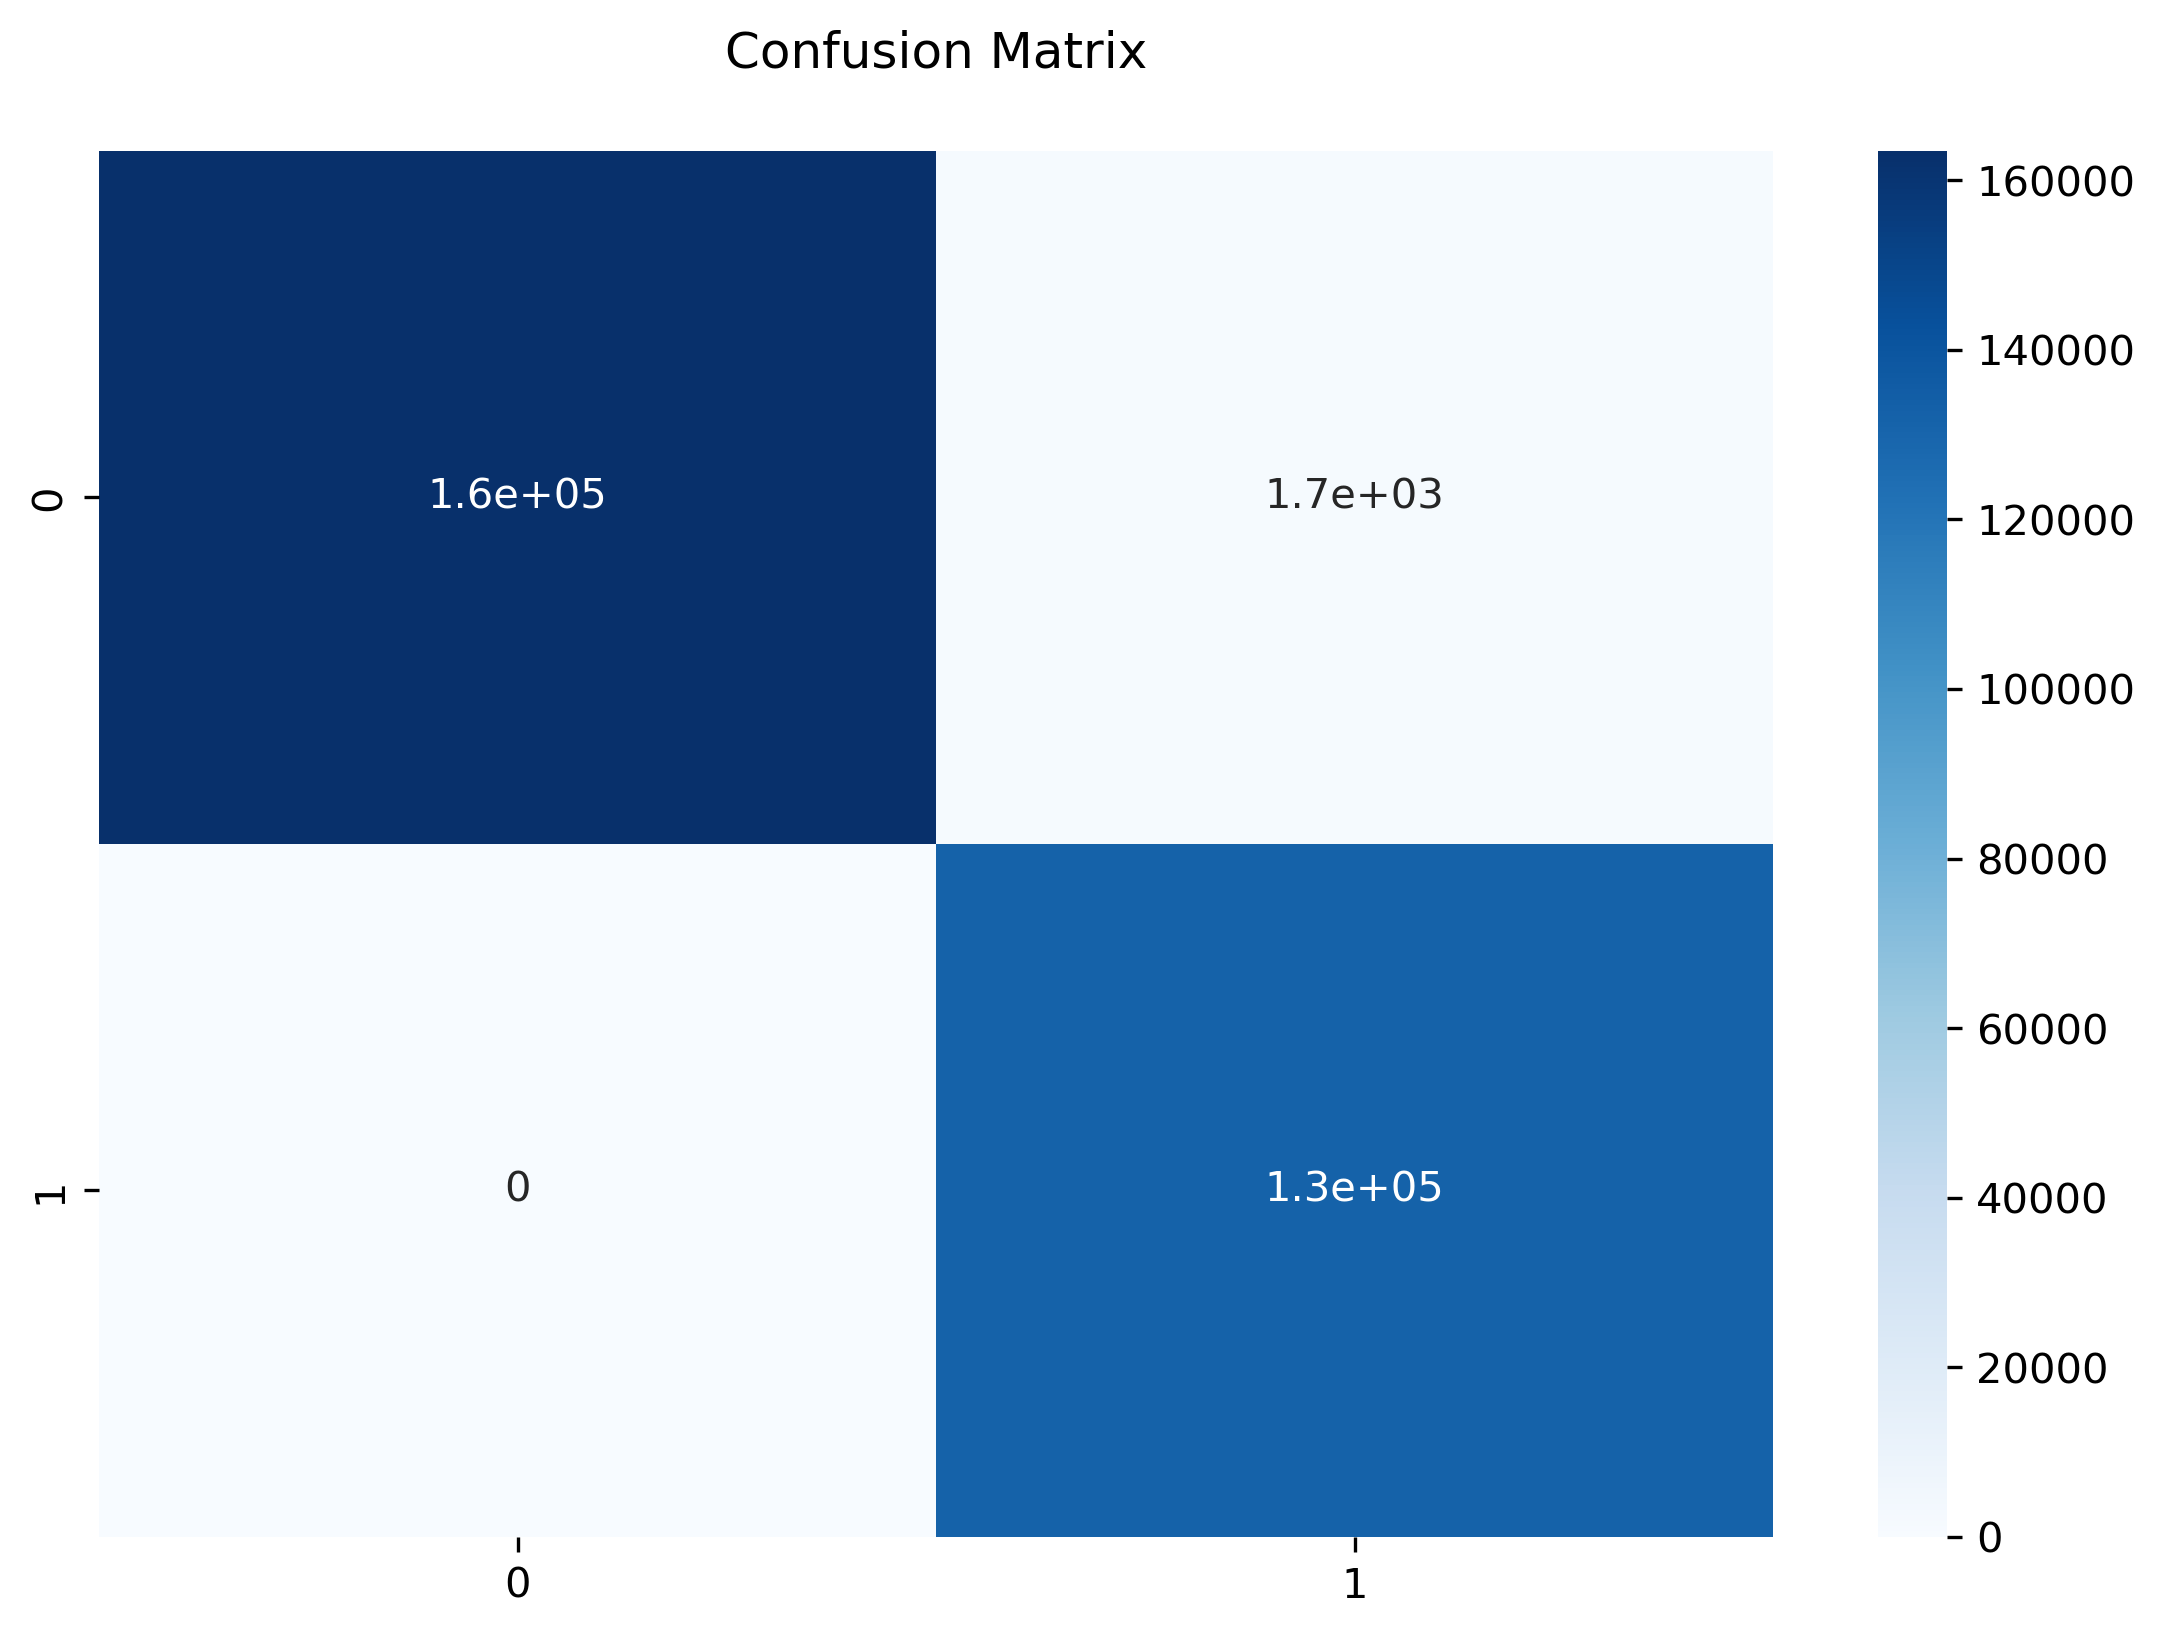

In [66]:
import time
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score


rfc = RandomForestClassifier()
rfc.fit(X_train.values, y_train.values)
y_pred12 = rfc.predict(X_test.values)
acc_rfc = rfc.score(X_test,y_test)*100
acc_rfc

from sklearn.metrics import confusion_matrix
#predictions = rfc.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred12.reshape(-1)))

from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred12.reshape(-1), target_names=['0.0', '1.0']))
print("===============================================================")

# print the scores on training and test set
print('RF Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred12)))
#print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))
#print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred12)))
print('Precision Score : ' + str(precision_score(y_test,y_pred12)))
print('Recall Score : ' + str(recall_score(y_test,y_pred12)))
print('F1 Score : ' + str(f1_score(y_test,y_pred12)))
print('LOGLOSS Value is',log_loss(y_test, y_pred12))

print('AUC-ROC:',roc_auc_score(y_test, y_pred12))                       

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    rfc, X_test.values, y_test.values, name="Random Forest"
)
_ = display.ax_.set_title(" Precision-Recall curve")
conf_matrix(y_test,y_pred12)

Bagging with KNN

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


[[165140      0]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    131804

    accuracy                           1.00    296944
   macro avg       1.00      1.00      1.00    296944
weighted avg       1.00      1.00      1.00    296944

BaggingKNN accuracy score: 1.0000
Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
LOGLOSS Value is 9.99200722162641e-16
AUC-ROC: 1.0
1 2
1
Elapsed time: 24175.477486 24174.7815658
Train time: 0.69592 seconds


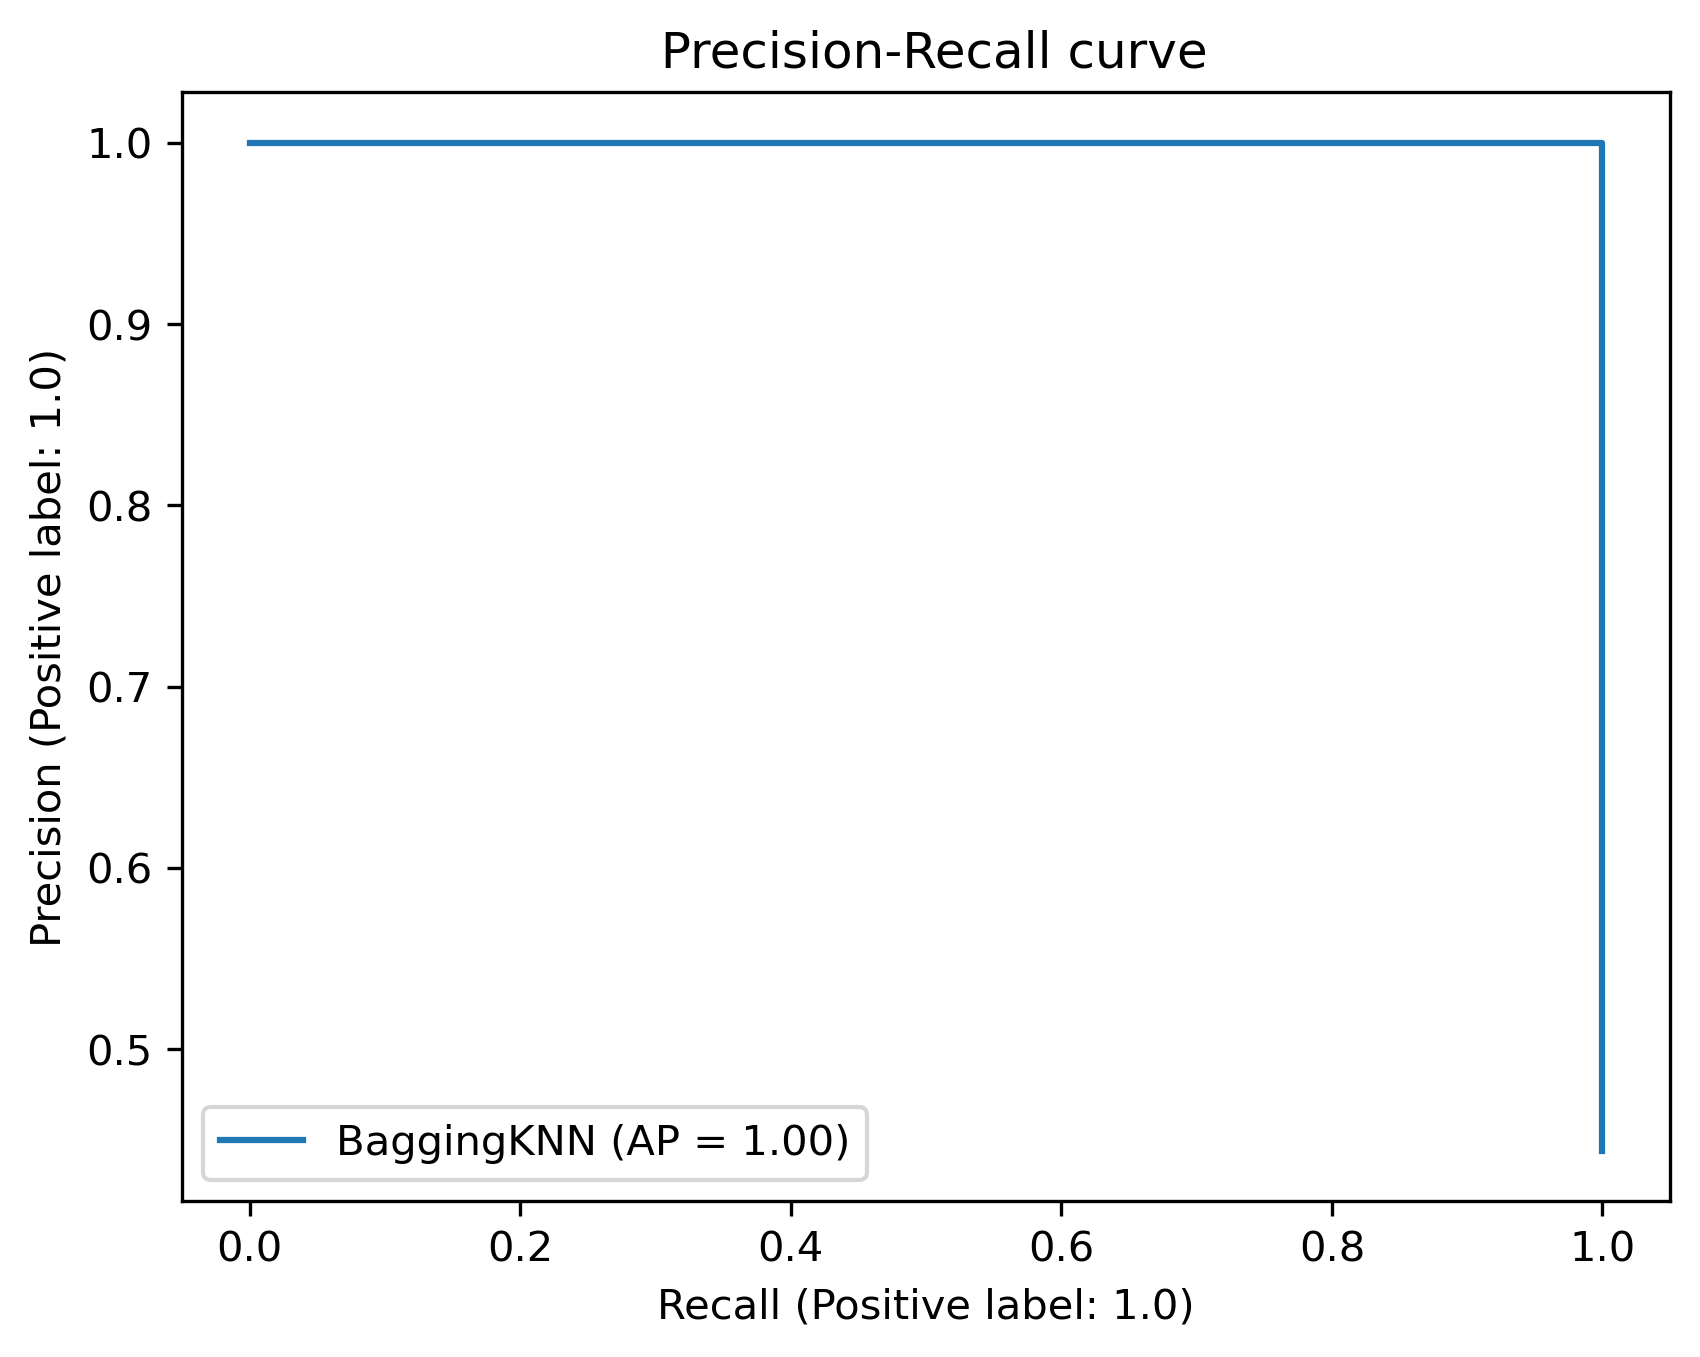

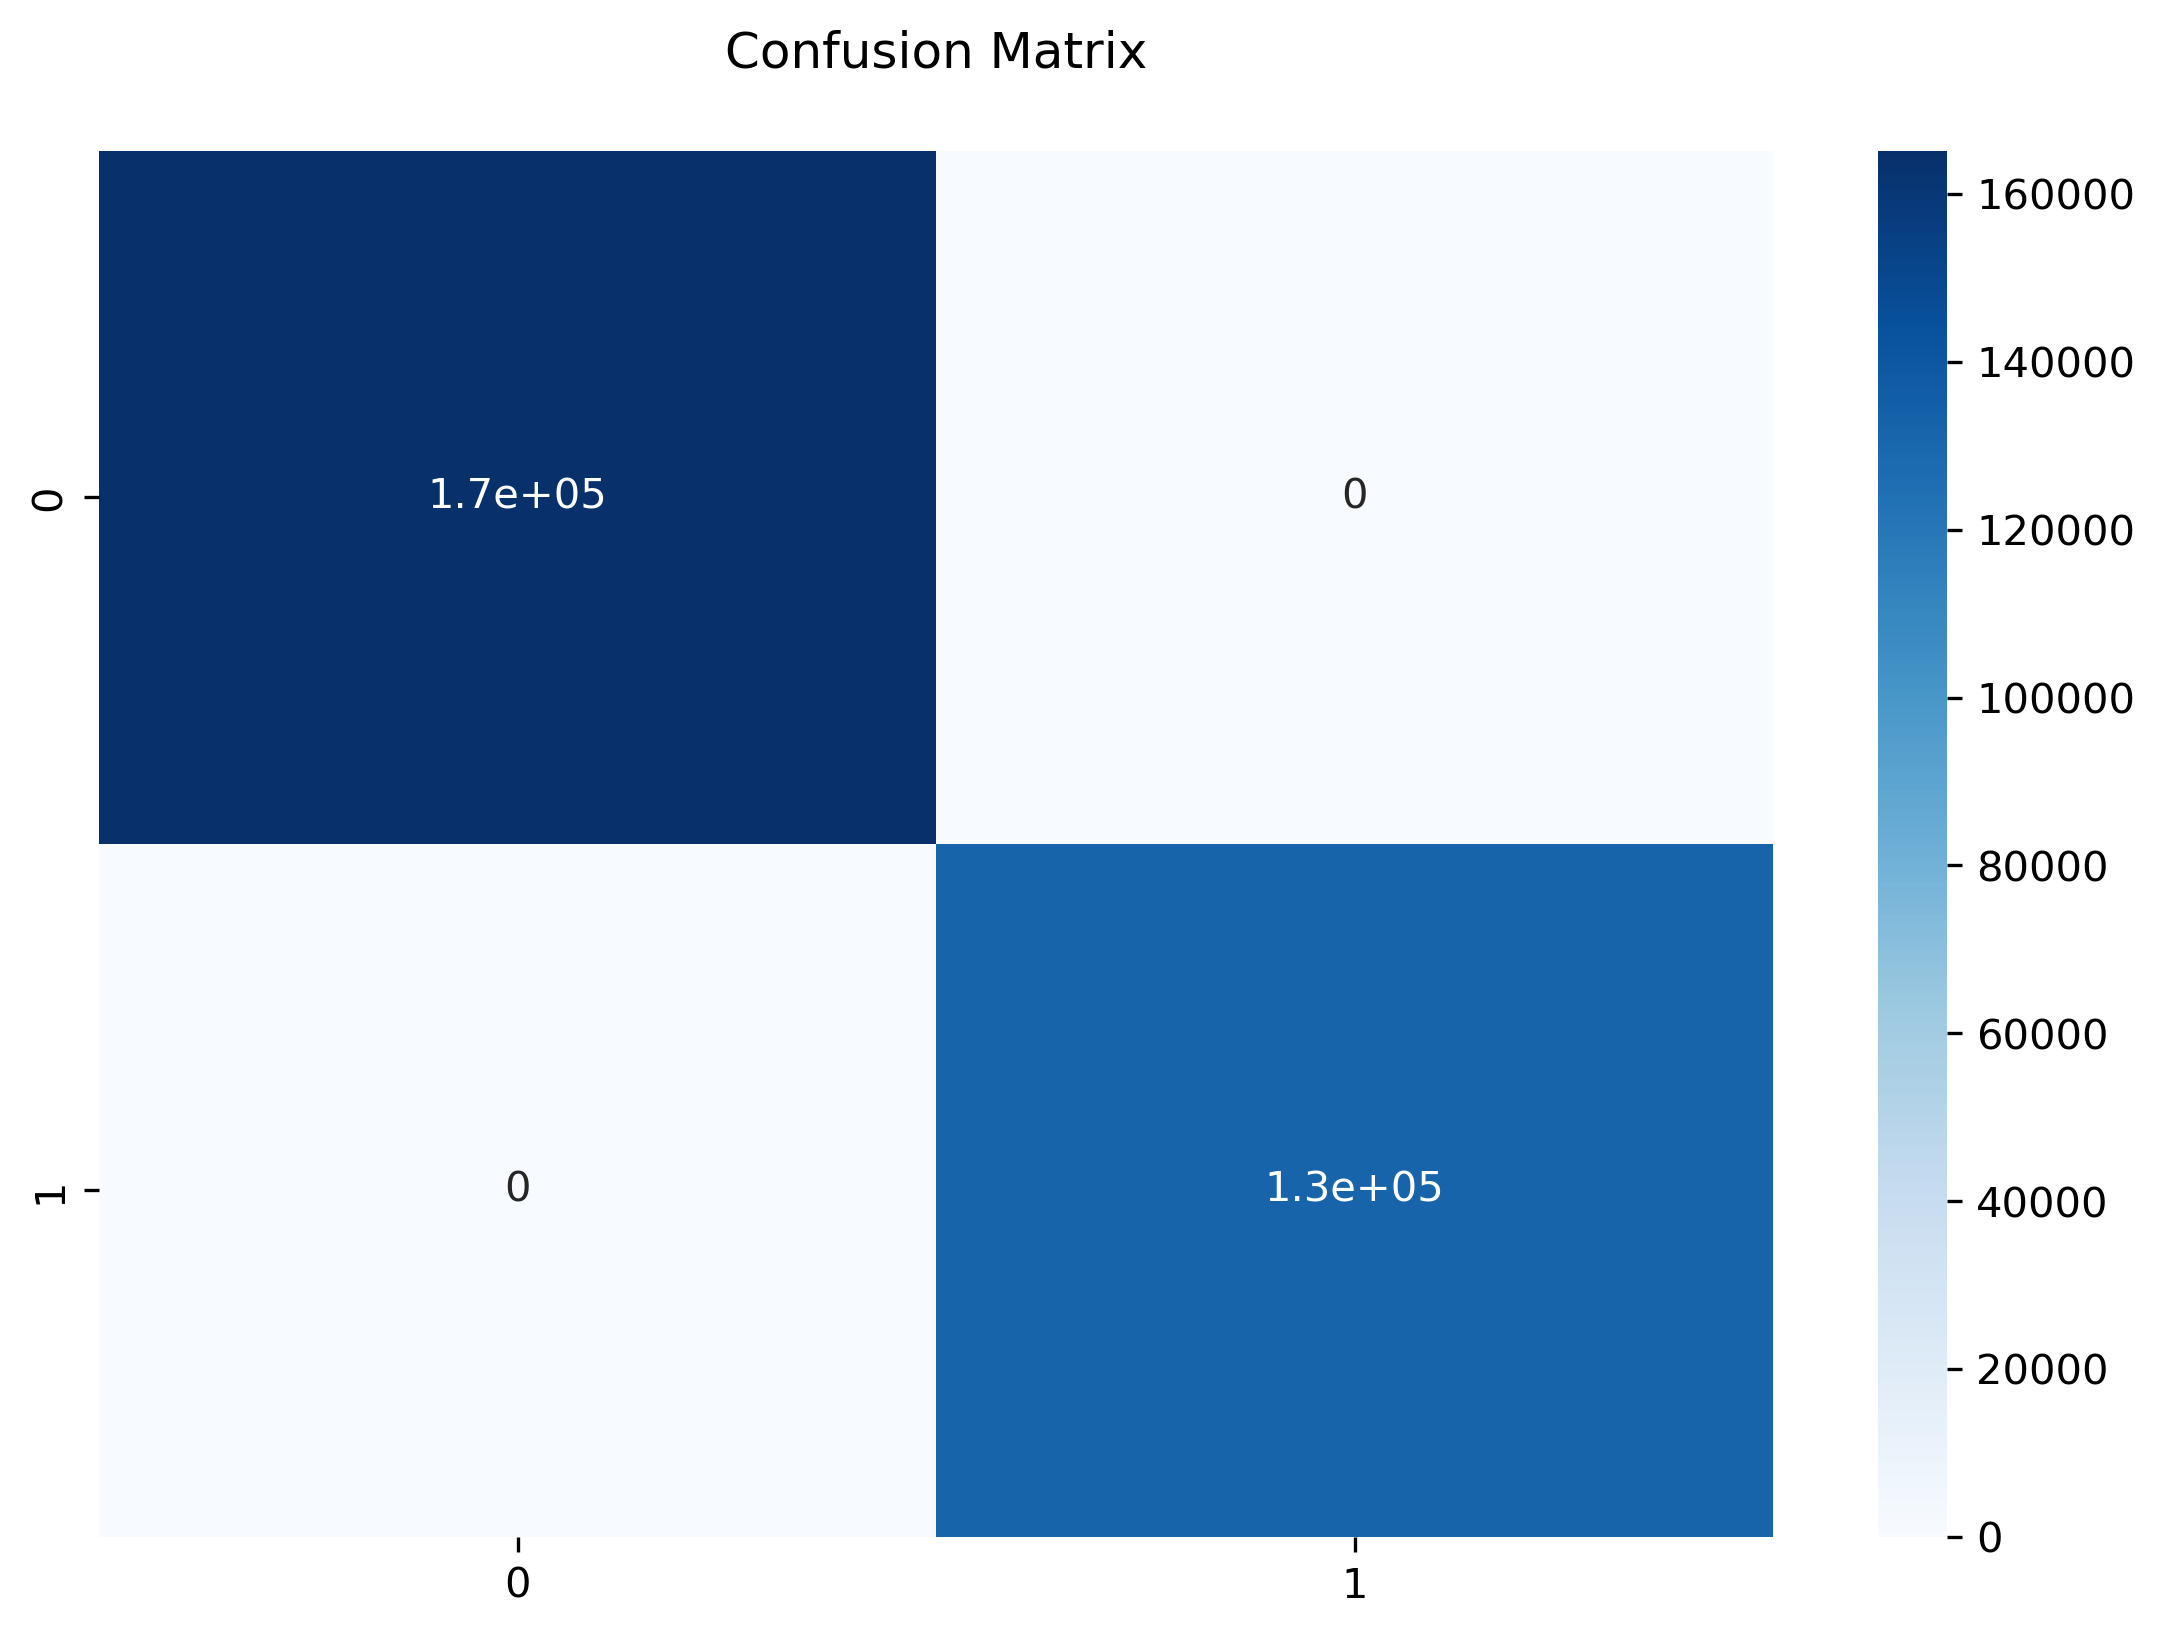

In [67]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

bag_knn = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
bag_knn.fit(X_train.values, y_train.values)
y_pred22 = bag_knn.predict(X_test.values)
acc_bagknn = bag_knn.score(X_test,y_test)*100
acc_bagknn

#predictions = knn.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred22.reshape(-1)))

print(classification_report(y_test.values.reshape(-1), y_pred22.reshape(-1), target_names=['0.0', '1.0']))

# print the scores on training and test set
print('BaggingKNN accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred22)))
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred22)))
print('Precision Score : ' + str(precision_score(y_test,y_pred22)))
print('Recall Score : ' + str(recall_score(y_test,y_pred22)))
print('F1 Score : ' + str(f1_score(y_test,y_pred22)))
print('LOGLOSS Value is',log_loss(y_test, y_pred22))
print('AUC-ROC:',roc_auc_score(y_test, y_pred22))

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()
print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    bag_knn, X_test.values, y_test.values, name="BaggingKNN"
)
_ = display.ax_.set_title(" Precision-Recall curve")
conf_matrix(y_test,y_pred22)

AdaBoost Classifier

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


[[165140      0]
 [     0 131804]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    131804

    accuracy                           1.00    296944
   macro avg       1.00      1.00      1.00    296944
weighted avg       1.00      1.00      1.00    296944

AdaBoost's prediction accuracy is:  100.0
Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
LOGLOSS Value is 9.99200722162641e-16
AUC-ROC: 1.0
1 2
1
Elapsed time: 5058.5949318 5058.035269
Train time: 0.55966 seconds


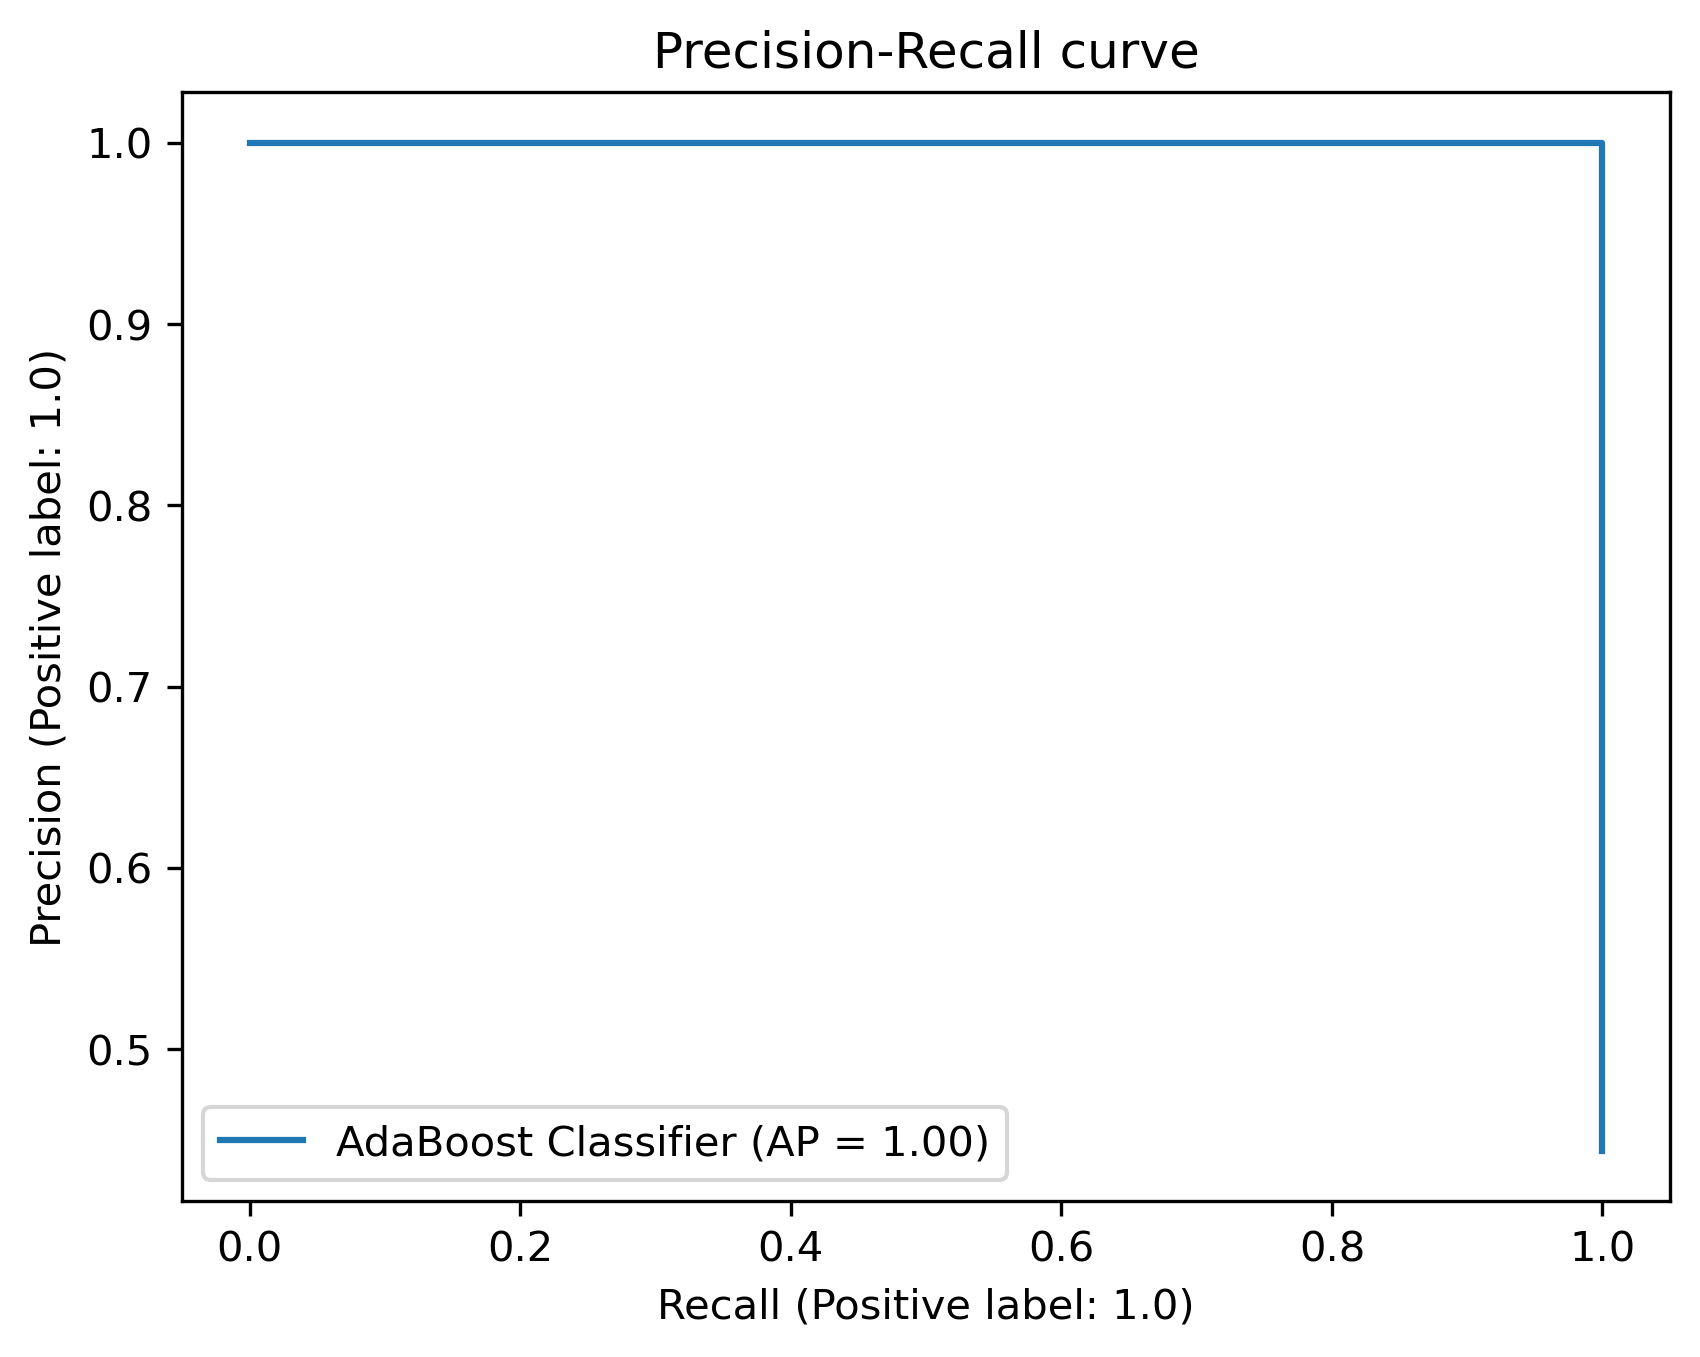

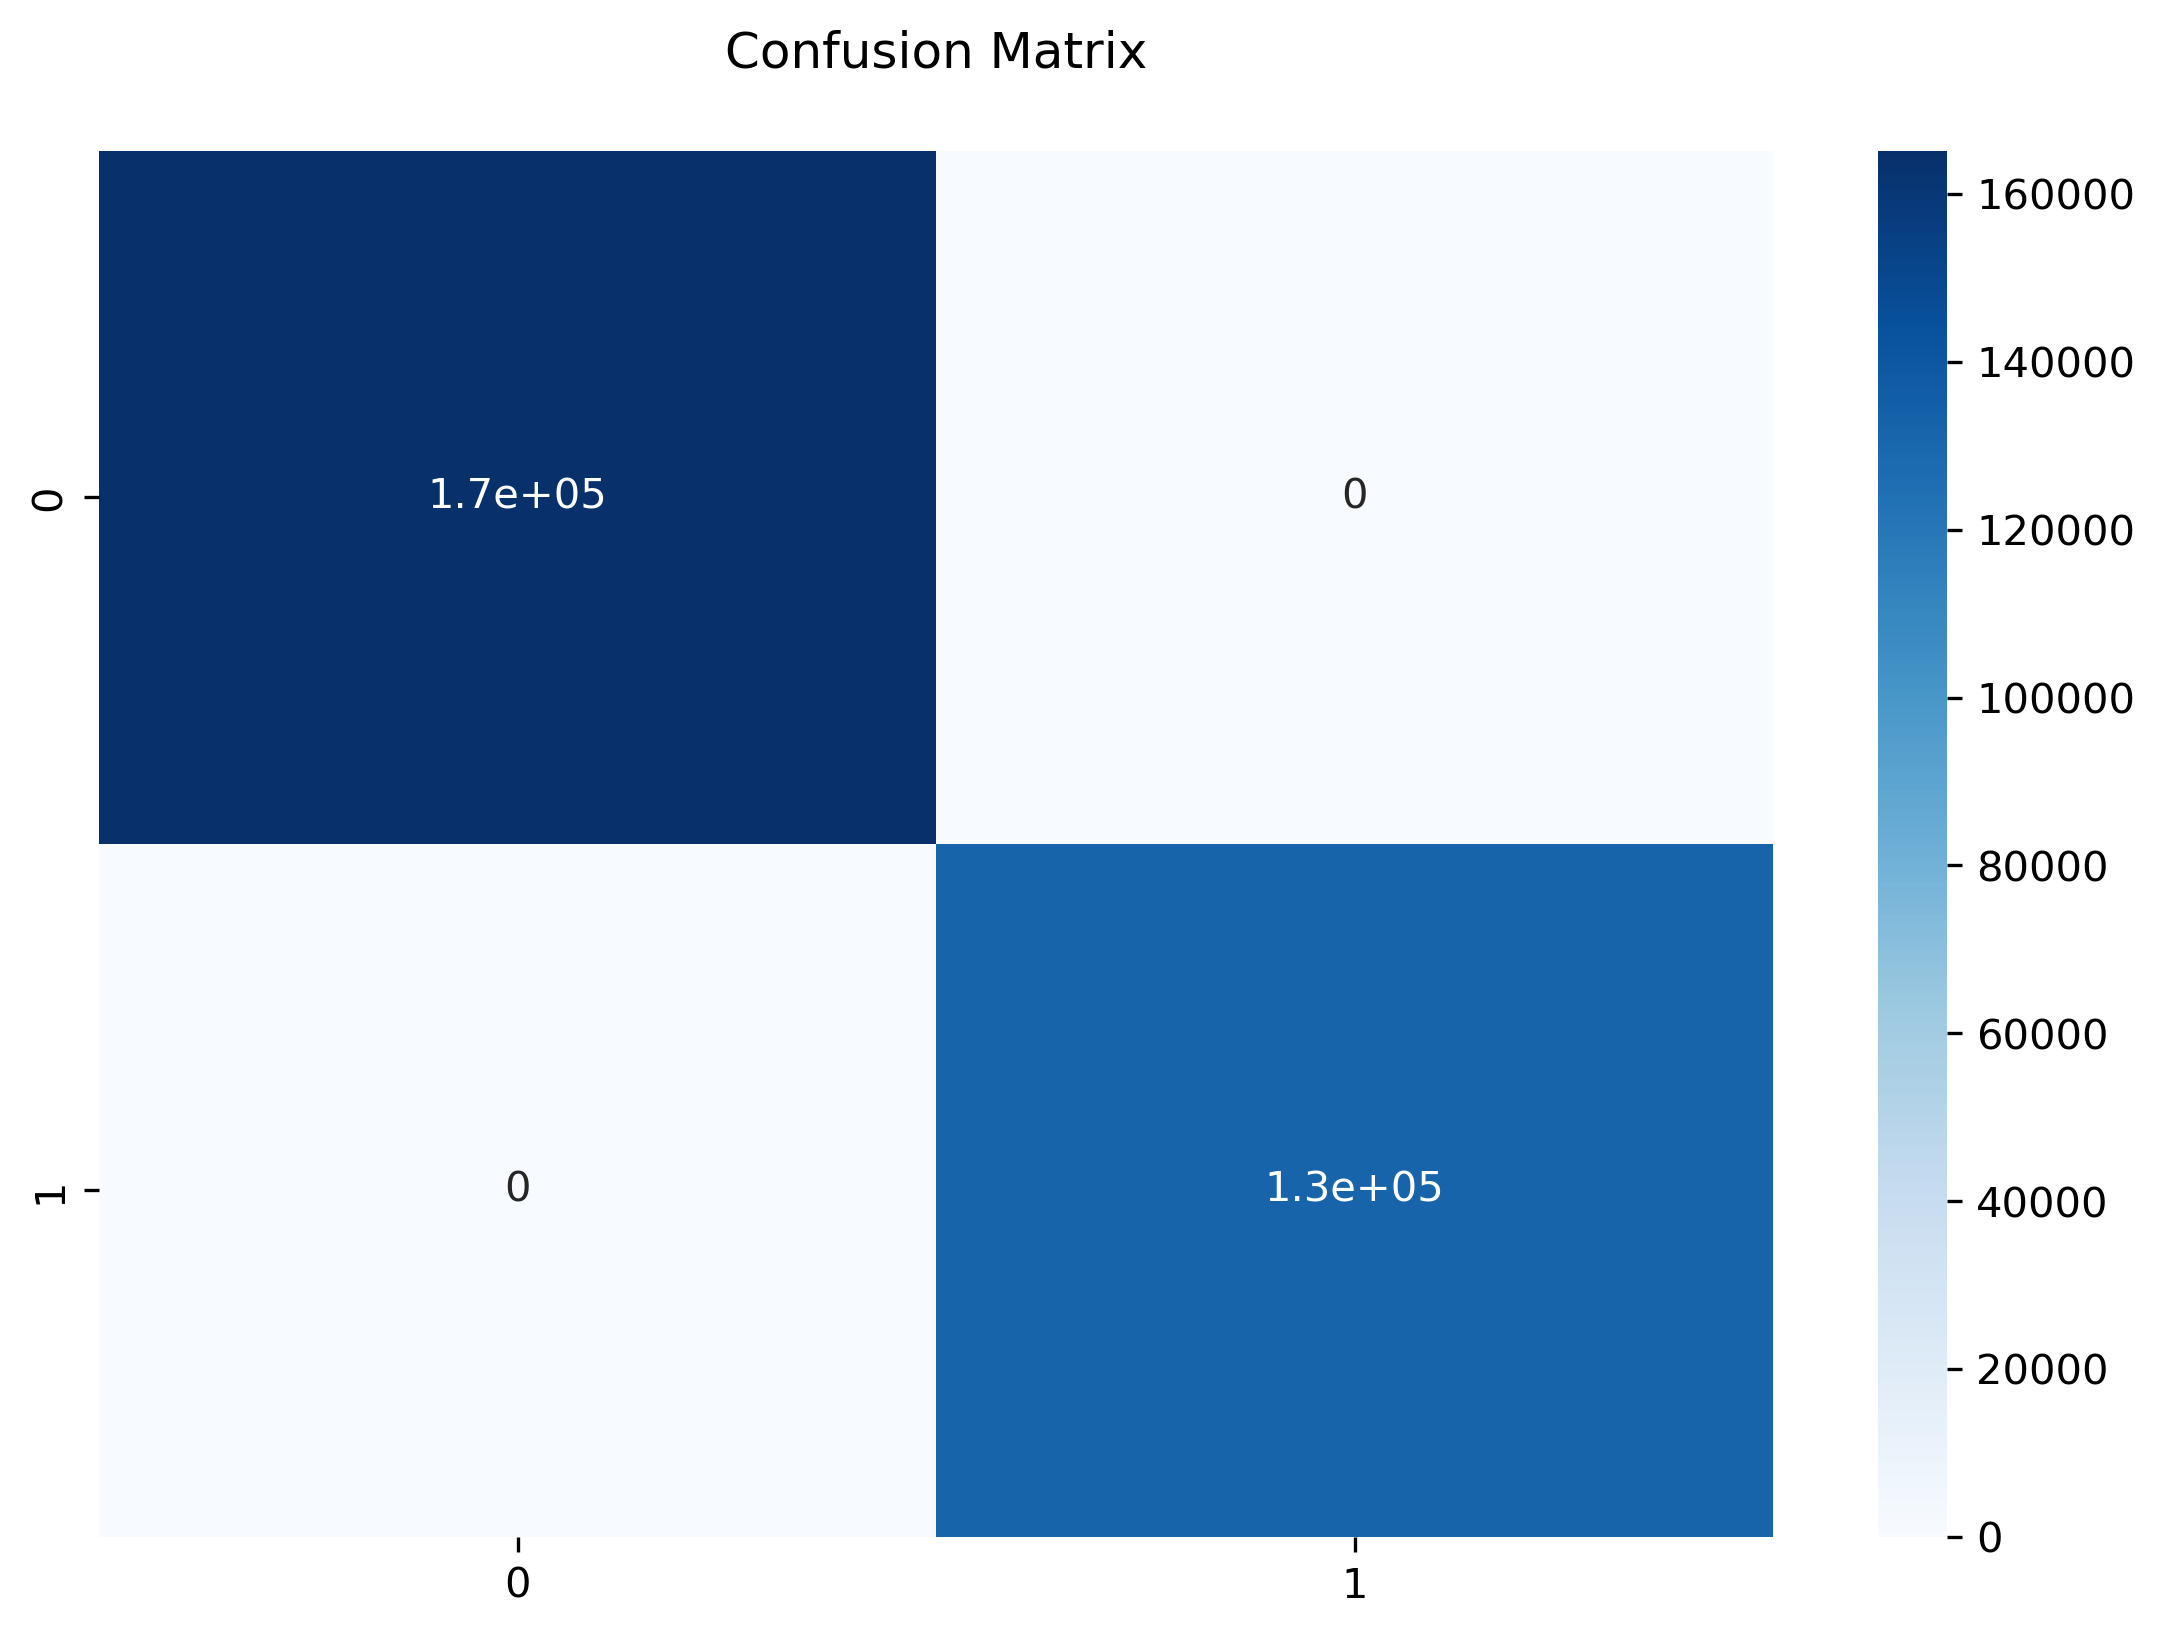

In [56]:
# import time
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

ad_clf = AdaBoostClassifier()
ad_clf.fit(X_train.values, y_train.values)
y_pred = ad_clf.predict(X_test.values)
acc_ad = ad_clf.score(X_test,y_test)*100
acc_ad

#print("===============================================================")
from sklearn.metrics import confusion_matrix
#y_pred = ad_clf.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred.reshape(-1)))
from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred.reshape(-1), target_names=['0.0', '1.0']))


#print('Training set score: {:.4f}'.format(ad_clf.score(X_train.values, y_train.values)))
#print('Test set score: {:.4f}'.format(ad_clf.score(X_test.values, y_test.values)))
print("AdaBoost's prediction accuracy is: ", accuracy_score(y_test.values, y_pred)*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('LOGLOSS Value is',log_loss(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))                       

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    ad_clf, X_test.values, y_test.values, name="AdaBoost Classifier"
)
_ = display.ax_.set_title("Precision-Recall curve")
conf_matrix(y_test,y_pred)

CatBoost Classifier

In [46]:
# importing the required module
from catboost import CatBoostClassifier

# print("Size of testing dataset'X_test.shape
print("Shape of training input data is :",X_train.shape)
print("Shape of testing input data is :",X_test.shape)
# initializing the model
cb = CatBoostClassifier()

# training the model
cb.fit(X_train, y_train)

# predictions
cb_pred = cb.predict(X_test)
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy score
accuracy_score(y_test, cb_pred)


Shape of training input data is : (1187767, 19)
Shape of testing input data is : (296944, 19)
Learning rate set to 0.21176
0:	learn: 0.1365391	total: 400ms	remaining: 6m 39s
1:	learn: 0.0283454	total: 681ms	remaining: 5m 39s
2:	learn: 0.0056543	total: 929ms	remaining: 5m 8s
3:	learn: 0.0014024	total: 1.18s	remaining: 4m 54s
4:	learn: 0.0004799	total: 1.35s	remaining: 4m 29s
5:	learn: 0.0002190	total: 1.51s	remaining: 4m 10s
6:	learn: 0.0001155	total: 1.69s	remaining: 4m
7:	learn: 0.0000674	total: 1.88s	remaining: 3m 53s
8:	learn: 0.0000434	total: 2.1s	remaining: 3m 50s
9:	learn: 0.0000434	total: 2.29s	remaining: 3m 46s
10:	learn: 0.0000434	total: 2.46s	remaining: 3m 41s
11:	learn: 0.0000333	total: 2.68s	remaining: 3m 40s
12:	learn: 0.0000333	total: 2.83s	remaining: 3m 35s
13:	learn: 0.0000293	total: 3.04s	remaining: 3m 33s
14:	learn: 0.0000281	total: 3.2s	remaining: 3m 29s
15:	learn: 0.0000269	total: 3.36s	remaining: 3m 26s
16:	learn: 0.0000269	total: 3.53s	remaining: 3m 24s
17:	learn:

156:	learn: 0.0000241	total: 26.9s	remaining: 2m 24s
157:	learn: 0.0000241	total: 27.1s	remaining: 2m 24s
158:	learn: 0.0000241	total: 27.2s	remaining: 2m 24s
159:	learn: 0.0000241	total: 27.4s	remaining: 2m 23s
160:	learn: 0.0000241	total: 27.5s	remaining: 2m 23s
161:	learn: 0.0000241	total: 27.6s	remaining: 2m 22s
162:	learn: 0.0000241	total: 27.8s	remaining: 2m 22s
163:	learn: 0.0000241	total: 27.9s	remaining: 2m 22s
164:	learn: 0.0000241	total: 28s	remaining: 2m 21s
165:	learn: 0.0000241	total: 28.2s	remaining: 2m 21s
166:	learn: 0.0000241	total: 28.3s	remaining: 2m 21s
167:	learn: 0.0000241	total: 28.4s	remaining: 2m 20s
168:	learn: 0.0000241	total: 28.6s	remaining: 2m 20s
169:	learn: 0.0000241	total: 28.7s	remaining: 2m 20s
170:	learn: 0.0000241	total: 28.8s	remaining: 2m 19s
171:	learn: 0.0000241	total: 28.9s	remaining: 2m 19s
172:	learn: 0.0000241	total: 29.1s	remaining: 2m 19s
173:	learn: 0.0000241	total: 29.2s	remaining: 2m 18s
174:	learn: 0.0000241	total: 29.4s	remaining: 2m

314:	learn: 0.0000241	total: 50.9s	remaining: 1m 50s
315:	learn: 0.0000241	total: 51.1s	remaining: 1m 50s
316:	learn: 0.0000241	total: 51.2s	remaining: 1m 50s
317:	learn: 0.0000241	total: 51.4s	remaining: 1m 50s
318:	learn: 0.0000241	total: 51.5s	remaining: 1m 50s
319:	learn: 0.0000241	total: 51.7s	remaining: 1m 49s
320:	learn: 0.0000241	total: 51.9s	remaining: 1m 49s
321:	learn: 0.0000241	total: 52s	remaining: 1m 49s
322:	learn: 0.0000241	total: 52.2s	remaining: 1m 49s
323:	learn: 0.0000241	total: 52.3s	remaining: 1m 49s
324:	learn: 0.0000241	total: 52.5s	remaining: 1m 49s
325:	learn: 0.0000241	total: 52.7s	remaining: 1m 48s
326:	learn: 0.0000241	total: 52.8s	remaining: 1m 48s
327:	learn: 0.0000241	total: 53s	remaining: 1m 48s
328:	learn: 0.0000241	total: 53.2s	remaining: 1m 48s
329:	learn: 0.0000241	total: 53.3s	remaining: 1m 48s
330:	learn: 0.0000241	total: 53.5s	remaining: 1m 48s
331:	learn: 0.0000241	total: 53.7s	remaining: 1m 47s
332:	learn: 0.0000241	total: 53.8s	remaining: 1m 4

469:	learn: 0.0000241	total: 1m 16s	remaining: 1m 26s
470:	learn: 0.0000241	total: 1m 16s	remaining: 1m 26s
471:	learn: 0.0000241	total: 1m 17s	remaining: 1m 26s
472:	learn: 0.0000241	total: 1m 17s	remaining: 1m 26s
473:	learn: 0.0000241	total: 1m 17s	remaining: 1m 25s
474:	learn: 0.0000241	total: 1m 17s	remaining: 1m 25s
475:	learn: 0.0000241	total: 1m 17s	remaining: 1m 25s
476:	learn: 0.0000241	total: 1m 17s	remaining: 1m 25s
477:	learn: 0.0000241	total: 1m 17s	remaining: 1m 25s
478:	learn: 0.0000241	total: 1m 18s	remaining: 1m 24s
479:	learn: 0.0000241	total: 1m 18s	remaining: 1m 24s
480:	learn: 0.0000241	total: 1m 18s	remaining: 1m 24s
481:	learn: 0.0000241	total: 1m 18s	remaining: 1m 24s
482:	learn: 0.0000241	total: 1m 18s	remaining: 1m 24s
483:	learn: 0.0000241	total: 1m 19s	remaining: 1m 24s
484:	learn: 0.0000241	total: 1m 19s	remaining: 1m 24s
485:	learn: 0.0000241	total: 1m 19s	remaining: 1m 23s
486:	learn: 0.0000241	total: 1m 19s	remaining: 1m 23s
487:	learn: 0.0000241	total:

622:	learn: 0.0000241	total: 1m 40s	remaining: 1m
623:	learn: 0.0000241	total: 1m 40s	remaining: 1m
624:	learn: 0.0000241	total: 1m 41s	remaining: 1m
625:	learn: 0.0000241	total: 1m 41s	remaining: 1m
626:	learn: 0.0000241	total: 1m 41s	remaining: 1m
627:	learn: 0.0000241	total: 1m 41s	remaining: 1m
628:	learn: 0.0000241	total: 1m 41s	remaining: 1m
629:	learn: 0.0000241	total: 1m 41s	remaining: 59.8s
630:	learn: 0.0000241	total: 1m 42s	remaining: 59.7s
631:	learn: 0.0000241	total: 1m 42s	remaining: 59.5s
632:	learn: 0.0000241	total: 1m 42s	remaining: 59.4s
633:	learn: 0.0000241	total: 1m 42s	remaining: 59.2s
634:	learn: 0.0000241	total: 1m 42s	remaining: 59s
635:	learn: 0.0000241	total: 1m 42s	remaining: 58.9s
636:	learn: 0.0000241	total: 1m 42s	remaining: 58.7s
637:	learn: 0.0000241	total: 1m 43s	remaining: 58.5s
638:	learn: 0.0000241	total: 1m 43s	remaining: 58.3s
639:	learn: 0.0000241	total: 1m 43s	remaining: 58.1s
640:	learn: 0.0000241	total: 1m 43s	remaining: 58s
641:	learn: 0.0000

780:	learn: 0.0000241	total: 2m 4s	remaining: 34.9s
781:	learn: 0.0000241	total: 2m 4s	remaining: 34.8s
782:	learn: 0.0000241	total: 2m 4s	remaining: 34.6s
783:	learn: 0.0000241	total: 2m 5s	remaining: 34.5s
784:	learn: 0.0000241	total: 2m 5s	remaining: 34.3s
785:	learn: 0.0000241	total: 2m 5s	remaining: 34.1s
786:	learn: 0.0000241	total: 2m 5s	remaining: 34s
787:	learn: 0.0000241	total: 2m 5s	remaining: 33.8s
788:	learn: 0.0000241	total: 2m 5s	remaining: 33.7s
789:	learn: 0.0000241	total: 2m 6s	remaining: 33.5s
790:	learn: 0.0000241	total: 2m 6s	remaining: 33.3s
791:	learn: 0.0000241	total: 2m 6s	remaining: 33.2s
792:	learn: 0.0000241	total: 2m 6s	remaining: 33s
793:	learn: 0.0000241	total: 2m 6s	remaining: 32.9s
794:	learn: 0.0000241	total: 2m 6s	remaining: 32.7s
795:	learn: 0.0000241	total: 2m 6s	remaining: 32.5s
796:	learn: 0.0000241	total: 2m 7s	remaining: 32.4s
797:	learn: 0.0000241	total: 2m 7s	remaining: 32.2s
798:	learn: 0.0000241	total: 2m 7s	remaining: 32.1s
799:	learn: 0.00

936:	learn: 0.0000241	total: 2m 29s	remaining: 10.1s
937:	learn: 0.0000241	total: 2m 30s	remaining: 9.92s
938:	learn: 0.0000241	total: 2m 30s	remaining: 9.76s
939:	learn: 0.0000241	total: 2m 30s	remaining: 9.6s
940:	learn: 0.0000241	total: 2m 30s	remaining: 9.44s
941:	learn: 0.0000241	total: 2m 30s	remaining: 9.28s
942:	learn: 0.0000241	total: 2m 30s	remaining: 9.12s
943:	learn: 0.0000241	total: 2m 31s	remaining: 8.96s
944:	learn: 0.0000241	total: 2m 31s	remaining: 8.8s
945:	learn: 0.0000241	total: 2m 31s	remaining: 8.64s
946:	learn: 0.0000241	total: 2m 31s	remaining: 8.48s
947:	learn: 0.0000241	total: 2m 31s	remaining: 8.32s
948:	learn: 0.0000241	total: 2m 31s	remaining: 8.16s
949:	learn: 0.0000241	total: 2m 32s	remaining: 8.01s
950:	learn: 0.0000241	total: 2m 32s	remaining: 7.85s
951:	learn: 0.0000241	total: 2m 32s	remaining: 7.69s
952:	learn: 0.0000241	total: 2m 32s	remaining: 7.53s
953:	learn: 0.0000241	total: 2m 32s	remaining: 7.37s
954:	learn: 0.0000241	total: 2m 33s	remaining: 7

0.9942783824559512

Confusion Matrix
[[163442   1698]
 [     1 131803]]
Classification Report : 

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    165140
         1.0       0.99      1.00      0.99    131804

    accuracy                           0.99    296944
   macro avg       0.99      0.99      0.99    296944
weighted avg       0.99      0.99      0.99    296944

CatBoost's prediction accuracy is:  99.42783824559513
Precision Score : 0.9872809941498566
Recall Score : 0.9999924129768444
F1 Score : 0.9935960498294417
LOGLOSS Value is 0.1976222412690272
AUC-ROC: 0.9948551140819792
1 2
1
Elapsed time: 1459.4146014 1458.2595788
Train time: 1.15502 seconds


C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


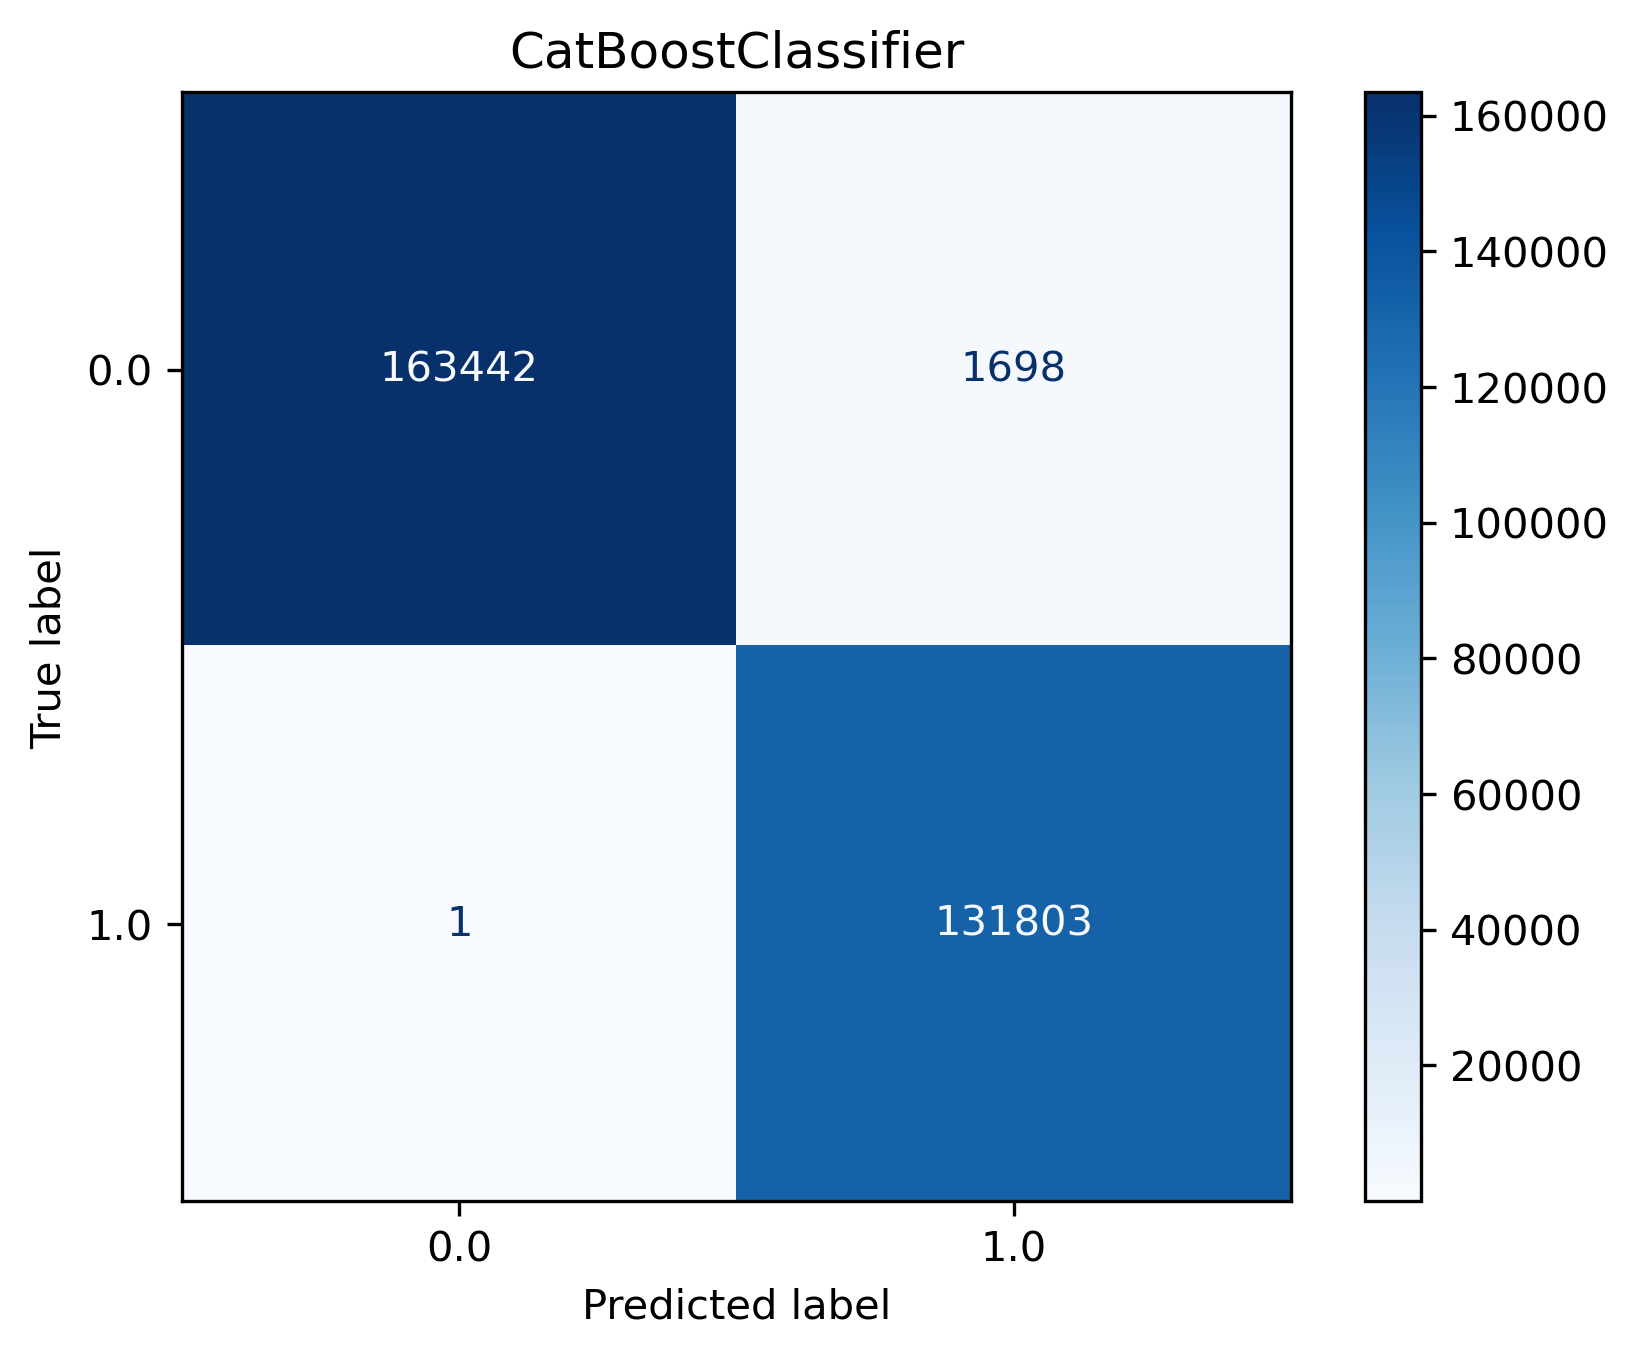

In [48]:
print("Confusion Matrix")
from sklearn.metrics import confusion_matrix
cb_pred = cb.predict(X_test.values)
acc_cat = cb.score(X_test,y_test)*100
acc_cat
print(confusion_matrix(y_test.values.reshape(-1), cb_pred))
# print the scores on training and test set
print(f"Classification Report : \n\n{classification_report(y_test, cb_pred)}")
#print('Training set score: {:.4f}'.format(cb.score(X_train, y_train)))
#print('Test set score: {:.4f}'.format(cb.score(X_test, y_test)))

# printing the accuracy score
print("CatBoost's prediction accuracy is: ", accuracy_score(y_test, cb_pred)*100)
print('Precision Score : ' + str(precision_score(y_test,cb_pred)))
print('Recall Score : ' + str(recall_score(y_test,cb_pred)))
print('F1 Score : ' + str(f1_score(y_test,cb_pred)))
print('LOGLOSS Value is',log_loss(y_test, cb_pred))
print('AUC-ROC:',roc_auc_score(y_test, cb_pred))                       

#Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

confusion_matrix = metrics.plot_confusion_matrix(cb, X_test, y_test, cmap = "Blues")
plt.title("CatBoostClassifier")
print(confusion_matrix)

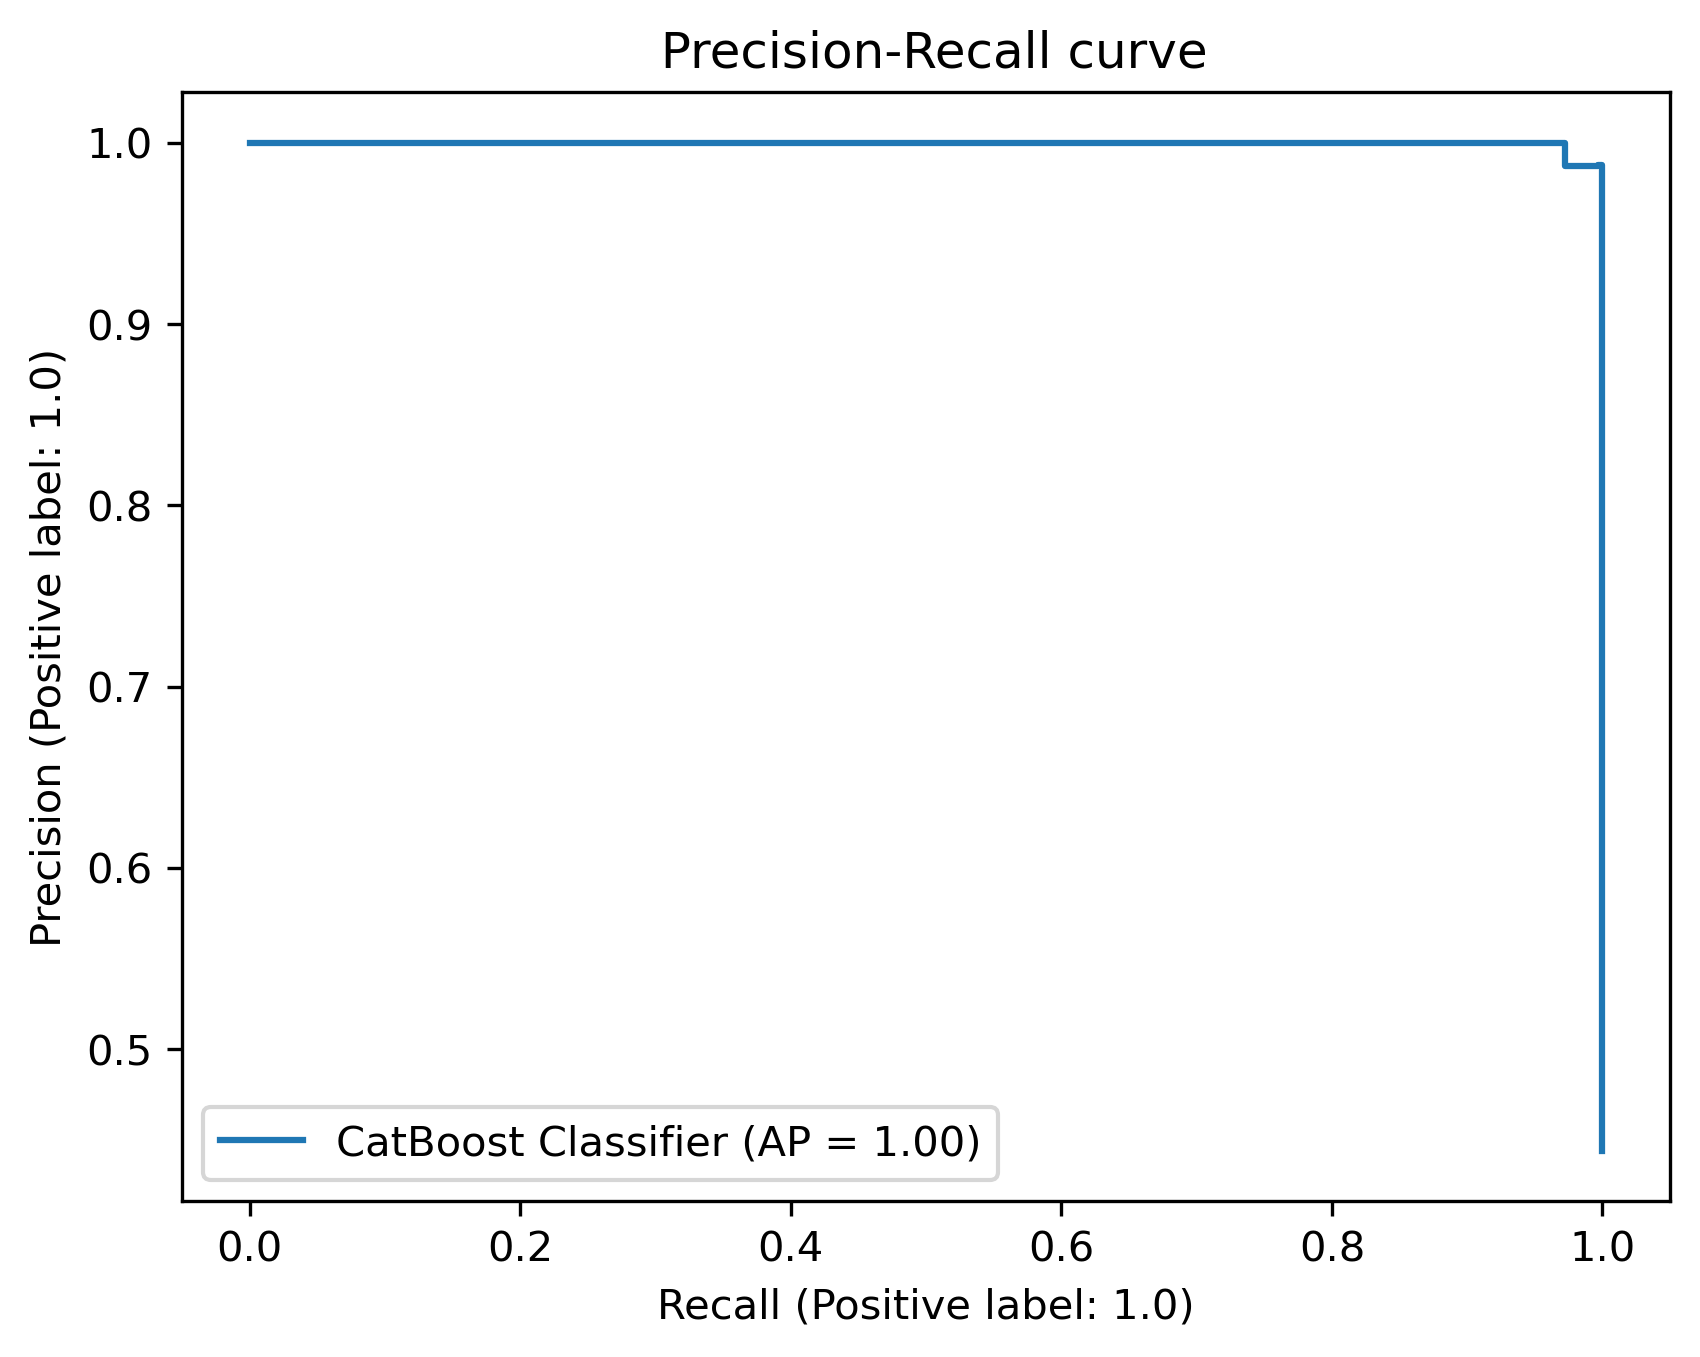

In [70]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    cb, X_test, y_test, name="CatBoost Classifier"
)
_ = display.ax_.set_title(" Precision-Recall curve")

AdaBoost with CatBoost

Learning rate set to 0.21176
0:	learn: 0.0996069	total: 234ms	remaining: 3m 54s
1:	learn: 0.0147761	total: 467ms	remaining: 3m 53s
2:	learn: 0.0035112	total: 697ms	remaining: 3m 51s
3:	learn: 0.0009820	total: 922ms	remaining: 3m 49s
4:	learn: 0.0003845	total: 1.12s	remaining: 3m 42s
5:	learn: 0.0001867	total: 1.32s	remaining: 3m 39s
6:	learn: 0.0001033	total: 1.56s	remaining: 3m 41s
7:	learn: 0.0000615	total: 1.72s	remaining: 3m 33s
8:	learn: 0.0000581	total: 1.91s	remaining: 3m 30s
9:	learn: 0.0000442	total: 2.08s	remaining: 3m 25s
10:	learn: 0.0000420	total: 2.23s	remaining: 3m 20s
11:	learn: 0.0000400	total: 2.41s	remaining: 3m 18s
12:	learn: 0.0000379	total: 2.6s	remaining: 3m 17s
13:	learn: 0.0000366	total: 2.78s	remaining: 3m 15s
14:	learn: 0.0000327	total: 2.96s	remaining: 3m 14s
15:	learn: 0.0000327	total: 3.14s	remaining: 3m 13s
16:	learn: 0.0000327	total: 3.33s	remaining: 3m 12s
17:	learn: 0.0000327	total: 3.51s	remaining: 3m 11s
18:	learn: 0.0000327	total: 3.71s	remaining: 3

158:	learn: 0.0000327	total: 27s	remaining: 2m 22s
159:	learn: 0.0000327	total: 27.2s	remaining: 2m 22s
160:	learn: 0.0000327	total: 27.3s	remaining: 2m 22s
161:	learn: 0.0000327	total: 27.5s	remaining: 2m 22s
162:	learn: 0.0000327	total: 27.7s	remaining: 2m 22s
163:	learn: 0.0000327	total: 27.9s	remaining: 2m 22s
164:	learn: 0.0000327	total: 28.1s	remaining: 2m 21s
165:	learn: 0.0000327	total: 28.2s	remaining: 2m 21s
166:	learn: 0.0000327	total: 28.4s	remaining: 2m 21s
167:	learn: 0.0000327	total: 28.6s	remaining: 2m 21s
168:	learn: 0.0000327	total: 28.7s	remaining: 2m 21s
169:	learn: 0.0000327	total: 28.9s	remaining: 2m 21s
170:	learn: 0.0000327	total: 29.1s	remaining: 2m 21s
171:	learn: 0.0000327	total: 29.3s	remaining: 2m 20s
172:	learn: 0.0000327	total: 29.4s	remaining: 2m 20s
173:	learn: 0.0000327	total: 29.6s	remaining: 2m 20s
174:	learn: 0.0000327	total: 29.7s	remaining: 2m 20s
175:	learn: 0.0000327	total: 29.9s	remaining: 2m 20s
176:	learn: 0.0000327	total: 30.1s	remaining: 2m

316:	learn: 0.0000327	total: 54.2s	remaining: 1m 56s
317:	learn: 0.0000327	total: 54.4s	remaining: 1m 56s
318:	learn: 0.0000327	total: 54.6s	remaining: 1m 56s
319:	learn: 0.0000327	total: 54.7s	remaining: 1m 56s
320:	learn: 0.0000327	total: 54.9s	remaining: 1m 56s
321:	learn: 0.0000327	total: 55.1s	remaining: 1m 56s
322:	learn: 0.0000327	total: 55.3s	remaining: 1m 55s
323:	learn: 0.0000327	total: 55.5s	remaining: 1m 55s
324:	learn: 0.0000327	total: 55.6s	remaining: 1m 55s
325:	learn: 0.0000327	total: 55.8s	remaining: 1m 55s
326:	learn: 0.0000327	total: 56s	remaining: 1m 55s
327:	learn: 0.0000327	total: 56.2s	remaining: 1m 55s
328:	learn: 0.0000327	total: 56.3s	remaining: 1m 54s
329:	learn: 0.0000327	total: 56.5s	remaining: 1m 54s
330:	learn: 0.0000327	total: 56.6s	remaining: 1m 54s
331:	learn: 0.0000327	total: 56.8s	remaining: 1m 54s
332:	learn: 0.0000327	total: 57s	remaining: 1m 54s
333:	learn: 0.0000327	total: 57.2s	remaining: 1m 54s
334:	learn: 0.0000327	total: 57.4s	remaining: 1m 5

471:	learn: 0.0000327	total: 1m 21s	remaining: 1m 30s
472:	learn: 0.0000327	total: 1m 21s	remaining: 1m 30s
473:	learn: 0.0000327	total: 1m 21s	remaining: 1m 30s
474:	learn: 0.0000327	total: 1m 21s	remaining: 1m 30s
475:	learn: 0.0000327	total: 1m 21s	remaining: 1m 30s
476:	learn: 0.0000327	total: 1m 22s	remaining: 1m 29s
477:	learn: 0.0000327	total: 1m 22s	remaining: 1m 29s
478:	learn: 0.0000327	total: 1m 22s	remaining: 1m 29s
479:	learn: 0.0000327	total: 1m 22s	remaining: 1m 29s
480:	learn: 0.0000327	total: 1m 22s	remaining: 1m 29s
481:	learn: 0.0000327	total: 1m 22s	remaining: 1m 29s
482:	learn: 0.0000327	total: 1m 23s	remaining: 1m 28s
483:	learn: 0.0000327	total: 1m 23s	remaining: 1m 28s
484:	learn: 0.0000327	total: 1m 23s	remaining: 1m 28s
485:	learn: 0.0000327	total: 1m 23s	remaining: 1m 28s
486:	learn: 0.0000327	total: 1m 23s	remaining: 1m 28s
487:	learn: 0.0000327	total: 1m 23s	remaining: 1m 28s
488:	learn: 0.0000327	total: 1m 24s	remaining: 1m 27s
489:	learn: 0.0000327	total:

624:	learn: 0.0000327	total: 1m 47s	remaining: 1m 4s
625:	learn: 0.0000327	total: 1m 47s	remaining: 1m 4s
626:	learn: 0.0000327	total: 1m 47s	remaining: 1m 4s
627:	learn: 0.0000327	total: 1m 47s	remaining: 1m 3s
628:	learn: 0.0000327	total: 1m 47s	remaining: 1m 3s
629:	learn: 0.0000327	total: 1m 48s	remaining: 1m 3s
630:	learn: 0.0000327	total: 1m 48s	remaining: 1m 3s
631:	learn: 0.0000327	total: 1m 48s	remaining: 1m 3s
632:	learn: 0.0000327	total: 1m 48s	remaining: 1m 3s
633:	learn: 0.0000327	total: 1m 48s	remaining: 1m 2s
634:	learn: 0.0000327	total: 1m 49s	remaining: 1m 2s
635:	learn: 0.0000327	total: 1m 49s	remaining: 1m 2s
636:	learn: 0.0000327	total: 1m 49s	remaining: 1m 2s
637:	learn: 0.0000327	total: 1m 49s	remaining: 1m 2s
638:	learn: 0.0000327	total: 1m 49s	remaining: 1m 1s
639:	learn: 0.0000327	total: 1m 49s	remaining: 1m 1s
640:	learn: 0.0000327	total: 1m 50s	remaining: 1m 1s
641:	learn: 0.0000327	total: 1m 50s	remaining: 1m 1s
642:	learn: 0.0000327	total: 1m 50s	remaining:

782:	learn: 0.0000327	total: 2m 14s	remaining: 37.2s
783:	learn: 0.0000327	total: 2m 14s	remaining: 37s
784:	learn: 0.0000327	total: 2m 14s	remaining: 36.9s
785:	learn: 0.0000327	total: 2m 14s	remaining: 36.7s
786:	learn: 0.0000327	total: 2m 14s	remaining: 36.5s
787:	learn: 0.0000327	total: 2m 15s	remaining: 36.3s
788:	learn: 0.0000327	total: 2m 15s	remaining: 36.2s
789:	learn: 0.0000327	total: 2m 15s	remaining: 36s
790:	learn: 0.0000327	total: 2m 15s	remaining: 35.8s
791:	learn: 0.0000327	total: 2m 15s	remaining: 35.7s
792:	learn: 0.0000327	total: 2m 15s	remaining: 35.5s
793:	learn: 0.0000327	total: 2m 16s	remaining: 35.3s
794:	learn: 0.0000327	total: 2m 16s	remaining: 35.1s
795:	learn: 0.0000327	total: 2m 16s	remaining: 35s
796:	learn: 0.0000327	total: 2m 16s	remaining: 34.8s
797:	learn: 0.0000327	total: 2m 16s	remaining: 34.6s
798:	learn: 0.0000327	total: 2m 16s	remaining: 34.4s
799:	learn: 0.0000327	total: 2m 17s	remaining: 34.3s
800:	learn: 0.0000327	total: 2m 17s	remaining: 34.1s

938:	learn: 0.0000327	total: 2m 40s	remaining: 10.4s
939:	learn: 0.0000327	total: 2m 40s	remaining: 10.3s
940:	learn: 0.0000327	total: 2m 41s	remaining: 10.1s
941:	learn: 0.0000327	total: 2m 41s	remaining: 9.93s
942:	learn: 0.0000327	total: 2m 41s	remaining: 9.76s
943:	learn: 0.0000327	total: 2m 41s	remaining: 9.59s
944:	learn: 0.0000327	total: 2m 41s	remaining: 9.42s
945:	learn: 0.0000327	total: 2m 41s	remaining: 9.25s
946:	learn: 0.0000327	total: 2m 42s	remaining: 9.07s
947:	learn: 0.0000327	total: 2m 42s	remaining: 8.9s
948:	learn: 0.0000327	total: 2m 42s	remaining: 8.73s
949:	learn: 0.0000327	total: 2m 42s	remaining: 8.56s
950:	learn: 0.0000327	total: 2m 42s	remaining: 8.39s
951:	learn: 0.0000327	total: 2m 43s	remaining: 8.22s
952:	learn: 0.0000327	total: 2m 43s	remaining: 8.05s
953:	learn: 0.0000327	total: 2m 43s	remaining: 7.88s
954:	learn: 0.0000327	total: 2m 43s	remaining: 7.7s
955:	learn: 0.0000327	total: 2m 43s	remaining: 7.53s
956:	learn: 0.0000327	total: 2m 43s	remaining: 7

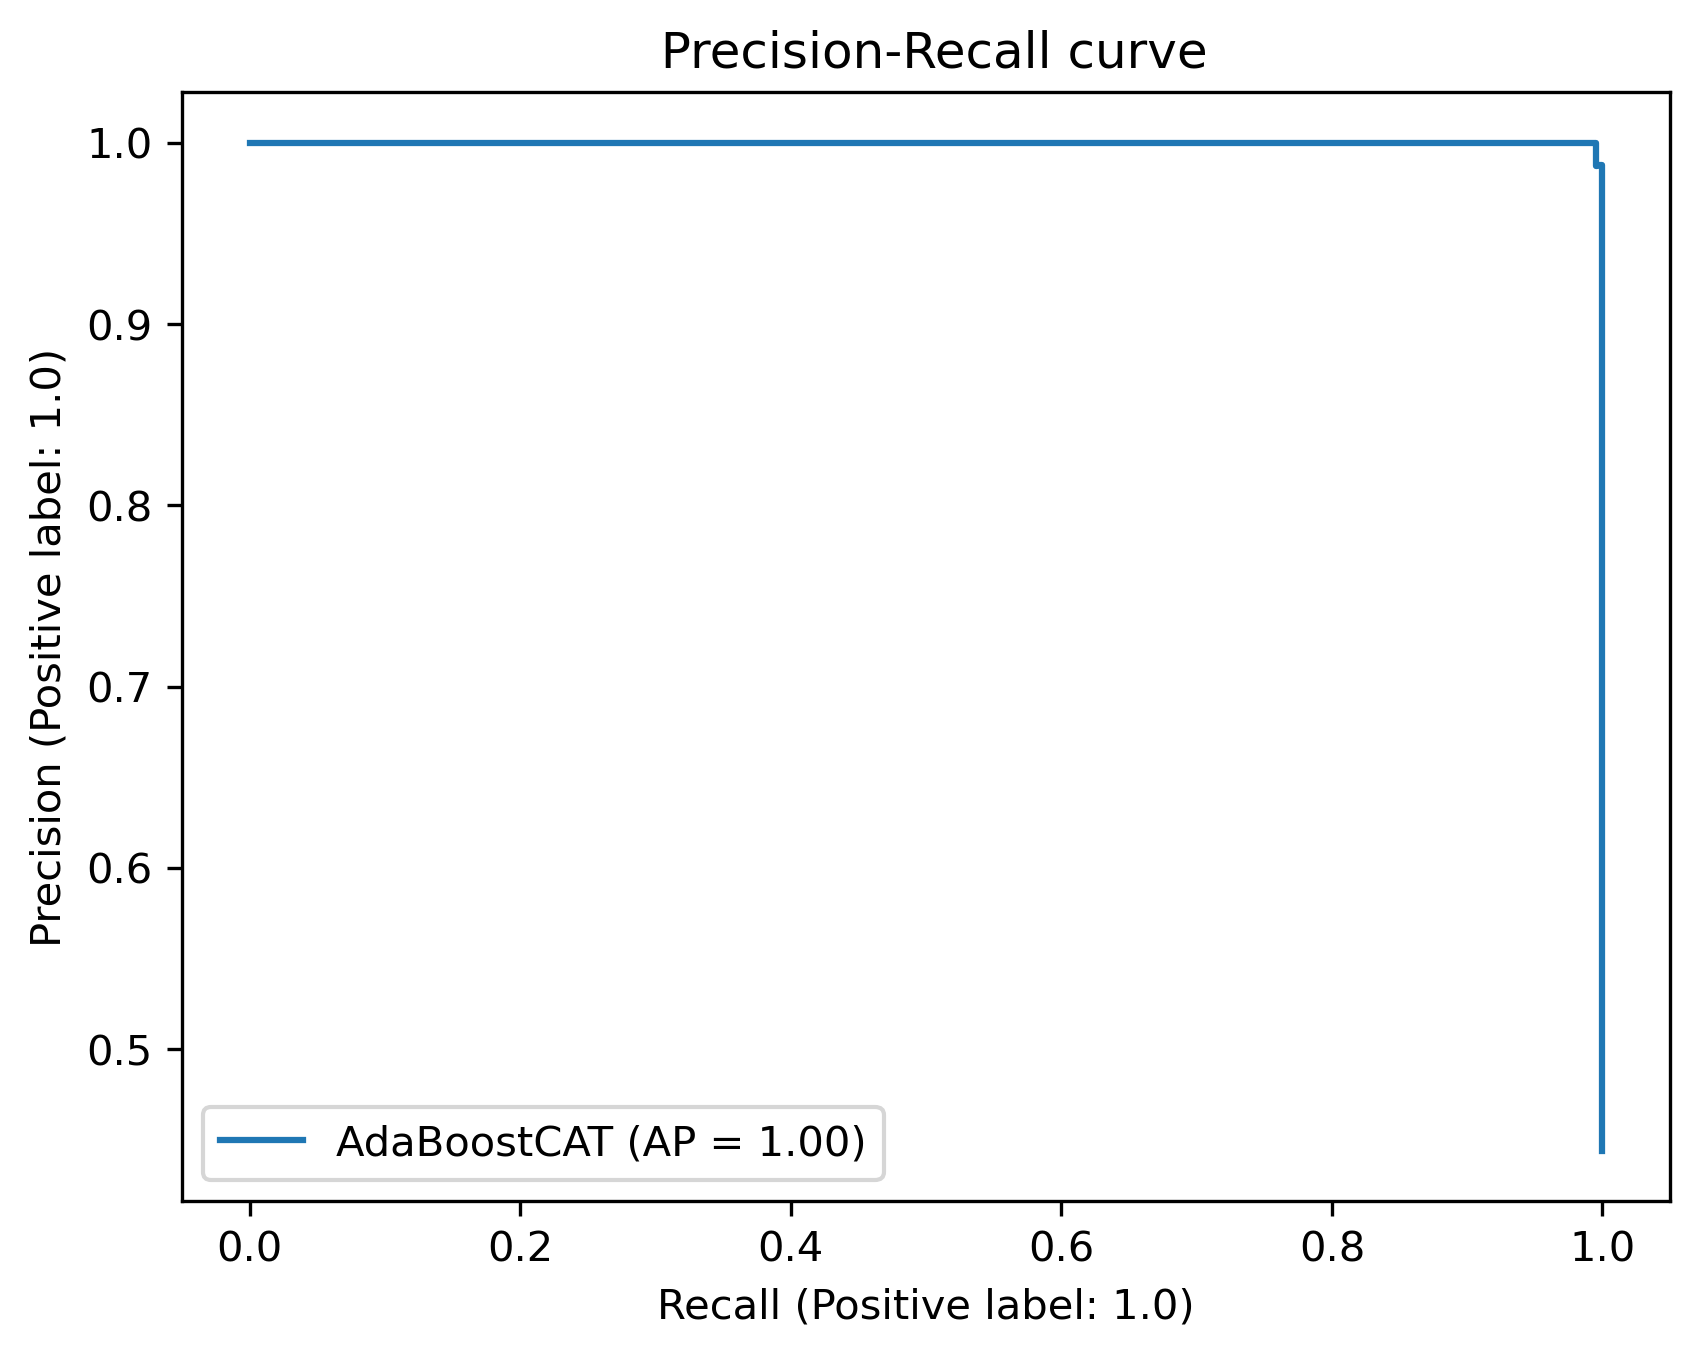

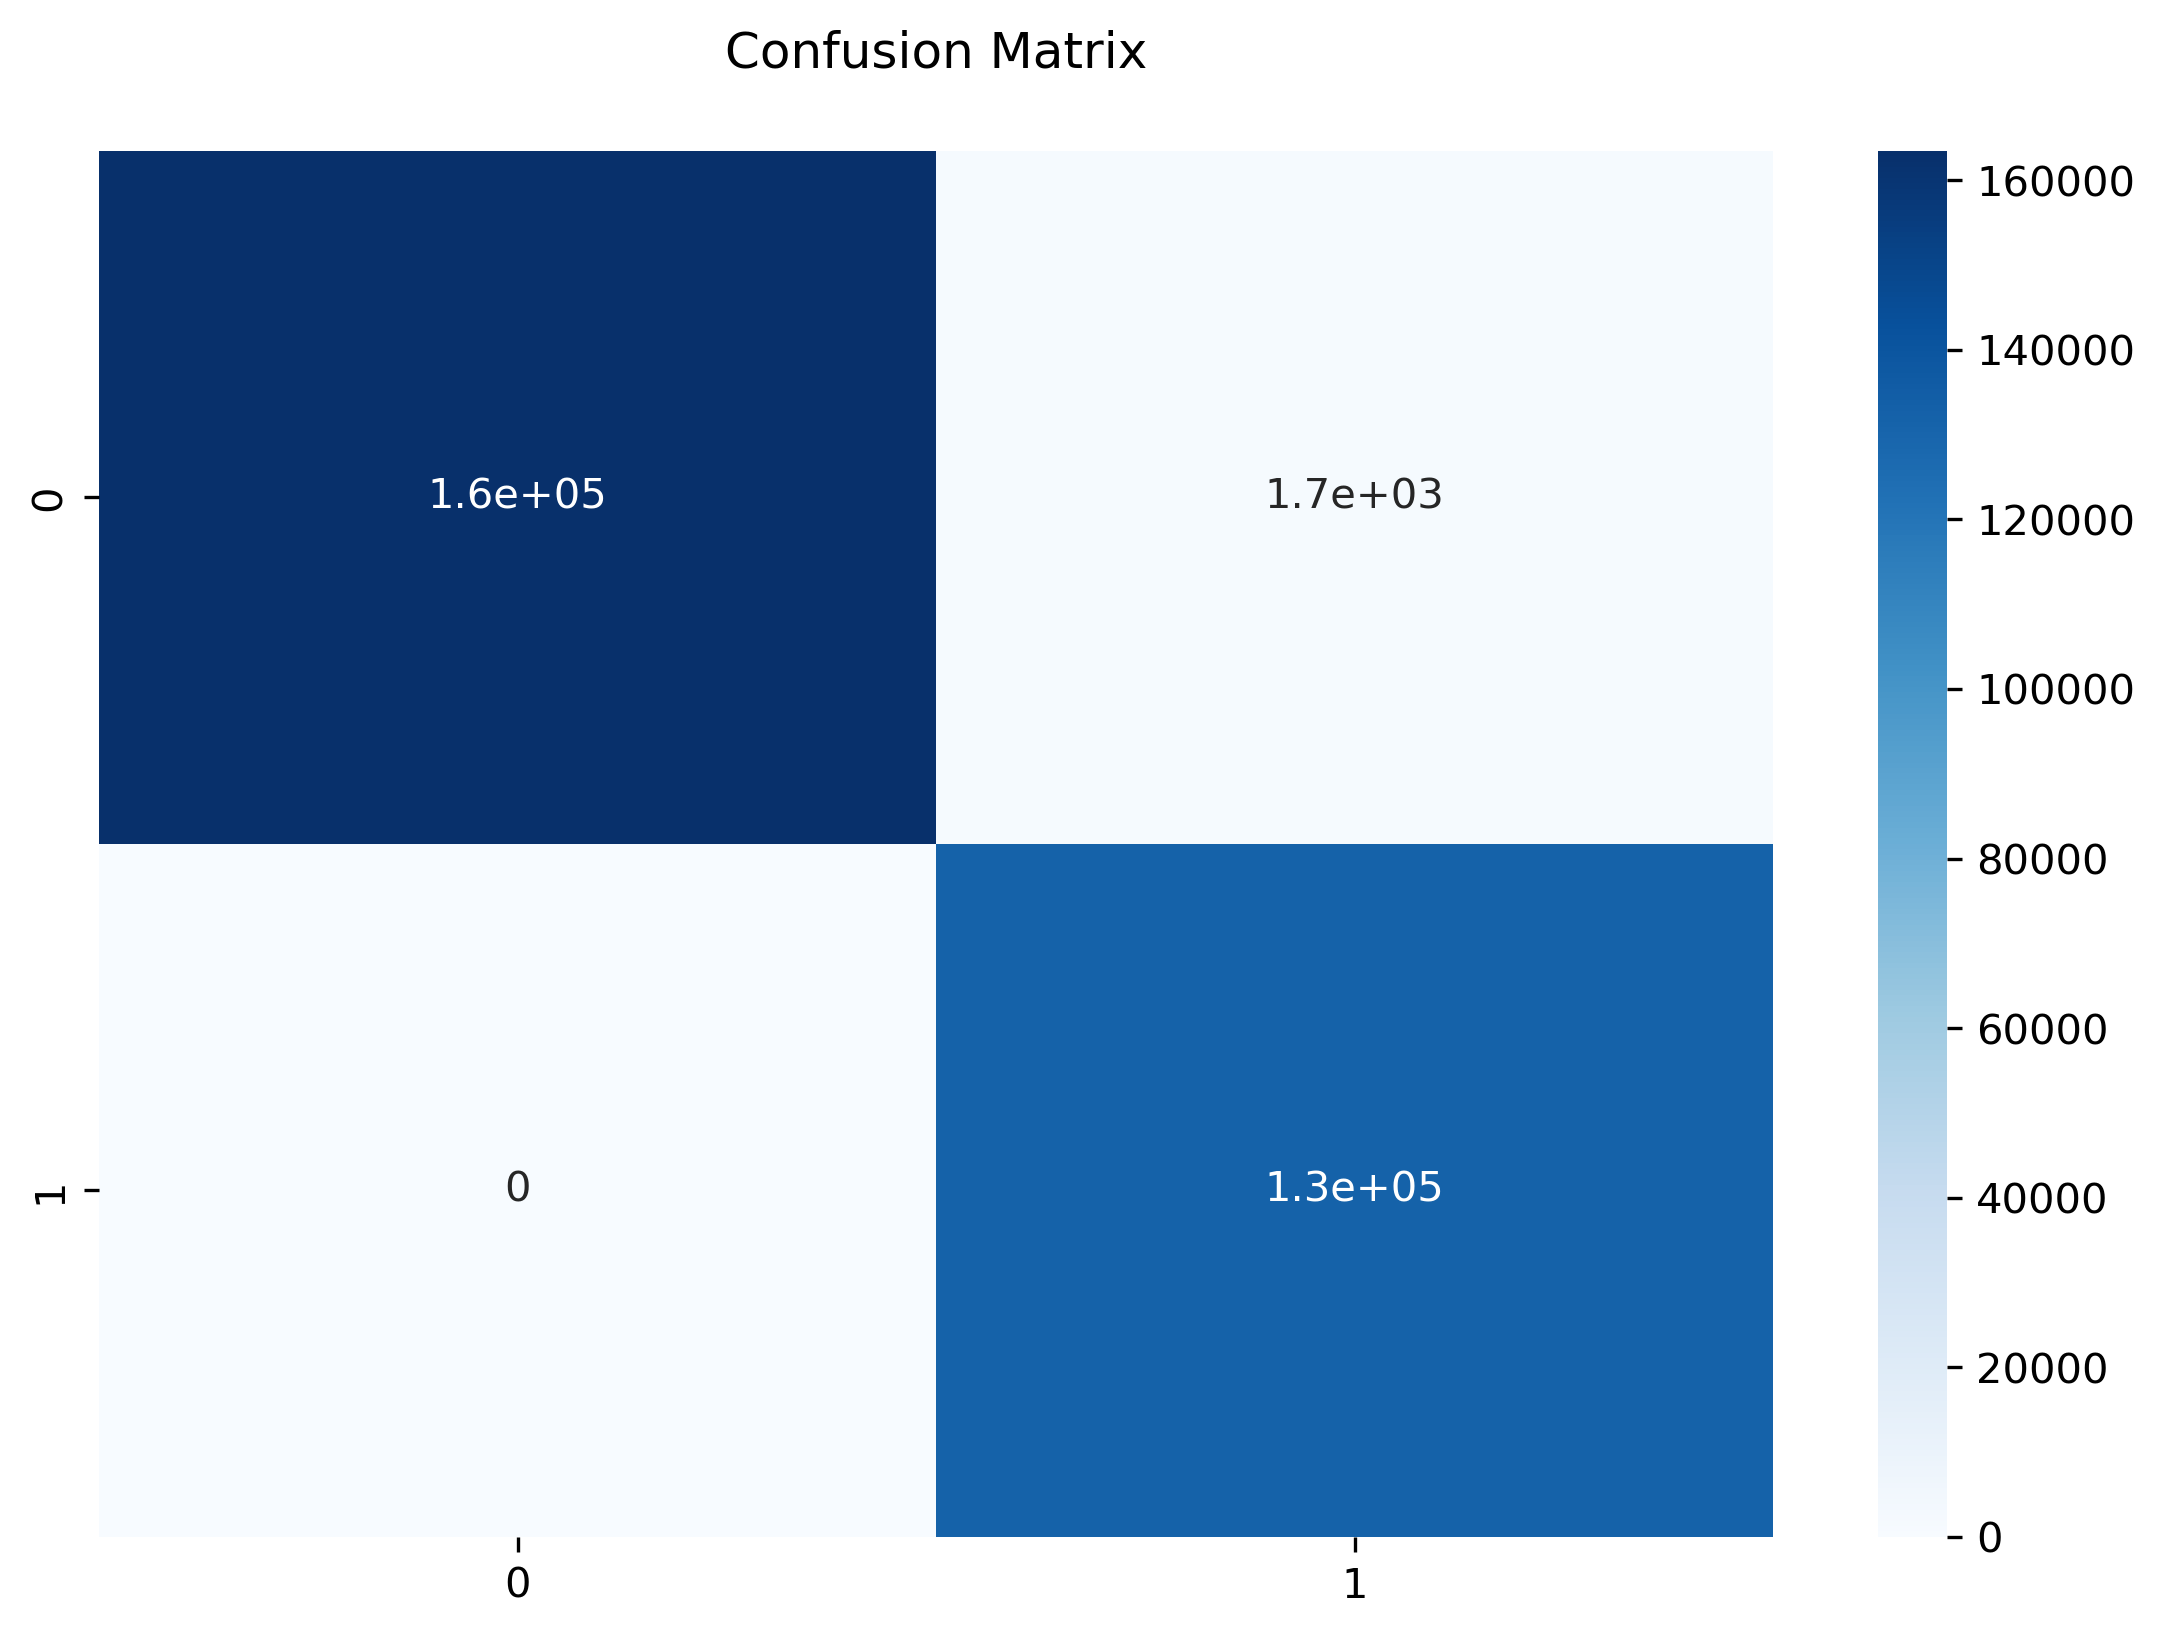

In [71]:
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

abcat = AdaBoostClassifier(base_estimator=CatBoostClassifier(),n_estimators=1000)
abcat.fit(X_train, y_train)
y_pred20 = abcat.predict(X_test)
acc_abcat = abcat.score(X_test,y_test)*100
acc_abcat

print("Predictions:",y_pred20[:10])
print("Actual:",y_test[:10])

get_probabilty_output(X_test=X_test, model_fitted=abcat)

print("Confusion Matrix")
from sklearn.metrics import confusion_matrix
#y_pred20 = abcat.predict(X_test.values)
print(confusion_matrix(y_test.values.reshape(-1), y_pred20))
print("=========================================================================")

from sklearn.metrics import classification_report
print(classification_report(y_test.values.reshape(-1), y_pred20, target_names=['0.0', '1.0']))

# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred20)*100))
print('Precision Score : ' + str(precision_score(y_test,y_pred20)))
print('Recall Score : ' + str(recall_score(y_test,y_pred20)))
print('F1 Score : ' + str(f1_score(y_test,y_pred20)))
print('LOGLOSS Value is',log_loss(y_test, y_pred20))
print('AUC-ROC:',roc_auc_score(y_test, y_pred20))
                       
print("=========================================================================")

# Python program to show time by perf_counter()
from time import perf_counter

# integer input from user, 2 input in single line
n, m = map(int, input().split())

# Start the stopwatch / counter
t1_start = perf_counter()

#HERE YOU DO THE WORK which is either training or predicting
for i in range(n):
    t = int(input()) # user gave input n times
if t % m == 0:
    print(t)

# Stop the stopwatch / counter
t1_stop = perf_counter()

print("Elapsed time:", t1_stop, t1_start)
print("Train time: %6.5f seconds" % (t1_stop-t1_start))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    abcat, X_test, y_test, name="AdaBoostCAT"
)
_ = display.ax_.set_title(" Precision-Recall curve")
conf_matrix(y_test,y_pred20)

In [86]:
objects = ('CatBoost', 'AdaBoostCat', 'BaggingKNN', 'AdaBoostDT', 'AdaBoostLR', 'XGBoost', 'Lgbm', 'Extra-Tree', 'GT', 'BaggingDT', 'AdaBoost', 'RF', 'AdaBoostRF')
x_pos = np.arange(len(objects))
accuracies = [acc_cat, acc_abcat, acc_bagknn, acc_abdt, acc_ablr, acc_xgb, acc_lgb, acc_xt, acc_gb, acc_bagdt, acc_ad, acc_rfc, acc_abrf]
    
plt.bar(x_pos, accuracies, align='center', alpha=0.5, color='r')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Percentage %',labelpad=10)
plt.ylabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()

In [80]:
#ROC AUC

In [88]:
r_probs = [0 for _ in range(len(y_test))]
rfc_probs = rfc.predict_proba(X_test)
gnb_probs = gnb.predict_proba(X_test)
xgb_probs = xgb.predict_proba(X_test)
lgb_probs = lgb_clf.predict_proba(X_test)
xtf_probs = extra_tree_forest.predict_proba(X_test)
gb_probs  = gb_clf.predict_proba(X_test)
#sgd_probs = sgd.predict_proba(X_test)
dt_probs  = dt.predict_proba(X_test)
bag_probs = bag.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
mlp_probs = mlp_clf.predict_proba(X_test)
#pac_probs = pac.predict_proba(X_test)
bnb_probs = bnb.predict_proba(X_test)
svc_probs = svc.predict_proba(X_test)
ada_probs = ad_clf.predict_proba(X_test)
cb_probs  = cb.predict_proba(X_test)
lr_probs  = lr_clf.predict_proba(X_test)

#r_probs = r_probs[:, 1]
rfc_probs = rfc_probs[:, 1]
gnb_probs = gnb_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
lgb_probs = lgb_probs[:, 1]
xtf_probs = xtf_probs[:, 1]
gb_probs  = gb_probs [:, 1]
#sgd_probs = sgd_probs[:, 1]
dt_probs  = dt_probs [:, 1]
bag_probs = bag_probs[:, 1]
knn_probs = knn_probs[:, 1]
mlp_probs = mlp_probs[:, 1]
#pac_probs = pac_probs[:, 1]
bnb_probs = bnb_probs[:, 1]
svc_probs = svc_probs[:, 1]
ada_probs = ada_probs[:, 1]
cb_probs  = cb_probs [:, 1]
lr_probs  = lr_probs [:, 1]



C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(
C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but 

Computing AUROC and ROC curve values

In [89]:
### Calculate AUROC

from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, r_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
lgb_auc = roc_auc_score(y_test, lgb_probs)
xtf_auc = roc_auc_score(y_test, xtf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
#sgd_auc = roc_auc_score(y_test, sgd_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
bag_auc = roc_auc_score(y_test, bag_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)
#pac_auc = roc_auc_score(y_test, pac_probs)
bnb_auc = roc_auc_score(y_test, bnb_probs)
svc_auc = roc_auc_score(y_test, svc_probs)
ada_auc = roc_auc_score(y_test, ada_probs)
cb_auc = roc_auc_score(y_test, cb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [90]:
### Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))

print('Random Forest: AUROC = %.3f' % (rfc_auc))
print('Naive Bayes: AUROC = %.3f' % (gnb_auc))
print('XGBoost: AUROC = %.3f' % (xgb_auc))
print('LGBM: AUROC = %.3f' % (lgb_auc))
print('Extra Tree Forest: AUROC = %.3f' % (xtf_auc))
print('Gradient Boost: AUROC = %.3f' % (gb_auc))
#print('SGD: AUROC = %.3f' % (sgd_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('BaggingDT: AUROC = %.3f' % (bag_auc))
print('K-Nearest Neighbours: AUROC = %.3f' % (knn_auc))
print('Multilayer Perceptron: AUROC = %.3f' % (mlp_auc))
#print('Passive Agressive: AUROC = %.3f' % (pac_auc))
print('BernoulliNB: AUROC = %.3f' % (bnb_auc))
print('SVC: AUROC = %.3f' % (svc_auc))
print('AdaBoost: AUROC = %.3f' % (ada_auc))
print('CatBoost: AUROC = %.3f' % (cb_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 1.000
Naive Bayes: AUROC = 0.995
XGBoost: AUROC = 1.000
LGBM: AUROC = 0.995
Extra Tree Forest: AUROC = 1.000
Gradient Boost: AUROC = 0.995
Decision Tree: AUROC = 0.995
BaggingDT: AUROC = 0.995
K-Nearest Neighbours: AUROC = 1.000
Multilayer Perceptron: AUROC = 1.000
BernoulliNB: AUROC = 0.997
SVC: AUROC = 1.000
AdaBoost: AUROC = 1.000
CatBoost: AUROC = 1.000
Logistic Regression: AUROC = 1.000


In [91]:
### Calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
xtf_fpr, xtf_tpr, _ = roc_curve(y_test, xtf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
#sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
bag_fpr, bag_tpr, _ = roc_curve(y_test, bag_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)
#pac_fpr, pac_tpr, _ = roc_curve(y_test, pac_probs)
bnb_fpr, bnb_tpr, _ = roc_curve(y_test, bnb_probs)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs)
ada_fpr, ada_tpr, _ = roc_curve(y_test, ada_probs)
cb_fpr, cb_tpr, _ = roc_curve(y_test, cb_probs)
#nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

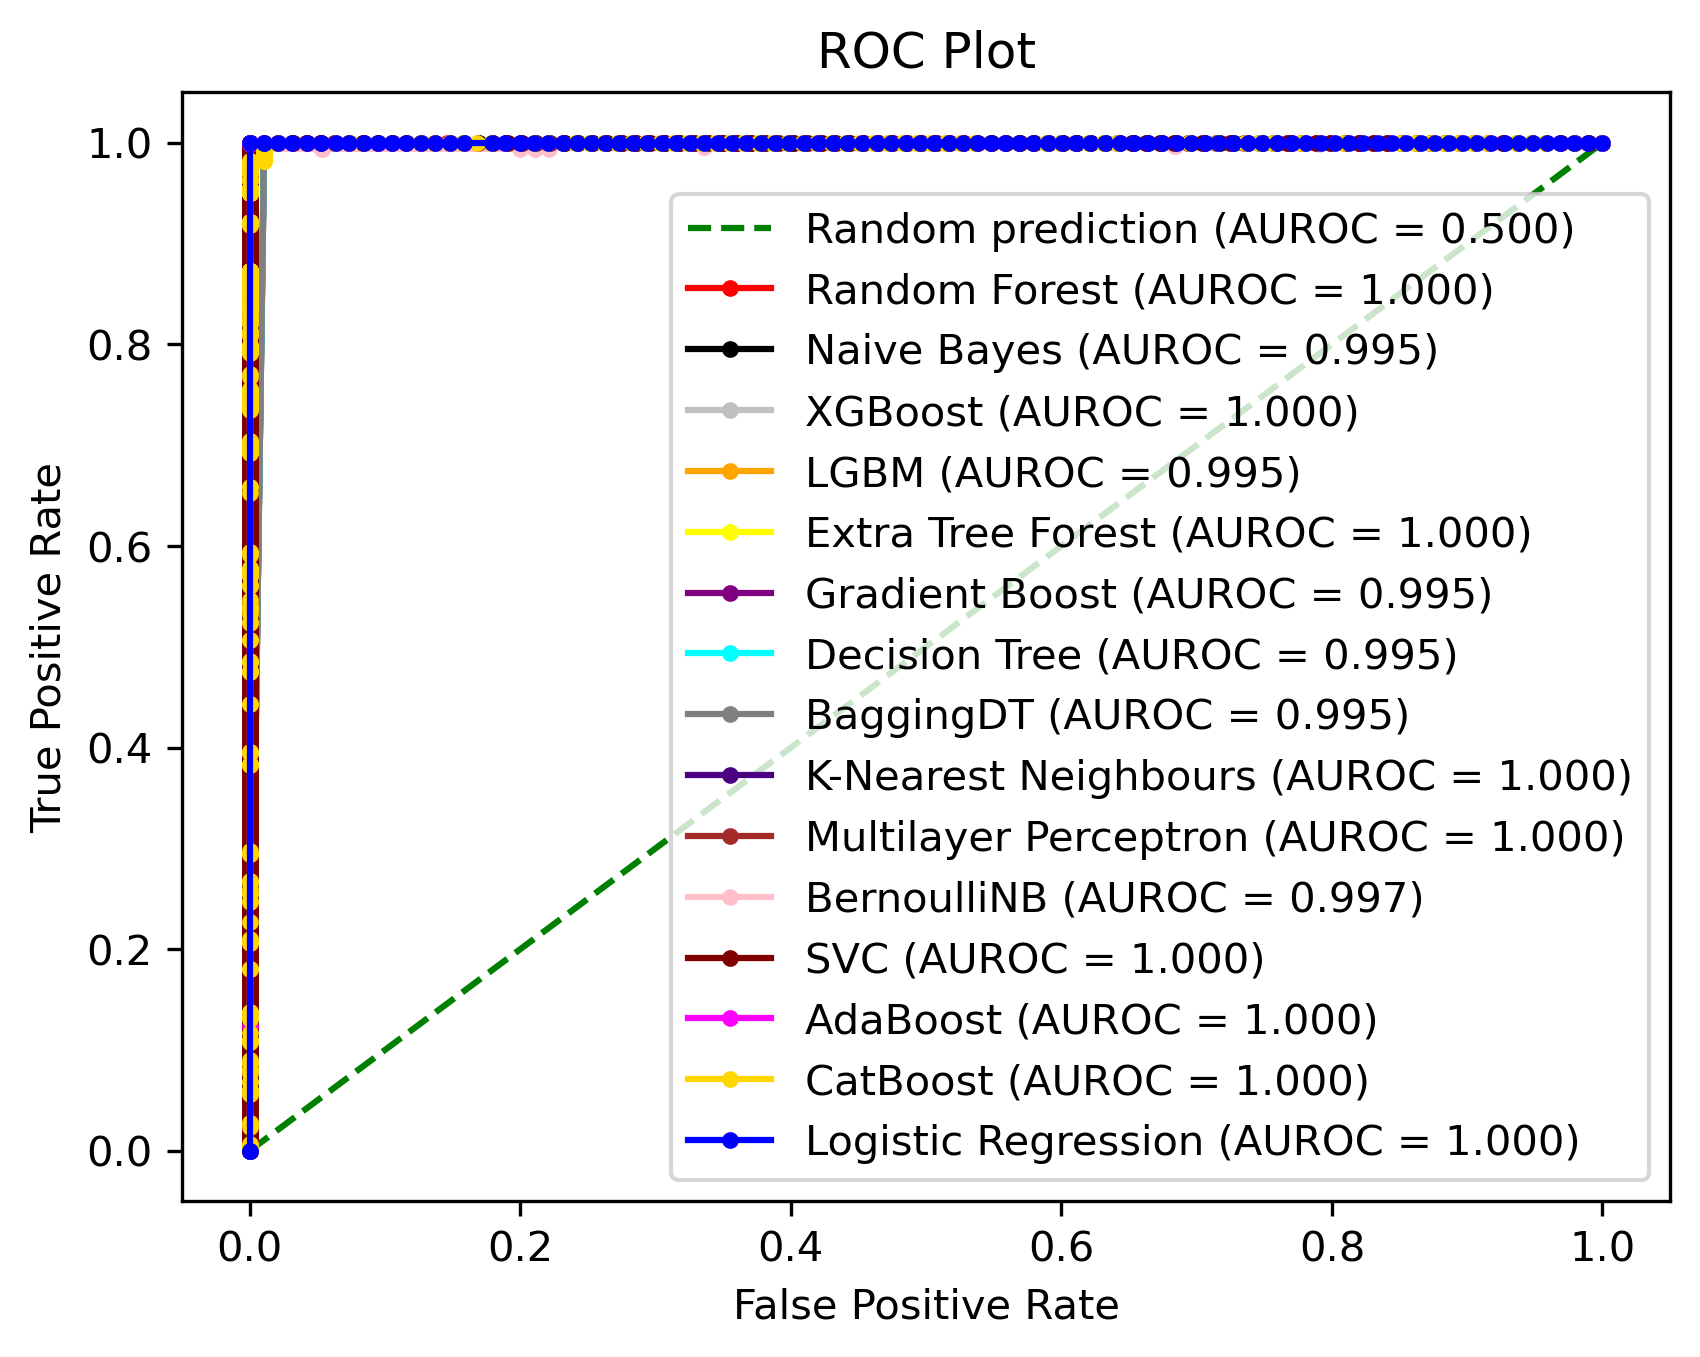

In [92]:
## Plot the ROC curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc, color='g')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rfc_auc, color='red')
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % gnb_auc, color='black')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost (AUROC = %0.3f)' % xgb_auc, color='silver')
plt.plot(lgb_fpr, lgb_tpr, marker='.', label='LGBM (AUROC = %0.3f)' % lgb_auc, color='orange')
plt.plot(xtf_fpr, xtf_tpr, marker='.', label='Extra Tree Forest (AUROC = %0.3f)' % xtf_auc, color='yellow')
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boost (AUROC = %0.3f)' % gb_auc, color='purple')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc, color='cyan')
plt.plot(bag_fpr, bag_tpr, marker='.', label='BaggingDT (AUROC = %0.3f)' % bag_auc, color='gray')
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbours (AUROC = %0.3f)' % knn_auc, color='indigo')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Multilayer Perceptron (AUROC = %0.3f)' % mlp_auc, color='brown')
#plt.plot(pac_fpr, pac_tpr, marker='.', label='Passive Agressive (AUROC = %0.3f)' % pac_auc, color='black')
plt.plot(bnb_fpr, bnb_tpr, marker='.', label='BernoulliNB (AUROC = %0.3f)' % bnb_auc, color='pink')
plt.plot(svc_fpr, svc_tpr, marker='.', label='SVC (AUROC = %0.3f)' % svc_auc, color='maroon')
plt.plot(ada_fpr, ada_tpr, marker='.', label='AdaBoost (AUROC = %0.3f)' % ada_auc, color='magenta')
plt.plot(cb_fpr, cb_tpr, marker='.', label='CatBoost (AUROC = %0.3f)' % cb_auc, color='gold')
#plt.plot(sgd_fpr, sgd_tpr, marker='.', label='SGD (AUROC = %0.3f)' % sgd_auc, color='black')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc, color='blue')

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [94]:
r2_probs = [0 for _ in range(len(y_test))]
ablr_probs = ablr.predict_proba(X_test)
abrf_probs = abrf.predict_proba(X_test)
abdt_probs = abdt.predict_proba(X_test)
abcat_probs = abcat.predict_proba(X_test)
bag_knn_probs = bag_knn.predict_proba(X_test)

ablr_probs = ablr_probs[:, 1]
abrf_probs = abrf_probs[:, 1]
abdt_probs = abdt_probs[:, 1]
abcat_probs = abcat_probs[:, 1]
bag_knn_probs = bag_knn_probs[:, 1]

C:\Users\M.P Khumalo\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


In [95]:
from sklearn.metrics import roc_curve, roc_auc_score
r2_auc = roc_auc_score(y_test, r2_probs)
ablr_auc = roc_auc_score(y_test, ablr_probs)
abrf_auc = roc_auc_score(y_test, abrf_probs)
abdt_auc = roc_auc_score(y_test, abdt_probs)
abcat_auc = roc_auc_score(y_test, abcat_probs)
bag_knn_auc = roc_auc_score(y_test, bag_knn_probs)

In [96]:
print('Random (chance) Prediction: AUROC = %.3f' % (r2_auc))
print('AdaBoostLR: AUROC = %.3f' % (ablr_auc))
print('AdaBoostRF: AUROC = %.3f' % (abrf_auc))
print('AdaBoostDT: AUROC = %.3f' % (abdt_auc))
print('AdaBoostCat: AUROC = %.3f' % (abcat_auc))
print('BaggingKNN: AUROC = %.3f' % (bag_knn_auc))

Random (chance) Prediction: AUROC = 0.500
AdaBoostLR: AUROC = 1.000
AdaBoostRF: AUROC = 1.000
AdaBoostDT: AUROC = 0.995
AdaBoostCat: AUROC = 1.000
BaggingKNN: AUROC = 1.000


In [101]:
r2_fpr, r2_tpr, _ = roc_curve(y_test, r2_probs)
ablr_fpr, ablr_tpr, _ = roc_curve(y_test, ablr_probs)
abrf_fpr, abrf_tpr, _ = roc_curve(y_test, abrf_probs)
abdt_fpr, abdt_tpr, _ = roc_curve(y_test, abdt_probs)
abcat_fpr, abcat_tpr, _ = roc_curve(y_test, abcat_probs)
bag_knn_fpr, bag_knn_tpr, _ = roc_curve(y_test, bag_knn_probs)

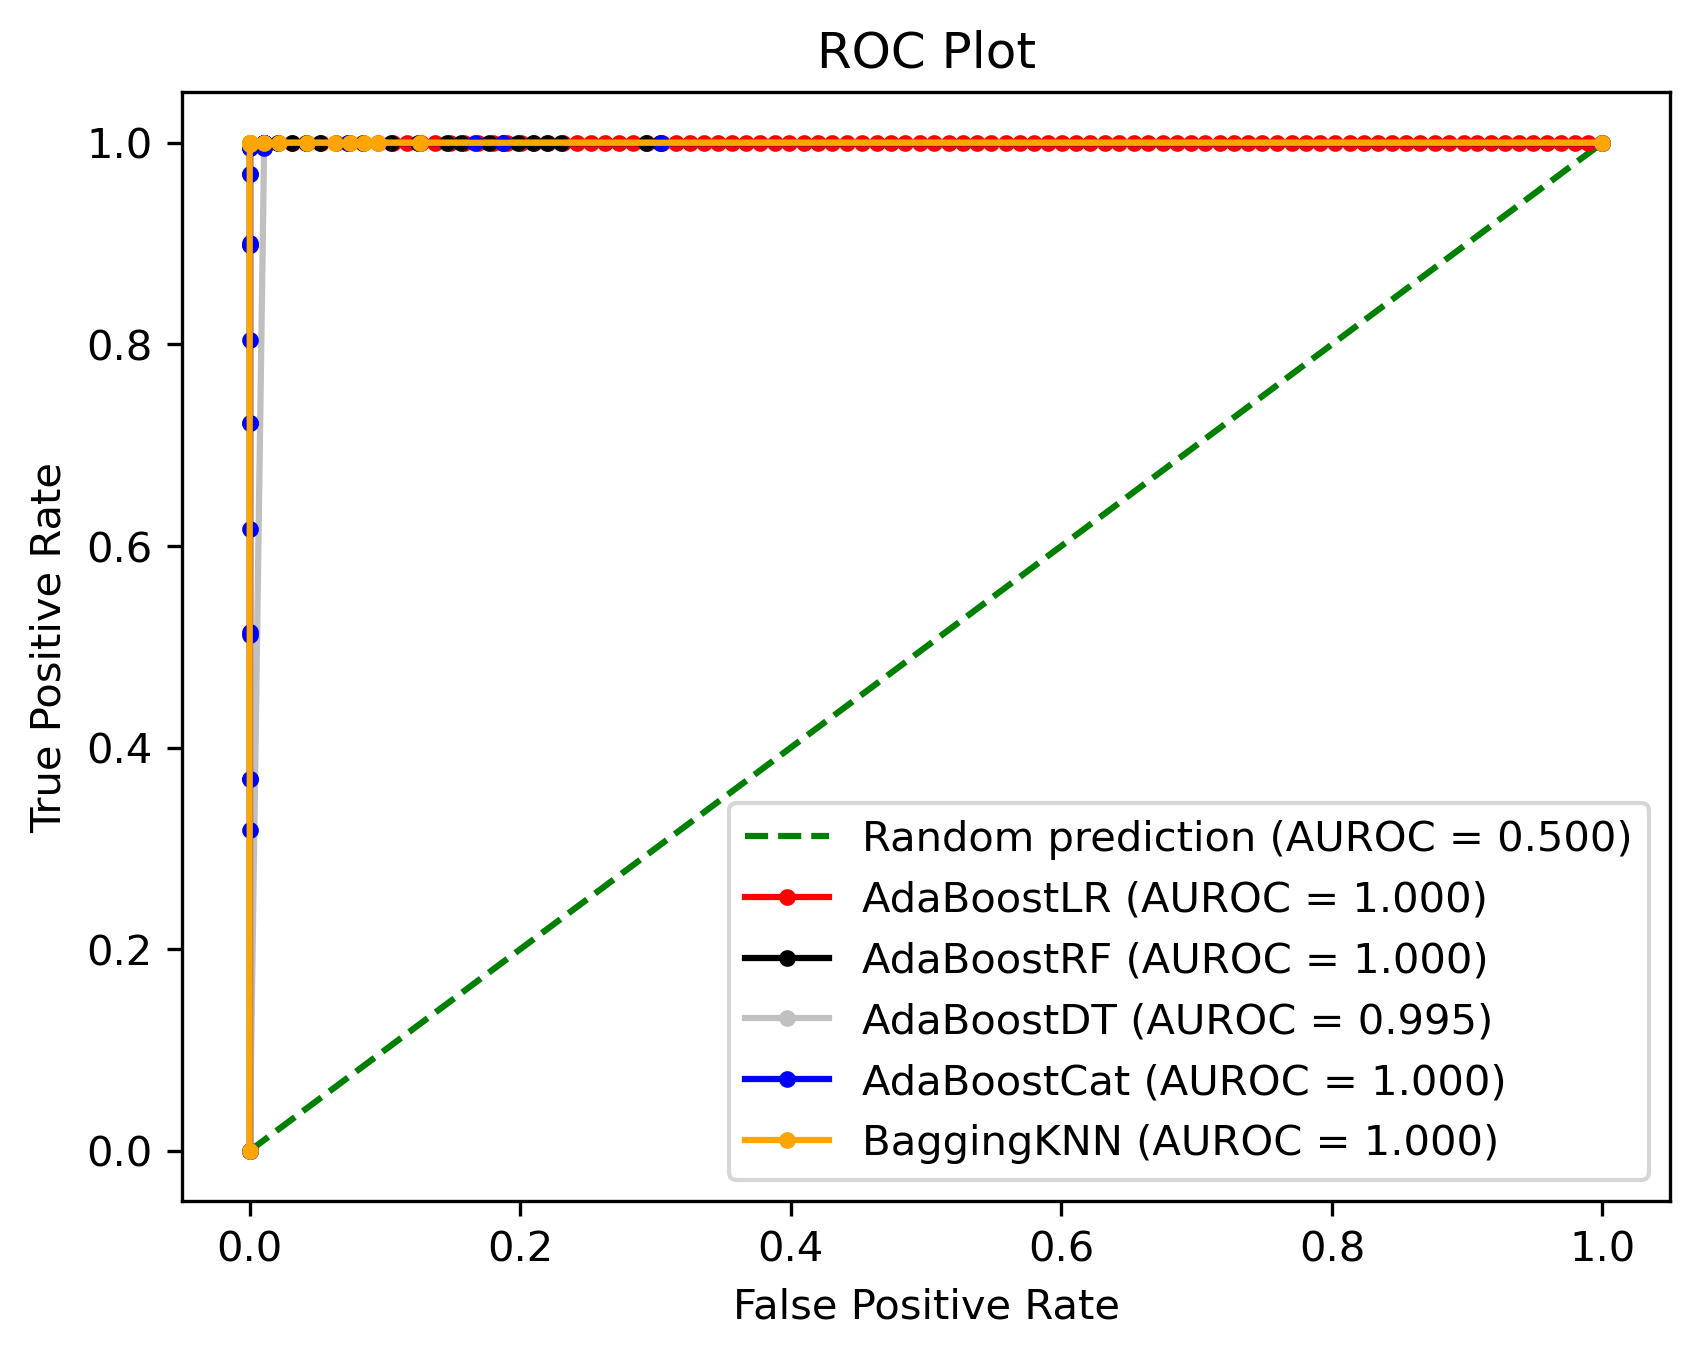

In [110]:
plt.plot(r2_fpr, r2_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r2_auc, color='g')
plt.plot(ablr_fpr, ablr_tpr, marker='.', label='AdaBoostLR (AUROC = %0.3f)' % ablr_auc, color='red')
plt.plot(abrf_fpr, abrf_tpr, marker='.', label='AdaBoostRF (AUROC = %0.3f)' % abrf_auc, color='black')
plt.plot(abdt_fpr, abdt_tpr, marker='.', label='AdaBoostDT (AUROC = %0.3f)' % abdt_auc, color='silver')
plt.plot(abcat_fpr, abcat_tpr, marker='.', label='AdaBoostCat (AUROC = %0.3f)' % abcat_auc, color='blue')
plt.plot(bag_knn_fpr, bag_knn_tpr, marker='.', label='BaggingKNN (AUROC = %0.3f)' % bag_knn_auc, color='orange')

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Voting Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier

classifiers = [['Multilayer Perceptron :', MLPClassifier(max_iter = 50)],
               ['LogisticRegression :', LogisticRegression()],
               ['ExtraTreesClassifier :', ExtraTreesClassifier()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['AdaBoostClassifier :', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB :', XGBClassifier()],
               ['CatBoost :', CatBoostClassifier(logging_level='Silent')],
               ['LightGBM :', LGBMClassifier()],
               ['SGD :', SGDClassifier()],
               ['PAClassifier :', PassiveAggressiveClassifier()],
               ['BernoulliNB :', BernoulliNB()],
               ['BaggingDT :', BaggingClassifier()],
               ['AdaBoostDT :', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=1000)],
               ['AdaBoostRF :', AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,random_state=10),n_estimators=1000)],
               ['AdaBoostLR :', AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000,solver = 'lbfgs'),n_estimators=1000)],
               ['AdaBoostCat :',AdaBoostClassifier(base_estimator=CatBoostClassifier(),n_estimators=1000)],
               ['BaggingKNN :', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

Multilayer Perceptron : 1.0
LogisticRegression : 0.9999865294466297
ExtraTreesClassifier : 0.9943794116062288
DecisionTree : 0.9943794116062288
RandomForest : 0.9943794116062288
Naive Bayes : 0.9939550891750634
KNeighbours : 1.0
SVM : 1.0
AdaBoostClassifier : 1.0
GradientBoostingClassifier:  0.9943794116062288
XGB : 0.9943794116062288
CatBoost : 0.9943760439678861
LightGBM : 0.9943794116062288
SGD : 0.9999562207015464
PAClassifier : 0.9943794116062288
BernoulliNB : 0.9680478474055714
BaggingDT : 0.9943794116062288
AdaBoostDT : 0.9943794116062288
AdaBoostRF : 0.9943794116062288
AdaBoostLR : 0.9998888679346948
Learning rate set to 0.21176
0:	learn: 0.0996069	total: 168ms	remaining: 2m 47s
1:	learn: 0.0147761	total: 314ms	remaining: 2m 36s
2:	learn: 0.0035112	total: 457ms	remaining: 2m 31s
3:	learn: 0.0009820	total: 597ms	remaining: 2m 28s
4:	learn: 0.0003845	total: 729ms	remaining: 2m 25s
5:	learn: 0.0001867	total: 856ms	remaining: 2m 21s
6:	learn: 0.0001033	total: 995ms	remaining: 2m 21

146:	learn: 0.0000327	total: 16.9s	remaining: 1m 38s
147:	learn: 0.0000327	total: 17s	remaining: 1m 38s
148:	learn: 0.0000327	total: 17.2s	remaining: 1m 37s
149:	learn: 0.0000327	total: 17.3s	remaining: 1m 37s
150:	learn: 0.0000327	total: 17.4s	remaining: 1m 37s
151:	learn: 0.0000327	total: 17.5s	remaining: 1m 37s
152:	learn: 0.0000327	total: 17.6s	remaining: 1m 37s
153:	learn: 0.0000327	total: 17.7s	remaining: 1m 37s
154:	learn: 0.0000327	total: 17.8s	remaining: 1m 37s
155:	learn: 0.0000327	total: 17.9s	remaining: 1m 36s
156:	learn: 0.0000327	total: 18s	remaining: 1m 36s
157:	learn: 0.0000327	total: 18.1s	remaining: 1m 36s
158:	learn: 0.0000327	total: 18.3s	remaining: 1m 36s
159:	learn: 0.0000327	total: 18.4s	remaining: 1m 36s
160:	learn: 0.0000327	total: 18.5s	remaining: 1m 36s
161:	learn: 0.0000327	total: 18.6s	remaining: 1m 36s
162:	learn: 0.0000327	total: 18.7s	remaining: 1m 36s
163:	learn: 0.0000327	total: 18.8s	remaining: 1m 36s
164:	learn: 0.0000327	total: 19s	remaining: 1m 35s

302:	learn: 0.0000327	total: 34.6s	remaining: 1m 19s
303:	learn: 0.0000327	total: 34.7s	remaining: 1m 19s
304:	learn: 0.0000327	total: 34.8s	remaining: 1m 19s
305:	learn: 0.0000327	total: 34.9s	remaining: 1m 19s
306:	learn: 0.0000327	total: 35s	remaining: 1m 19s
307:	learn: 0.0000327	total: 35.2s	remaining: 1m 18s
308:	learn: 0.0000327	total: 35.3s	remaining: 1m 18s
309:	learn: 0.0000327	total: 35.4s	remaining: 1m 18s
310:	learn: 0.0000327	total: 35.5s	remaining: 1m 18s
311:	learn: 0.0000327	total: 35.6s	remaining: 1m 18s
312:	learn: 0.0000327	total: 35.7s	remaining: 1m 18s
313:	learn: 0.0000327	total: 35.8s	remaining: 1m 18s
314:	learn: 0.0000327	total: 35.9s	remaining: 1m 18s
315:	learn: 0.0000327	total: 36.1s	remaining: 1m 18s
316:	learn: 0.0000327	total: 36.2s	remaining: 1m 17s
317:	learn: 0.0000327	total: 36.3s	remaining: 1m 17s
318:	learn: 0.0000327	total: 36.4s	remaining: 1m 17s
319:	learn: 0.0000327	total: 36.5s	remaining: 1m 17s
320:	learn: 0.0000327	total: 36.7s	remaining: 1m

460:	learn: 0.0000327	total: 52.5s	remaining: 1m 1s
461:	learn: 0.0000327	total: 52.6s	remaining: 1m 1s
462:	learn: 0.0000327	total: 52.7s	remaining: 1m 1s
463:	learn: 0.0000327	total: 52.8s	remaining: 1m
464:	learn: 0.0000327	total: 52.9s	remaining: 1m
465:	learn: 0.0000327	total: 53s	remaining: 1m
466:	learn: 0.0000327	total: 53.1s	remaining: 1m
467:	learn: 0.0000327	total: 53.2s	remaining: 1m
468:	learn: 0.0000327	total: 53.3s	remaining: 1m
469:	learn: 0.0000327	total: 53.4s	remaining: 1m
470:	learn: 0.0000327	total: 53.6s	remaining: 1m
471:	learn: 0.0000327	total: 53.7s	remaining: 1m
472:	learn: 0.0000327	total: 53.8s	remaining: 59.9s
473:	learn: 0.0000327	total: 53.9s	remaining: 59.8s
474:	learn: 0.0000327	total: 54s	remaining: 59.7s
475:	learn: 0.0000327	total: 54.1s	remaining: 59.6s
476:	learn: 0.0000327	total: 54.2s	remaining: 59.5s
477:	learn: 0.0000327	total: 54.3s	remaining: 59.3s
478:	learn: 0.0000327	total: 54.5s	remaining: 59.2s
479:	learn: 0.0000327	total: 54.6s	remainin

620:	learn: 0.0000327	total: 1m 11s	remaining: 43.6s
621:	learn: 0.0000327	total: 1m 11s	remaining: 43.5s
622:	learn: 0.0000327	total: 1m 11s	remaining: 43.4s
623:	learn: 0.0000327	total: 1m 11s	remaining: 43.3s
624:	learn: 0.0000327	total: 1m 11s	remaining: 43.2s
625:	learn: 0.0000327	total: 1m 12s	remaining: 43s
626:	learn: 0.0000327	total: 1m 12s	remaining: 42.9s
627:	learn: 0.0000327	total: 1m 12s	remaining: 42.8s
628:	learn: 0.0000327	total: 1m 12s	remaining: 42.7s
629:	learn: 0.0000327	total: 1m 12s	remaining: 42.6s
630:	learn: 0.0000327	total: 1m 12s	remaining: 42.5s
631:	learn: 0.0000327	total: 1m 12s	remaining: 42.4s
632:	learn: 0.0000327	total: 1m 12s	remaining: 42.3s
633:	learn: 0.0000327	total: 1m 13s	remaining: 42.2s
634:	learn: 0.0000327	total: 1m 13s	remaining: 42.1s
635:	learn: 0.0000327	total: 1m 13s	remaining: 42s
636:	learn: 0.0000327	total: 1m 13s	remaining: 41.9s
637:	learn: 0.0000327	total: 1m 13s	remaining: 41.7s
638:	learn: 0.0000327	total: 1m 13s	remaining: 41.

776:	learn: 0.0000327	total: 1m 32s	remaining: 26.4s
777:	learn: 0.0000327	total: 1m 32s	remaining: 26.3s
778:	learn: 0.0000327	total: 1m 32s	remaining: 26.2s
779:	learn: 0.0000327	total: 1m 32s	remaining: 26.1s
780:	learn: 0.0000327	total: 1m 32s	remaining: 26s
781:	learn: 0.0000327	total: 1m 32s	remaining: 25.9s
782:	learn: 0.0000327	total: 1m 32s	remaining: 25.7s
783:	learn: 0.0000327	total: 1m 33s	remaining: 25.6s
784:	learn: 0.0000327	total: 1m 33s	remaining: 25.5s
785:	learn: 0.0000327	total: 1m 33s	remaining: 25.4s
786:	learn: 0.0000327	total: 1m 33s	remaining: 25.3s
787:	learn: 0.0000327	total: 1m 33s	remaining: 25.2s
788:	learn: 0.0000327	total: 1m 33s	remaining: 25s
789:	learn: 0.0000327	total: 1m 33s	remaining: 24.9s
790:	learn: 0.0000327	total: 1m 33s	remaining: 24.8s
791:	learn: 0.0000327	total: 1m 34s	remaining: 24.7s
792:	learn: 0.0000327	total: 1m 34s	remaining: 24.6s
793:	learn: 0.0000327	total: 1m 34s	remaining: 24.5s
794:	learn: 0.0000327	total: 1m 34s	remaining: 24.

932:	learn: 0.0000327	total: 1m 52s	remaining: 8.1s
933:	learn: 0.0000327	total: 1m 52s	remaining: 7.98s
934:	learn: 0.0000327	total: 1m 53s	remaining: 7.86s
935:	learn: 0.0000327	total: 1m 53s	remaining: 7.74s
936:	learn: 0.0000327	total: 1m 53s	remaining: 7.62s
937:	learn: 0.0000327	total: 1m 53s	remaining: 7.5s
938:	learn: 0.0000327	total: 1m 53s	remaining: 7.38s
939:	learn: 0.0000327	total: 1m 53s	remaining: 7.25s
940:	learn: 0.0000327	total: 1m 53s	remaining: 7.13s
941:	learn: 0.0000327	total: 1m 53s	remaining: 7.01s
942:	learn: 0.0000327	total: 1m 53s	remaining: 6.89s
943:	learn: 0.0000327	total: 1m 54s	remaining: 6.77s
944:	learn: 0.0000327	total: 1m 54s	remaining: 6.65s
945:	learn: 0.0000327	total: 1m 54s	remaining: 6.53s
946:	learn: 0.0000327	total: 1m 54s	remaining: 6.41s
947:	learn: 0.0000327	total: 1m 54s	remaining: 6.29s
948:	learn: 0.0000327	total: 1m 54s	remaining: 6.17s
949:	learn: 0.0000327	total: 1m 54s	remaining: 6.05s
950:	learn: 0.0000327	total: 1m 55s	remaining: 5

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    165140
         1.0       1.00      1.00      1.00    131804

    accuracy                           1.00    296944
   macro avg       1.00      1.00      1.00    296944
weighted avg       1.00      1.00      1.00    296944

AdaBoost's prediction accuracy is:  100.0
Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
LOGLOSS Value is 9.99200722162641e-16
AUC-ROC: 1.0
Soft Voting's prediction accuracy is:  100.0


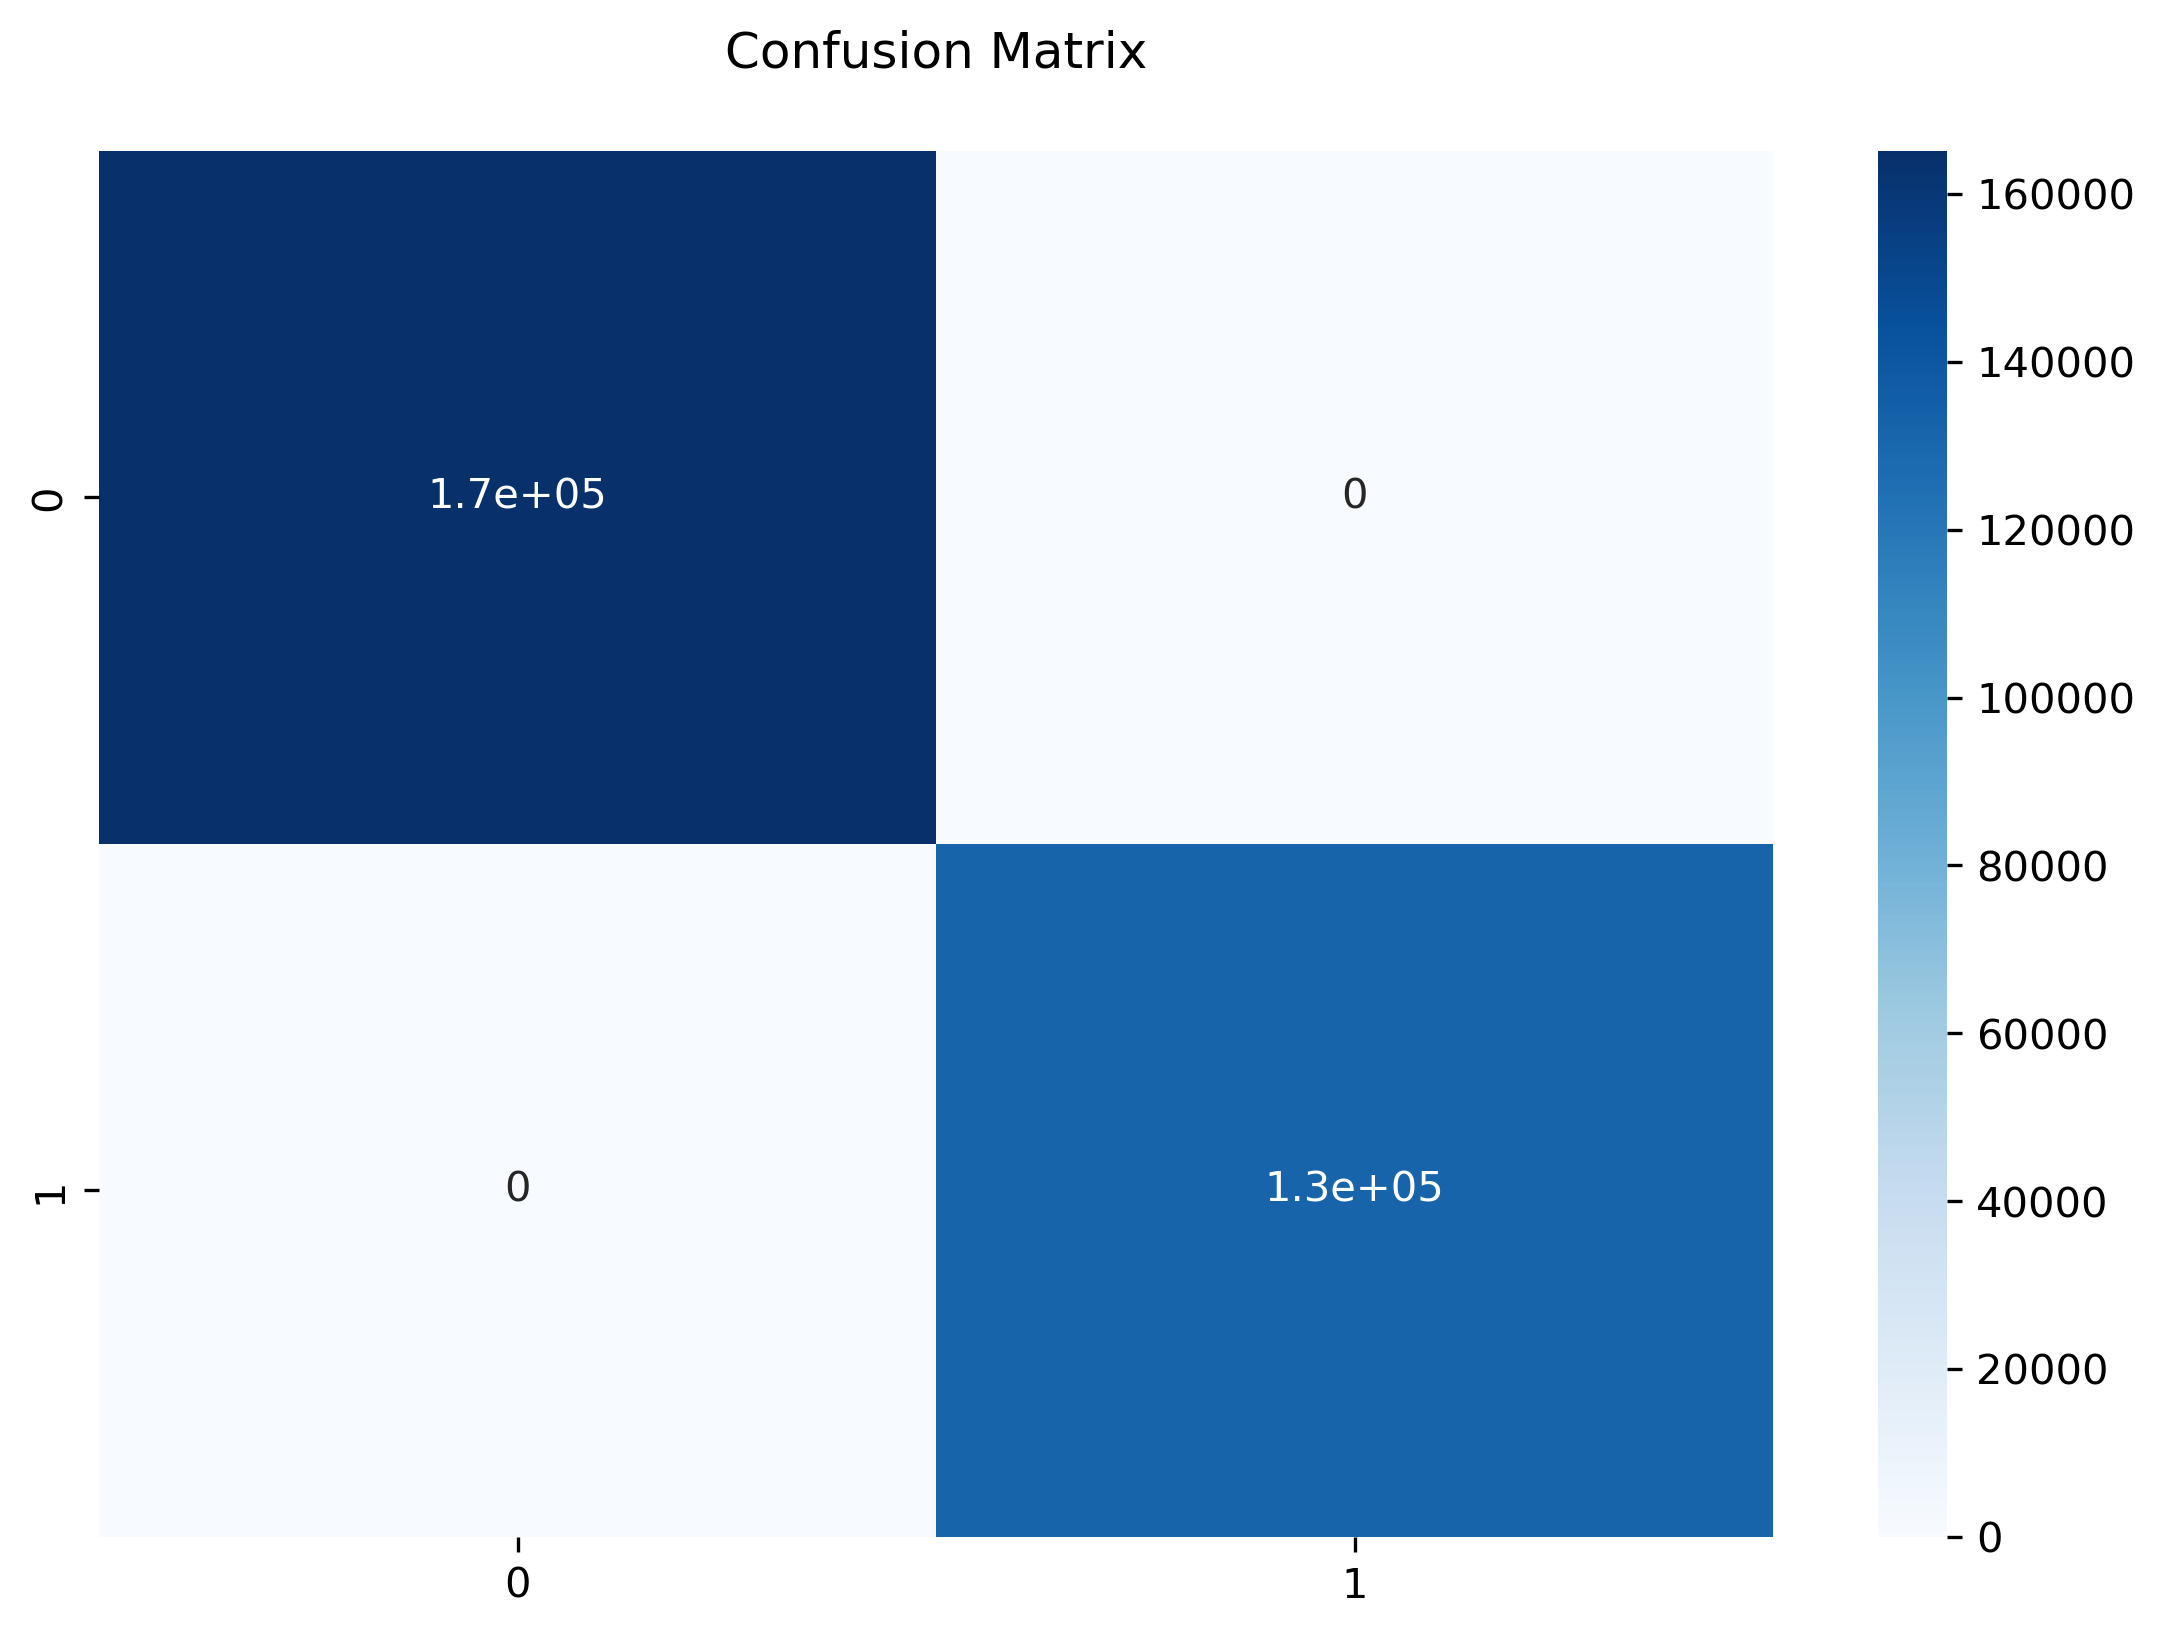

In [75]:
from sklearn.ensemble import VotingClassifier
#clf1 = ExtraTreesClassifier()
#clf2 = LGBMClassifier()
#clf3 = RandomForestClassifier()
clf4 = AdaBoostClassifier()
clf5 = LogisticRegression()
#clf6 = DecisionTreeClassifier()
#clf7 = GaussianNB()
clf8 = KNeighborsClassifier()
#clf9 = SVC()
clf10 = MLPClassifier(max_iter = 50)
#clf11 = GradientBoostingClassifier()
#clf12 = XGBClassifier()
#clf13 = CatBoostClassifier(logging_level='Silent')
#clf14 = SGDClassifier()
#clf15 = PassiveAggressiveClassifier()
#clf16 = BernoulliNB()
#clf17 = BaggingClassifier()
#clf18 = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000,solver = 'lbfgs'),n_estimators=1000)
#clf19 = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,random_state=10),n_estimators=1000)
#clf20 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=1000)
#clf20 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=1000)
#clf22 = AdaBoostClassifier(base_estimator=CatBoostClassifier(),n_estimators=1000)
#clf23 = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
eclf1 = VotingClassifier(estimators=[('MLP', clf10), ('KNeighbours', clf8), ('AdaBoost', clf4), ('LR', clf5)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)
acc_abcat = eclf1.score(X_test,y_test)*100
acc_abcat
print(classification_report(y_test, y_pred))

print("AdaBoost's prediction accuracy is: ", accuracy_score(y_test.values, y_pred)*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('LOGLOSS Value is',log_loss(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))

print("Soft Voting's prediction accuracy is: ", accuracy_score(y_test.values, y_pred)*100)
conf_matrix(y_test,y_pred)

In [ ]:

eclf2 = VotingClassifier(estimators=[('MLP', clf10), ('KNeighbours', clf8), ('AdaBoost', clf4), ('LR', clf5)], voting='hard')
eclf2.fit(X_train, y_train)
y_pred = eclf2.predict(X_test)
acc_ab_vote = eclf2.score(X_test,y_test)*100
acc_ab_vote
print(classification_report(y_test, y_pred))

print("Voting's prediction accuracy is: ", accuracy_score(y_test.values, y_pred)*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))
print('LOGLOSS Value is',log_loss(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))

print("Hard Voting's prediction accuracy is: ", accuracy_score(y_test.values, y_pred)*100)

conf_matrix(y_test,y_pred)

In [109]:
from sklearn.model_selection import cross_val_score
c = []
c.append(cross_val_score(clf4,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf5,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf8,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf9,X_train,y_train,scoring='accuracy',cv=10).mean())
c.append(cross_val_score(clf10,X_train,y_train,scoring='accuracy',cv=10).mean())
print(c)

[0.9999991580861615, 0.9999949485098807, 1.0, 0.9999991580861615]


In [114]:
objects = ('CatBoost', 'AdaBoostCat', 'BaggingKNN', 'AdaBoostDT', 'AdaBoostLR', 'XGBoost', 'Lgbm', 'Extra-Tree', 'GT', 'BaggingDT', 'AdaBoost', 'RF', 'AdaBoostRF', 'VotingClassifier')
x_pos = np.arange(len(objects))
accuracies1 = [acc_cat, acc_abcat, acc_bagknn, acc_abdt, acc_ablr, acc_xgb, acc_lgb, acc_xt, acc_gb, acc_bagdt, acc_ad, acc_rfc, acc_abrf, acc_ab_vote]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='r')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Percentage %',labelpad=10)
plt.ylabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()

Machine Learning Model Pipeline

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier

model_pipeline = []
model_pipeline.append(LogisticRegression(solver = 'liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(AdaBoostClassifier())
model_pipeline.append(GradientBoostingClassifier())
model_pipeline.append(SGDClassifier())
model_pipeline.append(MLPClassifier())
model_pipeline.append(XGBClassifier())
model_pipeline.append(LGBMClassifier())
model_pipeline.append(ExtraTreesClassifier())
model_pipeline.append(CatBoostClassifier())
#model_pipeline.append(VotingClassifier())
model_pipeline.append(PassiveAggressiveClassifier())
model_pipeline.append(BernoulliNB())
model_pipeline.append(AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=1000,solver = 'lbfgs'),n_estimators=1000))
model_pipeline.append(AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,random_state=10),n_estimators=1000))
model_pipeline.append(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=1000))

Model Evaluation

In [142]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model_list = ['LogisticRegression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'AdaBoost',
              'GradientBoosting', 'SGD', 'MLP', 'XGB', 'LGBM', 'ExtraTree Classifier', 'CatBoost Classifier',
              'Passive Agressive','Voting Classifier', 'BernoulliNB', 'BaggingDT','AdaBoostDT', 'AdaBoostLR', 'AdaBoostRF']
acc_list = []
auc_list = []
pr_list = []
recall_list = []
f1score_list = []
cm_list = []

for model in model_pipeline:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    pr_list.append(metrics.precision_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    recall_list.append(metrics.recall_score(y_test, y_pred))
    f1score_list.append(metrics.recall_score(y_test, y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
    cm_list.append(confusion_matrix(y_test, y_pred))

Learning rate set to 0.21176
0:	learn: 0.1365614	total: 249ms	remaining: 4m 9s
1:	learn: 0.0270540	total: 447ms	remaining: 3m 43s
2:	learn: 0.0059392	total: 631ms	remaining: 3m 29s
3:	learn: 0.0015647	total: 812ms	remaining: 3m 22s
4:	learn: 0.0005136	total: 973ms	remaining: 3m 13s
5:	learn: 0.0002405	total: 1.14s	remaining: 3m 8s
6:	learn: 0.0001230	total: 1.29s	remaining: 3m 3s
7:	learn: 0.0000779	total: 1.46s	remaining: 3m
8:	learn: 0.0000530	total: 1.6s	remaining: 2m 56s
9:	learn: 0.0000505	total: 1.75s	remaining: 2m 53s
10:	learn: 0.0000462	total: 1.91s	remaining: 2m 51s
11:	learn: 0.0000440	total: 2.05s	remaining: 2m 48s
12:	learn: 0.0000340	total: 2.2s	remaining: 2m 47s
13:	learn: 0.0000340	total: 2.34s	remaining: 2m 44s
14:	learn: 0.0000340	total: 2.5s	remaining: 2m 44s
15:	learn: 0.0000340	total: 2.72s	remaining: 2m 47s
16:	learn: 0.0000340	total: 2.88s	remaining: 2m 46s
17:	learn: 0.0000340	total: 3.03s	remaining: 2m 45s
18:	learn: 0.0000303	total: 3.2s	remaining: 2m 45s
19:	

159:	learn: 0.0000202	total: 23.5s	remaining: 2m 3s
160:	learn: 0.0000202	total: 23.6s	remaining: 2m 3s
161:	learn: 0.0000202	total: 23.7s	remaining: 2m 2s
162:	learn: 0.0000202	total: 23.9s	remaining: 2m 2s
163:	learn: 0.0000202	total: 24s	remaining: 2m 2s
164:	learn: 0.0000202	total: 24.1s	remaining: 2m 1s
165:	learn: 0.0000202	total: 24.2s	remaining: 2m 1s
166:	learn: 0.0000202	total: 24.4s	remaining: 2m 1s
167:	learn: 0.0000202	total: 24.5s	remaining: 2m 1s
168:	learn: 0.0000202	total: 24.6s	remaining: 2m 1s
169:	learn: 0.0000202	total: 24.8s	remaining: 2m
170:	learn: 0.0000202	total: 24.9s	remaining: 2m
171:	learn: 0.0000202	total: 25s	remaining: 2m
172:	learn: 0.0000202	total: 25.1s	remaining: 2m
173:	learn: 0.0000202	total: 25.3s	remaining: 1m 59s
174:	learn: 0.0000202	total: 25.4s	remaining: 1m 59s
175:	learn: 0.0000202	total: 25.5s	remaining: 1m 59s
176:	learn: 0.0000202	total: 25.6s	remaining: 1m 59s
177:	learn: 0.0000202	total: 25.7s	remaining: 1m 58s
178:	learn: 0.0000202	t

315:	learn: 0.0000202	total: 44.6s	remaining: 1m 36s
316:	learn: 0.0000202	total: 44.8s	remaining: 1m 36s
317:	learn: 0.0000202	total: 44.9s	remaining: 1m 36s
318:	learn: 0.0000202	total: 45s	remaining: 1m 36s
319:	learn: 0.0000202	total: 45.1s	remaining: 1m 35s
320:	learn: 0.0000202	total: 45.3s	remaining: 1m 35s
321:	learn: 0.0000202	total: 45.4s	remaining: 1m 35s
322:	learn: 0.0000202	total: 45.6s	remaining: 1m 35s
323:	learn: 0.0000202	total: 45.8s	remaining: 1m 35s
324:	learn: 0.0000202	total: 45.9s	remaining: 1m 35s
325:	learn: 0.0000202	total: 46.1s	remaining: 1m 35s
326:	learn: 0.0000202	total: 46.2s	remaining: 1m 35s
327:	learn: 0.0000202	total: 46.4s	remaining: 1m 35s
328:	learn: 0.0000202	total: 46.6s	remaining: 1m 34s
329:	learn: 0.0000202	total: 46.7s	remaining: 1m 34s
330:	learn: 0.0000202	total: 46.9s	remaining: 1m 34s
331:	learn: 0.0000202	total: 47s	remaining: 1m 34s
332:	learn: 0.0000202	total: 47.2s	remaining: 1m 34s
333:	learn: 0.0000202	total: 47.3s	remaining: 1m 3

471:	learn: 0.0000202	total: 1m 8s	remaining: 1m 16s
472:	learn: 0.0000202	total: 1m 8s	remaining: 1m 16s
473:	learn: 0.0000202	total: 1m 8s	remaining: 1m 16s
474:	learn: 0.0000202	total: 1m 8s	remaining: 1m 15s
475:	learn: 0.0000202	total: 1m 8s	remaining: 1m 15s
476:	learn: 0.0000202	total: 1m 8s	remaining: 1m 15s
477:	learn: 0.0000202	total: 1m 8s	remaining: 1m 15s
478:	learn: 0.0000202	total: 1m 9s	remaining: 1m 15s
479:	learn: 0.0000202	total: 1m 9s	remaining: 1m 15s
480:	learn: 0.0000202	total: 1m 9s	remaining: 1m 14s
481:	learn: 0.0000202	total: 1m 9s	remaining: 1m 14s
482:	learn: 0.0000202	total: 1m 9s	remaining: 1m 14s
483:	learn: 0.0000202	total: 1m 9s	remaining: 1m 14s
484:	learn: 0.0000202	total: 1m 9s	remaining: 1m 14s
485:	learn: 0.0000202	total: 1m 9s	remaining: 1m 14s
486:	learn: 0.0000202	total: 1m 10s	remaining: 1m 13s
487:	learn: 0.0000202	total: 1m 10s	remaining: 1m 13s
488:	learn: 0.0000202	total: 1m 10s	remaining: 1m 13s
489:	learn: 0.0000202	total: 1m 10s	remaini

626:	learn: 0.0000202	total: 1m 30s	remaining: 53.7s
627:	learn: 0.0000202	total: 1m 30s	remaining: 53.6s
628:	learn: 0.0000202	total: 1m 30s	remaining: 53.4s
629:	learn: 0.0000202	total: 1m 30s	remaining: 53.3s
630:	learn: 0.0000202	total: 1m 30s	remaining: 53.1s
631:	learn: 0.0000202	total: 1m 30s	remaining: 53s
632:	learn: 0.0000202	total: 1m 31s	remaining: 52.8s
633:	learn: 0.0000202	total: 1m 31s	remaining: 52.7s
634:	learn: 0.0000202	total: 1m 31s	remaining: 52.5s
635:	learn: 0.0000202	total: 1m 31s	remaining: 52.4s
636:	learn: 0.0000202	total: 1m 31s	remaining: 52.2s
637:	learn: 0.0000202	total: 1m 31s	remaining: 52.1s
638:	learn: 0.0000202	total: 1m 31s	remaining: 51.9s
639:	learn: 0.0000202	total: 1m 31s	remaining: 51.7s
640:	learn: 0.0000202	total: 1m 32s	remaining: 51.6s
641:	learn: 0.0000202	total: 1m 32s	remaining: 51.4s
642:	learn: 0.0000202	total: 1m 32s	remaining: 51.3s
643:	learn: 0.0000202	total: 1m 32s	remaining: 51.1s
644:	learn: 0.0000202	total: 1m 32s	remaining: 5

782:	learn: 0.0000202	total: 1m 53s	remaining: 31.4s
783:	learn: 0.0000202	total: 1m 53s	remaining: 31.3s
784:	learn: 0.0000202	total: 1m 53s	remaining: 31.1s
785:	learn: 0.0000202	total: 1m 53s	remaining: 31s
786:	learn: 0.0000202	total: 1m 54s	remaining: 30.9s
787:	learn: 0.0000202	total: 1m 54s	remaining: 30.7s
788:	learn: 0.0000202	total: 1m 54s	remaining: 30.6s
789:	learn: 0.0000202	total: 1m 54s	remaining: 30.5s
790:	learn: 0.0000202	total: 1m 54s	remaining: 30.3s
791:	learn: 0.0000202	total: 1m 54s	remaining: 30.2s
792:	learn: 0.0000202	total: 1m 55s	remaining: 30s
793:	learn: 0.0000202	total: 1m 55s	remaining: 29.9s
794:	learn: 0.0000202	total: 1m 55s	remaining: 29.7s
795:	learn: 0.0000202	total: 1m 55s	remaining: 29.6s
796:	learn: 0.0000202	total: 1m 55s	remaining: 29.4s
797:	learn: 0.0000202	total: 1m 55s	remaining: 29.3s
798:	learn: 0.0000202	total: 1m 55s	remaining: 29.2s
799:	learn: 0.0000202	total: 1m 56s	remaining: 29s
800:	learn: 0.0000202	total: 1m 56s	remaining: 28.9s

939:	learn: 0.0000202	total: 2m 16s	remaining: 8.74s
940:	learn: 0.0000202	total: 2m 16s	remaining: 8.59s
941:	learn: 0.0000202	total: 2m 17s	remaining: 8.44s
942:	learn: 0.0000202	total: 2m 17s	remaining: 8.29s
943:	learn: 0.0000202	total: 2m 17s	remaining: 8.15s
944:	learn: 0.0000202	total: 2m 17s	remaining: 8s
945:	learn: 0.0000202	total: 2m 17s	remaining: 7.85s
946:	learn: 0.0000202	total: 2m 17s	remaining: 7.71s
947:	learn: 0.0000202	total: 2m 17s	remaining: 7.56s
948:	learn: 0.0000202	total: 2m 18s	remaining: 7.42s
949:	learn: 0.0000202	total: 2m 18s	remaining: 7.27s
950:	learn: 0.0000202	total: 2m 18s	remaining: 7.13s
951:	learn: 0.0000202	total: 2m 18s	remaining: 6.98s
952:	learn: 0.0000202	total: 2m 18s	remaining: 6.84s
953:	learn: 0.0000202	total: 2m 18s	remaining: 6.69s
954:	learn: 0.0000202	total: 2m 18s	remaining: 6.55s
955:	learn: 0.0000202	total: 2m 19s	remaining: 6.4s
956:	learn: 0.0000202	total: 2m 19s	remaining: 6.26s
957:	learn: 0.0000202	total: 2m 19s	remaining: 6.1

In [144]:
##Accuracy and AUC
#result_df = pd.DataFrame({'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list, 'Precision': pr_list, 'Recall': recall_list })
#result_df
#import pandas as pd
result = {'Model':model_list, 'Accuracy': acc_list, 'AUC': auc_list, 'Precision': pr_list, 'Recall': recall_list, 'F1-Score': f1score_list}
result_df =  pd.DataFrame.from_dict(result, orient='index')
result_df.transpose()

Model  Accuracy   AUC Precision    Recall  F1-Score
0     LogisticRegression  0.999987   1.0       1.0   0.99997   0.99997
1                    SVC       1.0   1.0       1.0       1.0       1.0
2                    KNN       1.0   1.0       1.0       1.0       1.0
3          Decision Tree  0.994039  0.99  0.986749       1.0       1.0
4          Random Forest  0.994039  0.99  0.986749       1.0       1.0
5            Naive Bayes   0.99408  0.99  0.986838       1.0       1.0
6               AdaBoost       1.0   1.0       1.0       1.0       1.0
7       GradientBoosting  0.994039  0.99  0.986749       1.0       1.0
8                    SGD  0.999956   1.0       1.0  0.999901  0.999901
9                    MLP       1.0   1.0       1.0       1.0       1.0
10                   XGB  0.994039  0.99  0.986749       1.0       1.0
11                  LGBM  0.994039  0.99  0.986749       1.0       1.0
12  ExtraTree Classifier  0.994039  0.99  0.986749       1.0       1.0
13   CatBoost Classifier  0.994036  0.99  0.986749  0.999992  0.999992
14     Passive Agressive  0.994039  0.99  0.986749       1.0       1.0
15     Voting Classifier  0.968011  0.97  0.937619  0.994067  0.994067
16           BernoulliNB  0.999889   1.0       1.0   0.99975   0.99975
17             BaggingDT  0.994039  0.99  0.986749       1.0       1.0
18            AdaBoostDT  0.994039  0.99  0.986749       1.0       1.0
19            AdaBoostLR      None  None      None      None      None
20            AdaBoostRF      None  None      None      None      None